#**Lab 1 of CS 8321**
by Yifan Lu and Chenyu (Devon) Yang

###**Introduction**

We are using the Deepfake Detection Challenge (DFDC) data collected and published by Facebook in 2020. Facebook collected videos recording dozens of volunteers talking and acting from different perspectives. The video files are saved in MP4 format. Then part of the recorded videos is processed through the deepfake algorithm generating the so-called "fake" videos. The competition was established to spur researchers worldwide to build innovative new technologies that can help detect deepfakes and manipulated media. Deepfake technology has been an exciting and fantastic phenomenon since the thrive of the Internet and social media and brought to the public thanks to the popularity of high-performance personal hardware. However, due to the lack of regulation on deepfake technology, fake videos and audios are being utilized to commit crimes like fraud, blackmail, etc. Therefore, designing an efficient and precise deepfake identifying algorithm is quite urgent and will be helpful to the whole society.

The whole data set contains over 400GB mp4 files, which is high beyond our capability. Thus, a subset of 600 videos was selected, with 300 authentic videos and 300 fake videos. For a particular video, we aim to classify it as either authentic or fake by virtue of its features. Each video provids features than can be divided into two parts, video and audio, transferring this into a multi-modal task. To evaluate the performances of classification results, we adopt accuracy to quantify the proportions of correct classification. Since we are using a balanced data set and both authentic and fake classes are important, accuracy is a reasonable metric to be used here.

There is one task and two modalities in the dataset. We divided the dataset into three parts, training, validation, and testing, with proportion 0.8, 0.1, and 0.1. The videos are randomly sampled from the whole dataset. Since the labels are balanced and we got a sufficient number of sample size of 600 videos, we believe it is reasonable to split the dataset in this way. Then for each of the video and audio features, we developed a separate model. The best model is chosen based on the validation loss. After obtaining the target model according to the least validation loss, we apply the model to the test dataset to see how it generalize to unknown data. After comparing the model performance of the separate models, we combined the video and audio features to form a multi-modal model.




#Table of Contents <a name="TOC"></a>

1. [Sec 1: EDA](#eda)
2. [Sec 2: Image Branch](#VideoBranch)
3. [Sec 3: Audio Branch](#AudioBranch)
4. [Sec 4: Multi-Modal](#MultiModalv1)
5. [Sec 5: Multi-Modal_control](#MultiModalv2)
6. [Sec 6: Kaggle-style submission](#Kaggle)
7. [Sec 7: Summary](#Summary)
7. [Sec 8: Exceptional Work](#Exceptional)


## Exploratory Data Analysis <a name="EDA"></a>

In this section, we inspect a few of the visual aspects of the dataset.

The codes in the EDA section are provided by the Demo from the Kaggle challenge, we modified a little for our specific purpose. 

Since we noticed an inbalanced distribution of labels, we inserted 246 "REAL"-labeled videos. After the injection, we have 323 "FAKE" and 323 "REAL" mp4 files in the dataset.

[Back to TOC](#TOC)

In [112]:
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

In [113]:
pip install --upgrade --force-reinstall --no-deps kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=97ec8dc5bd2e25ec59931f7320dc17c79558a4078ceece2fcc98eeced2c011f2
  Stored in directory: c:\users\lu936\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from google.colab import drive
import zipfile
import numpy as np
# Colab library to upload files to notebook
from google.colab import files
# Upload kaggle API key file
#uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


A few of the cells used to download the dataset are commented out

In [ ]:
# #changing the working directory
# %cd /content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [ ]:
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"
# # /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
# #changing the working directory
# %mkdir '/content/tmp1'
# %cd /content/tmp1
# os.setwd(/content/tmp1)

/content/tmp1


In [ ]:
# https://www.kaggle.com/c/16880/datadownload/dfdc_train_part_00.zip

In [ ]:
# %time
# # Downlaod data for the nyc_taxi_trip_duration challenge
# !kaggle competitions download -c deepfake-detection-challenge

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs
100% 4.12G/4.13G [00:26<00:00, 190MB/s]
100% 4.13G/4.13G [00:26<00:00, 167MB/s]


In [ ]:
# %%time
# #unzip the data to mounted google drive
# import os
# import zipfile
# local_zip = '/content/tmp1/deepfake-detection-challenge.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge')
# zip_ref.close()


CPU times: user 16.3 s, sys: 7.62 s, total: 23.9 s
Wall time: 59.9 s


In [ ]:
os.chdir('/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/')

In [ ]:
train_sample_metadata = pd.read_json('./data_folder/train_sample_videos/metadata_v3.json')
train_sample_metadata.head()

,label,split,original,index1
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4,aagfhgtpmv.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4,aapnvogymq.mp4
abarnvbtwb.mp4,REAL,train,None,abarnvbtwb.mp4
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4,abofeumbvv.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4,abqwwspghj.mp4


In [ ]:
train_sample_metadata['index1'] = train_sample_metadata.index
train_sample_metadata

,label,split,original,index1
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4,aagfhgtpmv.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4,aapnvogymq.mp4
abarnvbtwb.mp4,REAL,train,None,abarnvbtwb.mp4
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4,abofeumbvv.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4,abqwwspghj.mp4
...,...,...,...,...
sekwncgkzc.mp4,REAL,train,None,sekwncgkzc.mp4
nyyrcevhrc.mp4,REAL,train,None,nyyrcevhrc.mp4
ncmpqwmnzb.mp4,REAL,train,None,ncmpqwmnzb.mp4
uhrqlmlclw.mp4,REAL,train,None,uhrqlmlclw.mp4


In [ ]:
tmp = sum([x in train_sample_metadata['index1'] for x in train_sample_metadata['original']])/400
print(f"percent of originals in the training sample: {tmp}")

percent of originals in the training sample: 0.145


In [ ]:
(fake,real)=train_sample_metadata.groupby('label')['label'].count().values
print(f"number of fake is {fake - real} more than real")

number of fake is 0 more than real


The original train_sample_videos folder contains highly unbalanced videos. We put about 200 real videos from other sets of videos to balance the labels.

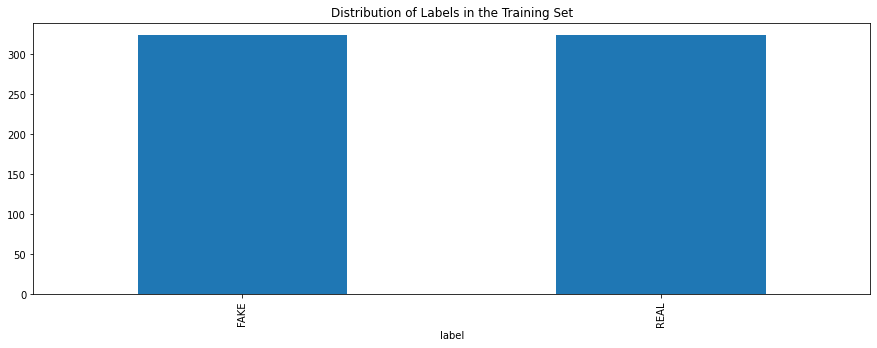

In [ ]:
#The "FAKE" and "REAL" labels are balanced
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

In [ ]:
#unzip /content/tmp1/dfdc_train_part_00.zip
#https://www.kaggle.com/c/16880/datadownload/dfdc_train_part_00.zip
path_00 = "/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/00/dfdc_train_part_0/"
df_00 = pd.read_json(path_00+'metadata.json').T


We comment out the next few cells used to put "REAL"-labeled video into the dataset

In [ ]:
# #copy 246 real videos to tran_sample_videos
# import shutil
# tmp_df = pd.DataFrame()
# counter1 = 0
# for index, row in df_00.iterrows():
#     if counter1 > 246:
#         print("moving complete!")
#         break
#     if row['label']=="REAL":
#         tmp_df=tmp_df.append(df_00.loc[index])
#         file_name = index
#         shutil.copy("./00/dfdc_train_part_0/"+file_name, "./data_folder/train_sample_videos/")
#         counter1+=1

In [ ]:
# new_json = train_sample_metadata.append(tmp_df)

In [ ]:
# new_json.to_json(r'./data_folder/train_sample_videos/metadata_v1.json')

CPU times: user 37.7 s, sys: 1.19 s, total: 38.9 s
Wall time: 13.3 s


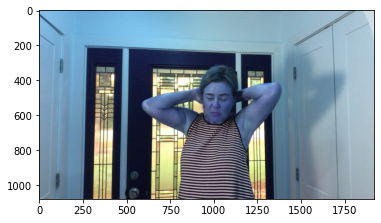

In [ ]:
%%time
#This is from the Kaggle challenge demo
import cv2
VIDEO_STREAM = "/tmp1/test_videos/ytddugrwph.mp4"
#VIDEO_STREAM_OUT = "/kaggle/input/deepfake-detection-challenge/test_videos/Result.mp4"

vidcap = cv2.VideoCapture(VIDEO_STREAM)
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image) # save frame as JPG file
        plt.imshow(image)
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
%matplotlib inline
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 36 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=01972d81315da4c9d87a60c082d052dbaf58b96ad60361ffe2a6f81705924cc2
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


I found 1 face(s) in this photograph.
A face is located at pixel location Top: 706, Left: 290, Bottom: 974, Right: 557


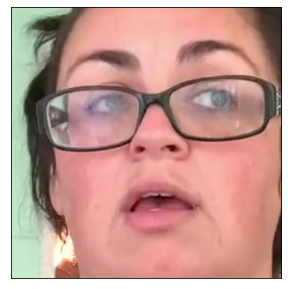

In [ ]:
import face_recognition
import cv2 as cv
import os
import matplotlib.pylab as plt
from PIL import Image
train_dir = '/tmp1/train_sample_videos/'
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = '/tmp1/train_sample_videos/afoovlsmtx.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release() 
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    # Access the actual face itself:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

In [ ]:
train_sample_metadata.index

Index(['aagfhgtpmv.mp4', 'aapnvogymq.mp4', 'abarnvbtwb.mp4', 'abofeumbvv.mp4',
       'abqwwspghj.mp4', 'acifjvzvpm.mp4', 'acqfdwsrhi.mp4', 'acxnxvbsxk.mp4',
       'acxwigylke.mp4', 'aczrgyricp.mp4',
       ...
       'esnntzzajv.mp4', 'esxrvsgpvb.mp4', 'esyhwdfnxs.mp4', 'esyrimvzsa.mp4',
       'etdcqxabww.mp4', 'etejaapnxh.mp4', 'etmcruaihe.mp4', 'etohcvnzbj.mp4',
       'eudeqjhdfd.mp4', 'eukvucdetx.mp4'],
      dtype='object', length=400)

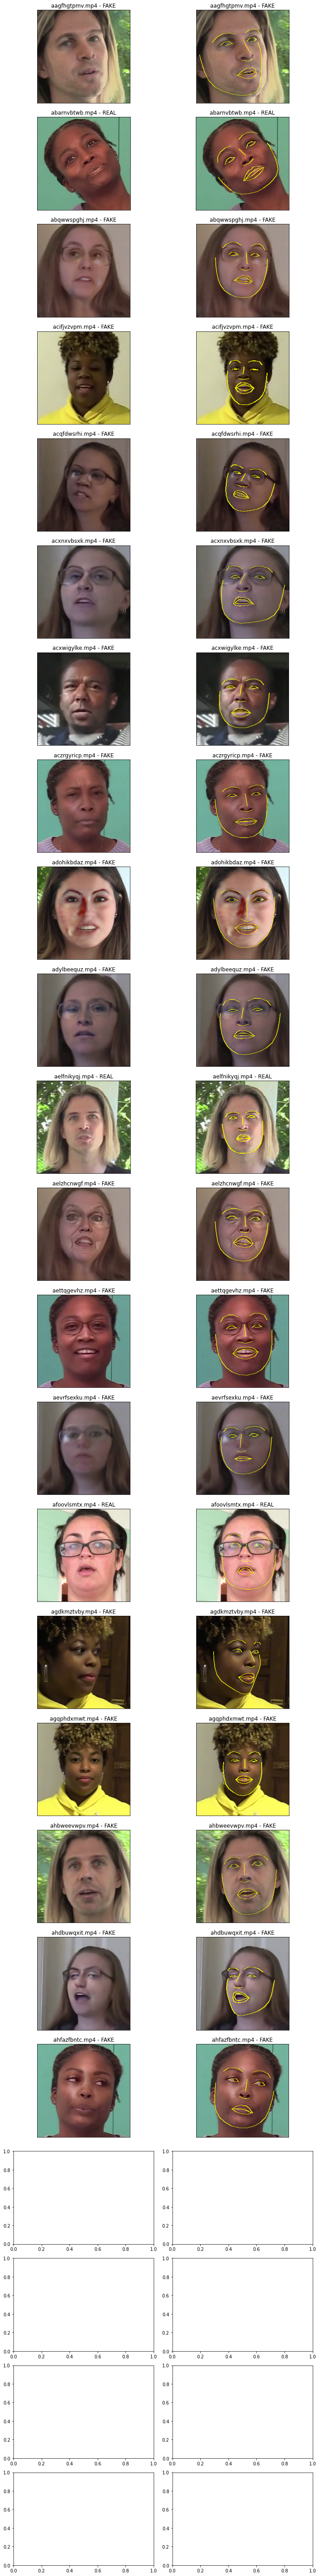

In [ ]:
from PIL import Image, ImageDraw

fig, axs = plt.subplots(24, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60 #pad is addded to the plot to zoom out of the face
for fn in train_sample_metadata.index[:24]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'/tmp1/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        if len(face_landmarks_list) > 0:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='yellow')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
plt.grid(False)
plt.tight_layout()
plt.show()

## Image Branch <a name="VideoBranch"></a>
This image-only model combines a CNN-encoder and an RNN-decoder. The CNN-encoder distils the information of the extracted images frame by frame while the RNN interprets these distilled information along the the temporal axis.

This code was originally written by Xinyi Ding, we modified it for our use.

[Back to TOC](#TOC)

### Training the video-only model

In [ ]:
#!pip install facenet_pytorch

In [609]:
import sys  
import data
from models import *

In [610]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
#import torch.utils.data as data
import torchvision
from torch.autograd import Variable
import json
import time

import cv2

from data import VideoDataset # we define the functions derectly in this notebook
import matplotlib.pyplot as plt
from models import * # we define the functions derectly in this notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import pickle


In [611]:
#os.chdir('/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/')

In [612]:
os.getcwd()

'C:\\Users\\lu936\\py\\lab 1'

In [613]:
# set path
data_path = "E:/cs8321/lab 1/"
save_model_path = "E:/cs8321/lab 1/InceptionV3/"
meta_data = "metadata_v3.json"
# EncoderCNN architecture
CNN_fc_hidden1, CNN_fc_hidden2 = 1024, 768
CNN_embed_dim = 64   # latent dim extracted by 2D CNN
res_size = 224        # ResNet image size
dropout_p = 0.3       # dropout probability

# DecoderRNN architecture
RNN_hidden_layers = 3
RNN_hidden_nodes = 128
RNN_FC_dim = 126

# training parameters
k = 2             # number of target category
epochs = 50      # training epochs
batch_size = 32
learning_rate = 1e-4
log_interval = 10   # interval for displaying training info

# Select which frame to begin & end in videos
begin_frame, end_frame, skip_frame = 1, 29, 1

In [614]:
def train(log_interval, model, device, train_loader, optimizer, epoch):
    # set model as training mode
    cnn_encoder, rnn_decoder = model
    cnn_encoder.train()
    rnn_decoder.train()

    losses = []
    scores = []
    N_count = 0   # counting total trained sample in one epoch
    start_time = time.time()
    print("Training start at {}".format(start_time))
    for batch_idx, (X, y) in enumerate(train_loader):
        # distribute data to device
        X, y = X.to(device), y.to(device).view(-1, )

        N_count += X.size(0)

        optimizer.zero_grad()
        output = rnn_decoder(cnn_encoder(X))   # output has dim = (batch, number of classes)

        loss = F.cross_entropy(output, y)
        losses.append(loss.item())

        tmp = torch.max(output, 1)
        # to compute accuracy
        y_pred = torch.max(output, 1)[1]  # y_pred != output
        step_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
        scores.append(step_score)         # computed on CPU

        loss.backward()
        optimizer.step()

        # show information
        end_time = time.time()
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accu: {:.2f}%, time elapsed: {}'.format(
            epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader),
            loss.item(), 100 * step_score, end_time-start_time))

    return losses, scores

In [615]:
def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder = model
    cnn_encoder.eval()
    rnn_decoder.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        for X, y in test_loader:
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )

            output = rnn_decoder(cnn_encoder(X))

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)

    test_loss /= len(test_loader.dataset)

    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())

    # show information
    print('\nTest set ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(len(all_y), test_loss, 100* test_score))

    # save Pytorch models of best record
    torch.save(cnn_encoder.state_dict(), os.path.join(save_model_path, 'cnn_encoder_epoch{}.pth'.format(epoch + 1)))  # save spatial_encoder
    torch.save(rnn_decoder.state_dict(), os.path.join(save_model_path, 'rnn_decoder_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
    print("Epoch {} model saved!".format(epoch + 1))

    return test_loss, test_score


def test(model, device, optimizer, test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder = model
    cnn_encoder.eval()
    rnn_decoder.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        for X, y in test_loader:
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )

            output = rnn_decoder(cnn_encoder(X))

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)
    test_loss /= len(test_loader.dataset)

    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())

    # show information
    print('\nTest set ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(len(all_y), test_loss, 100* test_score))
    return test_loss, test_score, all_y_pred.to('cpu').numpy().reshape(-1)


In [616]:
def get_X_y(data_folder,foldername):
    max_instance = 2000
    X = []
    y = []
    y_fake = 0
    y_true = 0
    folders = os.listdir(data_folder)
    
    video_folder = os.path.join(data_path, foldername)
    videos = os.listdir(video_folder)
    with open(os.path.join(video_folder, meta_data)) as json_file:
        label_data = pd.read_json(json_file)
    tmp = LabelEncoder()
    label_data['label_01'] = tmp.fit_transform(label_data['label'])

    for index, row in label_data.iterrows():
        v = row.name
        X.append(os.path.join(video_folder, v))      
        y.append(row['label_01'])
    return X, y

In [617]:
folder_name = (os.path.join(data_path+"train_sample_videos/"))
with open(os.path.join(data_path+"train_sample_videos/", meta_data)) as json_file:
    label_data = pd.read_json(json_file)

In [618]:
# videos = os.listdir(folder_name)
# counter = 0
# for v in videos:
#     if v.endswith('mp4'):
#       if v not in label_data.index:
#         os.remove(folder_name+v)
# print(counter) 

In [654]:
# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

# Data loading parameters
params = {'batch_size': batch_size, 'shuffle': True,  'pin_memory': True} if use_cuda else \
    {'batch_size': batch_size, 'shuffle': True, 'num_workers': 6}

all_X, all_y = get_X_y(data_path,'train_sample_videos/')


# train, test split

train_list, valid_list, train_label, valid_label = train_test_split(all_X, all_y,
                                                                  test_size=0.2, random_state = 2022,shuffle=True)
valid_list, test_list, valid_label, test_label = train_test_split(valid_list, valid_label,
                                                                  test_size=0.5, random_state = 2021,shuffle=True)



In [620]:
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#         transforms.Normalize([0.5]*3, [0.5]*3)
#     ])


# selected_frames = np.arange(begin_frame, end_frame, skip_frame).tolist()
num_frames = 20

train_set, valid_set, test_set = VideoDataset(train_list, train_label, num_frames, transform=transform), \
                       VideoDataset(valid_list, valid_label, num_frames, transform=transform),\
                       VideoDataset(test_list, test_label, num_frames, transform=transform)

train_loader = data.DataLoader(train_set, **params, drop_last=True)
valid_loader = data.DataLoader(valid_set, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False, pin_memory=True)

In [621]:
# Test set
# test_folder = "./input/deepfake-detection-challenge"
# test_X, test_y = get_X_y(data_path,"test_videos")
# test_set = VideoDataset(test_X, test_y, num_frames, transform=transform)
# test_loader = data.DataLoader(test_set, **params)


# Create model
cnn_encoder = InceptV3Encoder(fc_hidden1=CNN_fc_hidden1, fc_hidden2=CNN_fc_hidden2, drop_p=dropout_p, CNN_embed_dim=CNN_embed_dim).to(device)
#cnn_encoder = MesoInception4_v().to(device)
rnn_decoder = DecoderRNN(CNN_embed_dim=CNN_embed_dim, h_RNN_layers=RNN_hidden_layers, h_RNN=RNN_hidden_nodes,
                         h_FC_dim=RNN_FC_dim, drop_p=dropout_p, num_classes=k).to(device)

In [622]:
# Parallelize model to multiple GPUs
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    cnn_encoder = nn.DataParallel(cnn_encoder)
    rnn_decoder = nn.DataParallel(rnn_decoder)

    # Combine all EncoderCNN + DecoderRNN parameters
    crnn_params = list(cnn_encoder.module.fc1.parameters()) + list(cnn_encoder.module.bn1.parameters()) + \
                  list(cnn_encoder.module.fc2.parameters()) + list(cnn_encoder.module.bn2.parameters()) + \
                  list(cnn_encoder.module.fc3.parameters()) + list(rnn_decoder.parameters())

elif torch.cuda.device_count() == 1:
    print("Using", torch.cuda.device_count(), "GPU!")
    # Combine all EncoderCNN + DecoderRNN parameters
    # crnn_params = list(cnn_encoder.fc1.parameters()) + list(cnn_encoder.bn1.parameters()) + \
    #               list(cnn_encoder.fc2.parameters()) + list(cnn_encoder.bn2.parameters()) + \
    #               list(cnn_encoder.fc3.parameters()) + list(rnn_decoder.parameters())
    crnn_params = list(cnn_encoder.parameters()) + list(rnn_decoder.parameters())


optimizer = torch.optim.Adam(crnn_params, lr=learning_rate)
#optimizer = torch.optim.RMSprop(crnn_params, lr=learning_rate)


# record training process
epoch_train_losses = []
epoch_train_scores = []
epoch_test_losses = []
epoch_test_scores = []
epoch_test2_losses=[]
epoch_test2_scores=[]


Using 1 GPU!


In [264]:
import torch.nn.functional as F
for epoch in range(epochs):
    # train, test model
    train_losses, train_scores = train(log_interval, [cnn_encoder, rnn_decoder], device, train_loader, optimizer, epoch)
    epoch_test_loss, epoch_test_score = validation([cnn_encoder, rnn_decoder], device, optimizer, valid_loader)

    # Test
    epoch_test2_loss, epoch_test2_score,test_pred = test([cnn_encoder, rnn_decoder], device, optimizer, test_loader)

    # save results
# save results
    epoch_train_losses.append(train_losses)
    epoch_train_scores.append(train_scores)
    epoch_test_losses.append(epoch_test_loss)
    epoch_test_scores.append(epoch_test_score)
    epoch_test2_losses.append(epoch_test2_loss)
    epoch_test2_scores.append(epoch_test2_score)

    # save all train test results
    A = np.array(epoch_train_losses)
    B = np.array(epoch_train_scores)
    C = np.array(epoch_test_losses)
    D = np.array(epoch_test_scores)
    E1 = np.array(epoch_test2_losses)
    F1 = np.array(epoch_test2_scores) 

    np.save(save_model_path+'CRNN_epoch_training_losses.npy', A)
    np.save(save_model_path+'CRNN_epoch_training_scores.npy', B)
    np.save(save_model_path+'CRNN_epoch_test_loss.npy', C)
    np.save(save_model_path+'CRNN_epoch_test_score.npy', D)
    np.save(save_model_path+'CRNN_epoch_test2_loss.npy', E1)
    np.save(save_model_path+'CRNN_epoch_test2_score.npy', F1)
    np.save(save_model_path+f'y_pred_epoch{epoch+1}.npy', test_pred)


Training start at 1645769342.9545941
Train Epoch: 1 [32/516 (6%)]	Loss: 0.691275, Accu: 53.12%, time elapsed: 10.58088231086731
Train Epoch: 1 [64/516 (12%)]	Loss: 0.692135, Accu: 59.38%, time elapsed: 22.822953939437866
Train Epoch: 1 [96/516 (19%)]	Loss: 0.692333, Accu: 46.88%, time elapsed: 34.19310784339905
Train Epoch: 1 [128/516 (25%)]	Loss: 0.696454, Accu: 40.62%, time elapsed: 44.808255434036255
Train Epoch: 1 [160/516 (31%)]	Loss: 0.697375, Accu: 34.38%, time elapsed: 55.19109034538269
Train Epoch: 1 [192/516 (38%)]	Loss: 0.695251, Accu: 40.62%, time elapsed: 66.97969675064087
Train Epoch: 1 [224/516 (44%)]	Loss: 0.692605, Accu: 56.25%, time elapsed: 77.78773427009583
Train Epoch: 1 [256/516 (50%)]	Loss: 0.696009, Accu: 50.00%, time elapsed: 89.7707040309906
Train Epoch: 1 [288/516 (56%)]	Loss: 0.691187, Accu: 56.25%, time elapsed: 100.36435604095459
Train Epoch: 1 [320/516 (62%)]	Loss: 0.693638, Accu: 56.25%, time elapsed: 112.37049341201782
Train Epoch: 1 [352/516 (69%)]	Los


Test set (65 samples): Average loss: 0.5621, Accuracy: 72.31%

Epoch 5 model saved!

Test set (65 samples): Average loss: 0.5879, Accuracy: 69.23%

Training start at 1645770467.2773032
Train Epoch: 6 [32/516 (6%)]	Loss: 0.507756, Accu: 78.12%, time elapsed: 10.880397319793701
Train Epoch: 6 [64/516 (12%)]	Loss: 0.371685, Accu: 90.62%, time elapsed: 21.291321992874146
Train Epoch: 6 [96/516 (19%)]	Loss: 0.564084, Accu: 71.88%, time elapsed: 31.880675315856934
Train Epoch: 6 [128/516 (25%)]	Loss: 0.419746, Accu: 84.38%, time elapsed: 44.28414487838745
Train Epoch: 6 [160/516 (31%)]	Loss: 0.280257, Accu: 96.88%, time elapsed: 54.28005647659302
Train Epoch: 6 [192/516 (38%)]	Loss: 0.483219, Accu: 78.12%, time elapsed: 67.2715892791748
Train Epoch: 6 [224/516 (44%)]	Loss: 0.366794, Accu: 90.62%, time elapsed: 78.85700416564941
Train Epoch: 6 [256/516 (50%)]	Loss: 0.412023, Accu: 84.38%, time elapsed: 92.25148439407349
Train Epoch: 6 [288/516 (56%)]	Loss: 0.539215, Accu: 71.88%, time elapse

Train Epoch: 10 [480/516 (94%)]	Loss: 0.230106, Accu: 87.50%, time elapsed: 166.6958508491516
Train Epoch: 10 [512/516 (100%)]	Loss: 0.240949, Accu: 90.62%, time elapsed: 179.09743857383728

Test set (65 samples): Average loss: 0.5904, Accuracy: 72.31%

Epoch 10 model saved!

Test set (65 samples): Average loss: 0.6099, Accuracy: 67.69%

Training start at 1645771588.0590978
Train Epoch: 11 [32/516 (6%)]	Loss: 0.390736, Accu: 78.12%, time elapsed: 12.120589971542358
Train Epoch: 11 [64/516 (12%)]	Loss: 0.157589, Accu: 93.75%, time elapsed: 23.109000205993652
Train Epoch: 11 [96/516 (19%)]	Loss: 0.507418, Accu: 81.25%, time elapsed: 32.334275007247925
Train Epoch: 11 [128/516 (25%)]	Loss: 0.493218, Accu: 81.25%, time elapsed: 45.302008390426636
Train Epoch: 11 [160/516 (31%)]	Loss: 0.429063, Accu: 81.25%, time elapsed: 55.30487084388733
Train Epoch: 11 [192/516 (38%)]	Loss: 0.253539, Accu: 96.88%, time elapsed: 66.10474157333374
Train Epoch: 11 [224/516 (44%)]	Loss: 0.390927, Accu: 84.38

Train Epoch: 15 [416/516 (81%)]	Loss: 0.403720, Accu: 84.38%, time elapsed: 143.20440673828125
Train Epoch: 15 [448/516 (88%)]	Loss: 0.340587, Accu: 90.62%, time elapsed: 154.8036012649536
Train Epoch: 15 [480/516 (94%)]	Loss: 0.445035, Accu: 84.38%, time elapsed: 166.78772449493408
Train Epoch: 15 [512/516 (100%)]	Loss: 0.475269, Accu: 78.12%, time elapsed: 178.0131070613861

Test set (65 samples): Average loss: 0.9980, Accuracy: 55.38%

Epoch 15 model saved!

Test set (65 samples): Average loss: 1.0259, Accuracy: 50.77%

Training start at 1645772706.4730227
Train Epoch: 16 [32/516 (6%)]	Loss: 0.222657, Accu: 90.62%, time elapsed: 10.514113903045654
Train Epoch: 16 [64/516 (12%)]	Loss: 0.317458, Accu: 90.62%, time elapsed: 21.11807084083557
Train Epoch: 16 [96/516 (19%)]	Loss: 0.281612, Accu: 90.62%, time elapsed: 32.108007192611694
Train Epoch: 16 [128/516 (25%)]	Loss: 0.123003, Accu: 96.88%, time elapsed: 43.1107120513916
Train Epoch: 16 [160/516 (31%)]	Loss: 0.102152, Accu: 100.00%

Train Epoch: 20 [320/516 (62%)]	Loss: 0.300451, Accu: 84.38%, time elapsed: 111.9275848865509
Train Epoch: 20 [352/516 (69%)]	Loss: 0.131635, Accu: 96.88%, time elapsed: 124.71122765541077
Train Epoch: 20 [384/516 (75%)]	Loss: 0.256853, Accu: 93.75%, time elapsed: 135.50730991363525
Train Epoch: 20 [416/516 (81%)]	Loss: 0.143792, Accu: 93.75%, time elapsed: 147.0839924812317
Train Epoch: 20 [448/516 (88%)]	Loss: 0.587062, Accu: 84.38%, time elapsed: 157.30061793327332
Train Epoch: 20 [480/516 (94%)]	Loss: 0.215670, Accu: 93.75%, time elapsed: 167.69558477401733
Train Epoch: 20 [512/516 (100%)]	Loss: 0.161861, Accu: 93.75%, time elapsed: 177.90430212020874

Test set (65 samples): Average loss: 0.6630, Accuracy: 70.77%

Epoch 20 model saved!

Test set (65 samples): Average loss: 0.5595, Accuracy: 76.92%

Training start at 1645773825.262186
Train Epoch: 21 [32/516 (6%)]	Loss: 0.137772, Accu: 93.75%, time elapsed: 10.91841197013855
Train Epoch: 21 [64/516 (12%)]	Loss: 0.163297, Accu: 96.88

Train Epoch: 25 [224/516 (44%)]	Loss: 0.176075, Accu: 93.75%, time elapsed: 79.08959007263184
Train Epoch: 25 [256/516 (50%)]	Loss: 0.121401, Accu: 93.75%, time elapsed: 89.87474536895752
Train Epoch: 25 [288/516 (56%)]	Loss: 0.142511, Accu: 93.75%, time elapsed: 100.65536689758301
Train Epoch: 25 [320/516 (62%)]	Loss: 0.395307, Accu: 84.38%, time elapsed: 111.4748604297638
Train Epoch: 25 [352/516 (69%)]	Loss: 0.219649, Accu: 90.62%, time elapsed: 123.86190295219421
Train Epoch: 25 [384/516 (75%)]	Loss: 0.070277, Accu: 100.00%, time elapsed: 134.65681886672974
Train Epoch: 25 [416/516 (81%)]	Loss: 0.173091, Accu: 90.62%, time elapsed: 145.45546054840088
Train Epoch: 25 [448/516 (88%)]	Loss: 0.473695, Accu: 84.38%, time elapsed: 156.4508683681488
Train Epoch: 25 [480/516 (94%)]	Loss: 0.245111, Accu: 90.62%, time elapsed: 168.04488587379456
Train Epoch: 25 [512/516 (100%)]	Loss: 0.084096, Accu: 96.88%, time elapsed: 178.07123017311096

Test set (65 samples): Average loss: 0.6038, Accura

Train Epoch: 30 [160/516 (31%)]	Loss: 0.329486, Accu: 93.75%, time elapsed: 58.345359325408936
Train Epoch: 30 [192/516 (38%)]	Loss: 0.390514, Accu: 84.38%, time elapsed: 69.72510957717896
Train Epoch: 30 [224/516 (44%)]	Loss: 0.210761, Accu: 93.75%, time elapsed: 80.32158470153809
Train Epoch: 30 [256/516 (50%)]	Loss: 0.168330, Accu: 96.88%, time elapsed: 89.72560477256775
Train Epoch: 30 [288/516 (56%)]	Loss: 0.232049, Accu: 87.50%, time elapsed: 102.11849093437195
Train Epoch: 30 [320/516 (62%)]	Loss: 0.124801, Accu: 93.75%, time elapsed: 112.70951414108276
Train Epoch: 30 [352/516 (69%)]	Loss: 0.241344, Accu: 93.75%, time elapsed: 124.51453900337219
Train Epoch: 30 [384/516 (75%)]	Loss: 0.354013, Accu: 84.38%, time elapsed: 135.11120295524597
Train Epoch: 30 [416/516 (81%)]	Loss: 0.101482, Accu: 96.88%, time elapsed: 146.48444199562073
Train Epoch: 30 [448/516 (88%)]	Loss: 0.415057, Accu: 84.38%, time elapsed: 156.11359024047852
Train Epoch: 30 [480/516 (94%)]	Loss: 0.319675, Accu:

Train Epoch: 35 [64/516 (12%)]	Loss: 0.049734, Accu: 100.00%, time elapsed: 21.22813844680786
Train Epoch: 35 [96/516 (19%)]	Loss: 0.071409, Accu: 96.88%, time elapsed: 31.648448944091797
Train Epoch: 35 [128/516 (25%)]	Loss: 0.225789, Accu: 93.75%, time elapsed: 43.204548835754395
Train Epoch: 35 [160/516 (31%)]	Loss: 0.143244, Accu: 93.75%, time elapsed: 54.2159264087677
Train Epoch: 35 [192/516 (38%)]	Loss: 0.168292, Accu: 96.88%, time elapsed: 65.59259986877441
Train Epoch: 35 [224/516 (44%)]	Loss: 0.039128, Accu: 100.00%, time elapsed: 77.43031430244446
Train Epoch: 35 [256/516 (50%)]	Loss: 0.307258, Accu: 84.38%, time elapsed: 89.00697374343872
Train Epoch: 35 [288/516 (56%)]	Loss: 0.169077, Accu: 90.62%, time elapsed: 100.02917575836182
Train Epoch: 35 [320/516 (62%)]	Loss: 0.332167, Accu: 87.50%, time elapsed: 109.40273308753967
Train Epoch: 35 [352/516 (69%)]	Loss: 0.145011, Accu: 90.62%, time elapsed: 121.40965056419373
Train Epoch: 35 [384/516 (75%)]	Loss: 0.095554, Accu: 96


Test set (65 samples): Average loss: 0.8643, Accuracy: 76.92%

Epoch 39 model saved!

Test set (65 samples): Average loss: 0.9034, Accuracy: 72.31%

Training start at 1645778075.0180824
Train Epoch: 40 [32/516 (6%)]	Loss: 0.109198, Accu: 93.75%, time elapsed: 9.528260231018066
Train Epoch: 40 [64/516 (12%)]	Loss: 0.159004, Accu: 93.75%, time elapsed: 21.33065891265869
Train Epoch: 40 [96/516 (19%)]	Loss: 0.103784, Accu: 93.75%, time elapsed: 31.713009357452393
Train Epoch: 40 [128/516 (25%)]	Loss: 0.258573, Accu: 87.50%, time elapsed: 43.70912289619446
Train Epoch: 40 [160/516 (31%)]	Loss: 0.133770, Accu: 93.75%, time elapsed: 56.50078201293945
Train Epoch: 40 [192/516 (38%)]	Loss: 0.130299, Accu: 93.75%, time elapsed: 67.49996256828308
Train Epoch: 40 [224/516 (44%)]	Loss: 0.065977, Accu: 96.88%, time elapsed: 78.90675258636475
Train Epoch: 40 [256/516 (50%)]	Loss: 0.087489, Accu: 96.88%, time elapsed: 90.89174199104309
Train Epoch: 40 [288/516 (56%)]	Loss: 0.064244, Accu: 100.00%, t

Train Epoch: 44 [448/516 (88%)]	Loss: 0.079173, Accu: 93.75%, time elapsed: 156.03690576553345
Train Epoch: 44 [480/516 (94%)]	Loss: 0.105884, Accu: 96.88%, time elapsed: 166.03605604171753
Train Epoch: 44 [512/516 (100%)]	Loss: 0.243141, Accu: 93.75%, time elapsed: 177.60917329788208

Test set (65 samples): Average loss: 0.6241, Accuracy: 81.54%

Epoch 44 model saved!

Test set (65 samples): Average loss: 0.6812, Accuracy: 80.00%

Training start at 1645779191.808491
Train Epoch: 45 [32/516 (6%)]	Loss: 0.056492, Accu: 100.00%, time elapsed: 12.343262910842896
Train Epoch: 45 [64/516 (12%)]	Loss: 0.078367, Accu: 96.88%, time elapsed: 22.16536784172058
Train Epoch: 45 [96/516 (19%)]	Loss: 0.221708, Accu: 93.75%, time elapsed: 32.94835352897644
Train Epoch: 45 [128/516 (25%)]	Loss: 0.150717, Accu: 93.75%, time elapsed: 44.1354775428772
Train Epoch: 45 [160/516 (31%)]	Loss: 0.117917, Accu: 93.75%, time elapsed: 54.53137230873108
Train Epoch: 45 [192/516 (38%)]	Loss: 0.130648, Accu: 96.88%,

Train Epoch: 49 [352/516 (69%)]	Loss: 0.195105, Accu: 93.75%, time elapsed: 123.76513314247131
Train Epoch: 49 [384/516 (75%)]	Loss: 0.042991, Accu: 100.00%, time elapsed: 133.96113204956055
Train Epoch: 49 [416/516 (81%)]	Loss: 0.157898, Accu: 93.75%, time elapsed: 144.3597137928009
Train Epoch: 49 [448/516 (88%)]	Loss: 0.103888, Accu: 96.88%, time elapsed: 154.95512890815735
Train Epoch: 49 [480/516 (94%)]	Loss: 0.137399, Accu: 93.75%, time elapsed: 165.5511770248413
Train Epoch: 49 [512/516 (100%)]	Loss: 0.109409, Accu: 93.75%, time elapsed: 177.53197956085205

Test set (65 samples): Average loss: 0.7012, Accuracy: 78.46%

Epoch 49 model saved!

Test set (65 samples): Average loss: 0.5404, Accuracy: 86.15%

Training start at 1645780309.2358775
Train Epoch: 50 [32/516 (6%)]	Loss: 0.088683, Accu: 96.88%, time elapsed: 10.9473237991333
Train Epoch: 50 [64/516 (12%)]	Loss: 0.119940, Accu: 93.75%, time elapsed: 22.343384504318237
Train Epoch: 50 [96/516 (19%)]	Loss: 0.050969, Accu: 100.0

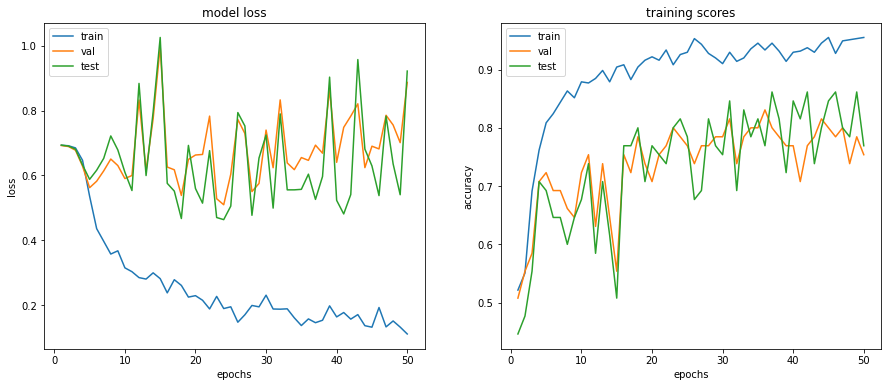

In [623]:
%matplotlib inline
path = 'E:/cs8321/lab 1/InceptionV3/'
A = np.load(path+'CRNN_epoch_training_losses.npy')
B = np.load(path+'CRNN_epoch_training_scores.npy')
C = np.load(path+'CRNN_epoch_test_loss.npy')
D = np.load(path+'CRNN_epoch_test_score.npy')
E1 = np.load(path+'CRNN_epoch_test2_loss.npy')
F1 = np.load(path+'CRNN_epoch_test2_score.npy')
# plot
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(np.arange(1, epochs + 1), np.mean(A,1))  # train loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), C)         #  test loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), E1)         #  test loss (on epoch end)
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val','test'], loc="upper left")

# 2nd figure
plt.subplot(122)
plt.plot(np.arange(1, epochs + 1), np.mean(B,1))  # train accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), D)         #  test accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), F1)         #  test loss (on epoch end)
plt.title("training scores")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val','test'], loc="upper left")
title = "./fig_UCF101_ResNetCRNN.png"
#plt.savefig(title, dpi=600)
#plt.close(fig)
plt.show()

We select the best model based on the validation loss performance. Our rule is kind of "early stopping" that if the validation loss doesn't drop for a few epochs in a row, then the model at that monet is the best model we choose.

In [624]:
#select the best model based on "early stopping"
patience = 10
waited_now = 0
min_ = 1000
for ep_,i in enumerate(C):
    if i > min_:
        waited_now += 1
        if waited_now == patience:
            test_epoch = ep_-9
            print(f"best model we choose is at epoch {ep_-9}, baseds on patien {patience} epochs")
            break
    else:
        waited_now = 0
        min_ = i

best model we choose is at epoch 5, baseds on patien 10 epochs


In [625]:
# The highest accuracy achieved:
print(f"The highest accuracy on the testing set achived is \n{F1[test_epoch-1]}%")

The highest accuracy on the testing set achived is 
0.6923076923076923%


In [626]:
#load the best model and get the predicts
save_model_path = "E:/cs8321/lab 1/InceptionV3/"
cnn_encoder.load_state_dict(torch.load(os.path.join(save_model_path, 'cnn_encoder_epoch{}.pth'.format(test_epoch))))
rnn_decoder.load_state_dict(torch.load(os.path.join(save_model_path, 'rnn_decoder_epoch{}.pth'.format(test_epoch))))
optimizer.load_state_dict(torch.load(os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(test_epoch))))

In [627]:
loss_v, acc_v, y_pred_v = test([cnn_encoder, rnn_decoder], device, optimizer, test_loader)


Test set (65 samples): Average loss: 0.5879, Accuracy: 69.23%



## Audio Branch <a name = "AudioBranch"> </a>

yifan input here

[Back to TOC](#TOC)

In [537]:
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
#import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [628]:
videopath = "E:/cs8321/lab 1/train_sample_videos/"
audiopath = "E:/cs8321/lab 1/train_sample_videos/audio/"
MFCCpath = "E:/cs8321/lab 1/train_sample_videos/MFCC/"
df = pd.read_json(videopath + "metadata_v3.json")
df['filename'] = df.index

tmp = LabelEncoder()
df['label_01'] = tmp.fit_transform(df['label'])
df.head()

,label,split,original,index1,filename,label_01
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4,aagfhgtpmv.mp4,aagfhgtpmv.mp4,0
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4,aapnvogymq.mp4,aapnvogymq.mp4,0
abarnvbtwb.mp4,REAL,train,None,abarnvbtwb.mp4,abarnvbtwb.mp4,1
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4,abofeumbvv.mp4,abofeumbvv.mp4,0
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4,abqwwspghj.mp4,abqwwspghj.mp4,0


In [267]:
from moviepy.editor import VideoFileClip
import tqdm
from tqdm import tqdm

def convert_video_to_audio(video_file, output_ext = ".wav"):
    filename, ext = os.path.splitext(video_file)
    filename = filename.split("/")[-1]
    clip = VideoFileClip(video_file)
    clip.audio.write_audiofile(audiopath + filename + output_ext)

def convert_all(df):
    for index in tqdm(df.index, total=df.shape[0]):
        convert_video_to_audio(videopath + index)

In [ ]:
# #convert all the vedios to audio and save to dir
# convert_all(df)

In [ ]:
import librosa
import IPython.display
import librosa.display


In [ ]:
#transform audio files into MFCC features
def trans_to_MFCC(df):
    audio_feature = []
    for index,dfrow in tqdm(df.iterrows(), total=df.shape[0]):
        wave, sr = librosa.load(audiopath + os.path.splitext(index)[0] + ".wav", mono=True)
        mfcc = librosa.feature.mfcc(y = wave, sr=sr)
        mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
        audio_feature.append(mfcc.T)
        
    return np.array(audio_feature)

In [ ]:
# %%time
# X = trans_to_MFCC(df)
# with open(MFCCpath+"train_X.pickle", 'wb') as handle:
#     pickle.dump(X, handle) 
# print("saved to file")

100%|██████████| 646/646 [04:33<00:00,  2.37it/s]

saved to file
CPU times: user 5min 2s, sys: 3min 18s, total: 8min 20s
Wall time: 4min 33s


In [629]:
%%time
import pickle
if not ("train_X.pickle" in os.listdir(MFCCpath)):
    X = trans_to_MFCC(df)
    with open(MFCCpath+"train_X.pickle", 'wb') as handle:
        pickle.dump(X, handle) 
    print("saved to file")
else:
    with open(MFCCpath+"train_X.pickle", 'rb') as handle:
        X = pickle.load(handle)
    print("loaded from file")

loaded from file
CPU times: total: 0 ns
Wall time: 8 ms


In [630]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [631]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else cpu)

In [632]:
Y = np.array(df["label_01"])
Y.shape

(646,)

In [633]:
X = torch.from_numpy(X)
Y = torch.from_numpy(Y).reshape(-1,1)

In [634]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2022, shuffle=True)
X_val, X_test, y_val, y_test =  train_test_split(X_val, y_val, test_size=0.5, random_state=2021, shuffle=True)

In [635]:
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

batch_size = 32

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True,drop_last=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True,drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False,drop_last=True)

In [636]:
# Constructing the model
class rnn(nn.Module):
    def __init__(self, input_size, hidden_dim, num_classes, num_layers, hidden_l1, dropout1=0.6,dropout2=0.6):
        super(rnn, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.dropout1 = dropout1
        self.dropout2 = dropout2
        self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, dropout=dropout1, batch_first=True) # bidirectional
       # self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, bidirectional=True,dropout=dropout, batch_first=True)#
        self.linear1 = nn.Linear(hidden_dim, hidden_l1)
        self.linear2 = nn.Linear(hidden_l1, num_classes)
        self.sigmoid = nn.Sigmoid()
        self.drop = nn.Dropout(dropout2)
       
    def forward(self, x, hidden):
        batch_size = x.size(0)
        #x = x.long()
        out, hidden = self.lstm(x, hidden)
        out = out[:,-1,:].reshape(-1,self.hidden_dim)
        out = self.linear1(out)
        out = self.drop(out)
        out = self.linear2(out)
        pred = self.sigmoid(out).reshape(batch_size,-1)
        
        return pred, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.num_layers, batch_size, self.hidden_dim).zero_().to(device),
                 weight.new(self.num_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden
    


In [637]:
input_size = X.shape[2]
num_classes = 1
hidden_dim = 32
num_layers = 2
hidden_l1 = 32
hidden_l2 = 16
dropout1 = 0.6
dropout2 = 0.6
model = rnn(input_size, hidden_dim, num_classes, num_layers, hidden_l1,dropout1,dropout2)
print(model)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 50

model = model.to(device)

rnn(
  (lstm): LSTM(20, 32, num_layers=2, batch_first=True, dropout=0.6)
  (linear1): Linear(in_features=32, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (drop): Dropout(p=0.6, inplace=False)
)


In [638]:
def train(model, device, data_loader, criterion, optimizer, num_epochs, val_loader, test_loader):
    # Train the network
    hist = []
    for epoch in tqdm(range(epochs)):
        hs = model.init_hidden(batch_size)
        train_loss = []
        train_accuracy = 0.0
        model.train()
        for batch, (data, target) in enumerate(train_loader):
            # Obtaining the cuda parameters
            data = data.to(device=device)
            target = target.to(device=device)
            optimizer.zero_grad()

            # Forward propagation
            score, hs = model(data, hs)
            hs = tuple([h.data for h in hs])
            loss = criterion(score, target.float())
            train_loss.append(loss.item())
            # Backward propagation
            loss.backward()
            optimizer.step()
            score_01 = score>0.5
            train_accuracy += torch.sum(score_01 == target)
        #save model
        torch.save(model.state_dict(), os.path.join('E:/cs8321/lab 1/audio/video_epoch{}.pth'.format(epoch + 1)))
        #######################################################
        #evaluation part
        model.eval()
        hs = model.init_hidden(batch_size)
        val_loss = []
        val_accuracy = 0.0
        test_loss = []
        test_accuracy = 0.0
        with torch.no_grad():
            for x, y in val_loader:
                x = x.to(device=device)
                y = y.to(device=device)

                scores, hs = model(x,hs)
                hs = tuple([h.data for h in hs])
                loss = criterion(scores, y.float())
                val_loss.append(loss.item())
                scores_01 = scores>0.5
                val_accuracy += torch.sum(scores_01==y)

        hs = model.init_hidden(batch_size)      
        with torch.no_grad():
            for x, y in test_loader:
                x = x.to(device=device)
                y = y.to(device=device)

                scores, hs = model(x,hs)
                hs = tuple([h.data for h in hs])
                loss = criterion(scores, y.float())
                test_loss.append(loss.item())
                scores_01 = scores>0.5
                test_accuracy += torch.sum(scores_01==y)

        tl = np.round(np.mean(train_loss),5)
        vl = np.round(np.mean(val_loss),5)
        testl = np.round(np.mean(test_loss),5)
        ta = train_accuracy/(len(y_train))
        va = val_accuracy/(len(y_val))
        testa = test_accuracy/(len(y_test))
        print(f"Epoch {epoch+1}/{epochs} --- train loss {tl} --- val loss {vl} ---test loss {testl}")
        print(f"train accuracy {ta} --- val accuracy {va} --- test accuracy {testa}")
        hist.append([tl,vl,testl, ta,va,testa])

    return hist

In [639]:
hi = train(model, device, train_loader, criterion, optimizer, epochs, val_loader, test_loader)

  2%|█▋                                                                                 | 1/50 [00:00<00:31,  1.53it/s]

Epoch 1/50 --- train loss 0.69673 --- val loss 0.69473 ---test loss 0.6944
train accuracy 0.45736435055732727 --- val accuracy 0.5076923370361328 --- test accuracy 0.446153849363327


  4%|███▎                                                                               | 2/50 [00:01<00:23,  2.07it/s]

Epoch 2/50 --- train loss 0.69013 --- val loss 0.6945 ---test loss 0.69318
train accuracy 0.5426356792449951 --- val accuracy 0.4615384638309479 --- test accuracy 0.5076923370361328


  6%|████▉                                                                              | 3/50 [00:01<00:20,  2.32it/s]

Epoch 3/50 --- train loss 0.69091 --- val loss 0.69615 ---test loss 0.69283
train accuracy 0.5174418687820435 --- val accuracy 0.4615384638309479 --- test accuracy 0.5230769515037537


  8%|██████▋                                                                            | 4/50 [00:01<00:18,  2.45it/s]

Epoch 4/50 --- train loss 0.6891 --- val loss 0.69821 ---test loss 0.69412
train accuracy 0.5465116500854492 --- val accuracy 0.446153849363327 --- test accuracy 0.4769230782985687


 10%|████████▎                                                                          | 5/50 [00:02<00:17,  2.54it/s]

Epoch 5/50 --- train loss 0.68122 --- val loss 0.70217 ---test loss 0.69688
train accuracy 0.6085271239280701 --- val accuracy 0.4307692348957062 --- test accuracy 0.5230769515037537


 12%|█████████▉                                                                         | 6/50 [00:02<00:16,  2.60it/s]

Epoch 6/50 --- train loss 0.6724 --- val loss 0.69328 ---test loss 0.69064
train accuracy 0.6124030947685242 --- val accuracy 0.5538461804389954 --- test accuracy 0.5384615659713745


 14%|███████████▌                                                                       | 7/50 [00:02<00:16,  2.63it/s]

Epoch 7/50 --- train loss 0.65676 --- val loss 0.68214 ---test loss 0.68913
train accuracy 0.6240310072898865 --- val accuracy 0.6461538672447205 --- test accuracy 0.5384615659713745


 16%|█████████████▎                                                                     | 8/50 [00:03<00:15,  2.66it/s]

Epoch 8/50 --- train loss 0.63205 --- val loss 0.66292 ---test loss 0.68927
train accuracy 0.6744186282157898 --- val accuracy 0.6615384817123413 --- test accuracy 0.5538461804389954


 18%|██████████████▉                                                                    | 9/50 [00:03<00:15,  2.68it/s]

Epoch 9/50 --- train loss 0.60284 --- val loss 0.63356 ---test loss 0.70008
train accuracy 0.6976743936538696 --- val accuracy 0.6615384817123413 --- test accuracy 0.6000000238418579


 20%|████████████████▍                                                                 | 10/50 [00:03<00:14,  2.68it/s]

Epoch 10/50 --- train loss 0.57813 --- val loss 0.63937 ---test loss 0.70761
train accuracy 0.6996123790740967 --- val accuracy 0.6615384817123413 --- test accuracy 0.5538461804389954


 22%|██████████████████                                                                | 11/50 [00:04<00:14,  2.70it/s]

Epoch 11/50 --- train loss 0.55464 --- val loss 0.59927 ---test loss 0.72489
train accuracy 0.7228682041168213 --- val accuracy 0.692307710647583 --- test accuracy 0.6153846383094788


 24%|███████████████████▋                                                              | 12/50 [00:04<00:14,  2.70it/s]

Epoch 12/50 --- train loss 0.53974 --- val loss 0.59748 ---test loss 0.72441
train accuracy 0.7364341020584106 --- val accuracy 0.7076923251152039 --- test accuracy 0.5846154093742371


 26%|█████████████████████▎                                                            | 13/50 [00:05<00:13,  2.71it/s]

Epoch 13/50 --- train loss 0.48162 --- val loss 0.58417 ---test loss 0.74803
train accuracy 0.7810077667236328 --- val accuracy 0.692307710647583 --- test accuracy 0.6000000238418579


 28%|██████████████████████▉                                                           | 14/50 [00:05<00:13,  2.70it/s]

Epoch 14/50 --- train loss 0.43629 --- val loss 0.57276 ---test loss 0.74924
train accuracy 0.7906976938247681 --- val accuracy 0.7076923251152039 --- test accuracy 0.6615384817123413


 30%|████████████████████████▌                                                         | 15/50 [00:05<00:12,  2.71it/s]

Epoch 15/50 --- train loss 0.41668 --- val loss 0.63126 ---test loss 0.74808
train accuracy 0.8120154738426208 --- val accuracy 0.7076923251152039 --- test accuracy 0.692307710647583


 32%|██████████████████████████▏                                                       | 16/50 [00:06<00:12,  2.70it/s]

Epoch 16/50 --- train loss 0.39182 --- val loss 0.74904 ---test loss 0.76601
train accuracy 0.8313953280448914 --- val accuracy 0.6769230961799622 --- test accuracy 0.6769230961799622


 34%|███████████████████████████▉                                                      | 17/50 [00:06<00:12,  2.69it/s]

Epoch 17/50 --- train loss 0.34865 --- val loss 0.74903 ---test loss 0.85332
train accuracy 0.8468992114067078 --- val accuracy 0.6769230961799622 --- test accuracy 0.7076923251152039


 36%|█████████████████████████████▌                                                    | 18/50 [00:06<00:11,  2.69it/s]

Epoch 18/50 --- train loss 0.33886 --- val loss 0.75637 ---test loss 0.87163
train accuracy 0.8449612259864807 --- val accuracy 0.692307710647583 --- test accuracy 0.7076923251152039


 38%|███████████████████████████████▏                                                  | 19/50 [00:07<00:11,  2.70it/s]

Epoch 19/50 --- train loss 0.28563 --- val loss 0.82754 ---test loss 0.92494
train accuracy 0.8895348906517029 --- val accuracy 0.7230769395828247 --- test accuracy 0.692307710647583


 40%|████████████████████████████████▊                                                 | 20/50 [00:07<00:11,  2.71it/s]

Epoch 20/50 --- train loss 0.30269 --- val loss 0.84341 ---test loss 0.89124
train accuracy 0.8740310072898865 --- val accuracy 0.7076923251152039 --- test accuracy 0.692307710647583


 42%|██████████████████████████████████▍                                               | 21/50 [00:08<00:10,  2.71it/s]

Epoch 21/50 --- train loss 0.25785 --- val loss 0.8775 ---test loss 0.89729
train accuracy 0.8875969052314758 --- val accuracy 0.7076923251152039 --- test accuracy 0.7230769395828247


 44%|████████████████████████████████████                                              | 22/50 [00:08<00:10,  2.70it/s]

Epoch 22/50 --- train loss 0.2406 --- val loss 0.99084 ---test loss 0.96534
train accuracy 0.8972868323326111 --- val accuracy 0.7076923251152039 --- test accuracy 0.692307710647583


 46%|█████████████████████████████████████▋                                            | 23/50 [00:08<00:10,  2.70it/s]

Epoch 23/50 --- train loss 0.23114 --- val loss 1.12931 ---test loss 1.14695
train accuracy 0.8972868323326111 --- val accuracy 0.6769230961799622 --- test accuracy 0.6153846383094788


 48%|███████████████████████████████████████▎                                          | 24/50 [00:09<00:09,  2.70it/s]

Epoch 24/50 --- train loss 0.22349 --- val loss 1.00139 ---test loss 0.99614
train accuracy 0.893410861492157 --- val accuracy 0.7230769395828247 --- test accuracy 0.7076923251152039


 50%|█████████████████████████████████████████                                         | 25/50 [00:09<00:09,  2.71it/s]

Epoch 25/50 --- train loss 0.21828 --- val loss 1.18471 ---test loss 1.03554
train accuracy 0.9147287011146545 --- val accuracy 0.7230769395828247 --- test accuracy 0.692307710647583


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:09<00:08,  2.70it/s]

Epoch 26/50 --- train loss 0.21771 --- val loss 1.16468 ---test loss 1.07221
train accuracy 0.9089147448539734 --- val accuracy 0.7384615540504456 --- test accuracy 0.6769230961799622


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:10<00:08,  2.71it/s]

Epoch 27/50 --- train loss 0.19368 --- val loss 1.23752 ---test loss 1.103
train accuracy 0.9089147448539734 --- val accuracy 0.6769230961799622 --- test accuracy 0.6307692527770996


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:10<00:08,  2.71it/s]

Epoch 28/50 --- train loss 0.18769 --- val loss 1.27589 ---test loss 1.15114
train accuracy 0.9108527302742004 --- val accuracy 0.692307710647583 --- test accuracy 0.7230769395828247


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:10<00:07,  2.71it/s]

Epoch 29/50 --- train loss 0.20384 --- val loss 1.30448 ---test loss 1.19578
train accuracy 0.9011628031730652 --- val accuracy 0.7076923251152039 --- test accuracy 0.7230769395828247


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:11<00:07,  2.72it/s]

Epoch 30/50 --- train loss 0.18812 --- val loss 1.21299 ---test loss 1.30153
train accuracy 0.9282945990562439 --- val accuracy 0.7076923251152039 --- test accuracy 0.692307710647583


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:11<00:07,  2.71it/s]

Epoch 31/50 --- train loss 0.14842 --- val loss 1.33889 ---test loss 1.20581
train accuracy 0.9282945990562439 --- val accuracy 0.692307710647583 --- test accuracy 0.7076923251152039


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:12<00:06,  2.72it/s]

Epoch 32/50 --- train loss 0.18919 --- val loss 1.28162 ---test loss 1.15021
train accuracy 0.9031007885932922 --- val accuracy 0.692307710647583 --- test accuracy 0.7076923251152039


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:12<00:06,  2.71it/s]

Epoch 33/50 --- train loss 0.15116 --- val loss 1.31317 ---test loss 1.14562
train accuracy 0.9147287011146545 --- val accuracy 0.6769230961799622 --- test accuracy 0.7230769395828247


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:12<00:05,  2.71it/s]

Epoch 34/50 --- train loss 0.16109 --- val loss 1.49462 ---test loss 1.44379
train accuracy 0.9244186282157898 --- val accuracy 0.6769230961799622 --- test accuracy 0.6307692527770996


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:13<00:05,  2.71it/s]

Epoch 35/50 --- train loss 0.16055 --- val loss 1.37367 ---test loss 1.25582
train accuracy 0.9341084957122803 --- val accuracy 0.6769230961799622 --- test accuracy 0.7076923251152039


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:13<00:05,  2.72it/s]

Epoch 36/50 --- train loss 0.14074 --- val loss 1.4719 ---test loss 1.34677
train accuracy 0.9205426573753357 --- val accuracy 0.692307710647583 --- test accuracy 0.7076923251152039


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [00:13<00:04,  2.72it/s]

Epoch 37/50 --- train loss 0.13348 --- val loss 1.46807 ---test loss 1.31538
train accuracy 0.9360464811325073 --- val accuracy 0.6769230961799622 --- test accuracy 0.7384615540504456


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:14<00:04,  2.72it/s]

Epoch 38/50 --- train loss 0.15684 --- val loss 1.54515 ---test loss 1.41389
train accuracy 0.9224806427955627 --- val accuracy 0.6615384817123413 --- test accuracy 0.6769230961799622


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:14<00:04,  2.72it/s]

Epoch 39/50 --- train loss 0.18329 --- val loss 1.36909 ---test loss 1.21249
train accuracy 0.9127907156944275 --- val accuracy 0.6769230961799622 --- test accuracy 0.6769230961799622


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:15<00:03,  2.71it/s]

Epoch 40/50 --- train loss 0.14872 --- val loss 1.31501 ---test loss 1.26259
train accuracy 0.9205426573753357 --- val accuracy 0.692307710647583 --- test accuracy 0.7230769395828247


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:15<00:03,  2.71it/s]

Epoch 41/50 --- train loss 0.16269 --- val loss 1.37066 ---test loss 1.26989
train accuracy 0.9166666865348816 --- val accuracy 0.6769230961799622 --- test accuracy 0.7076923251152039


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:15<00:02,  2.72it/s]

Epoch 42/50 --- train loss 0.13478 --- val loss 1.41206 ---test loss 1.31519
train accuracy 0.9360464811325073 --- val accuracy 0.6615384817123413 --- test accuracy 0.6461538672447205


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:16<00:02,  2.72it/s]

Epoch 43/50 --- train loss 0.14354 --- val loss 1.48068 ---test loss 1.31383
train accuracy 0.9244186282157898 --- val accuracy 0.6461538672447205 --- test accuracy 0.7384615540504456


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:16<00:02,  2.72it/s]

Epoch 44/50 --- train loss 0.15254 --- val loss 1.40195 ---test loss 1.38927
train accuracy 0.9166666865348816 --- val accuracy 0.6769230961799622 --- test accuracy 0.6769230961799622


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:16<00:01,  2.72it/s]

Epoch 45/50 --- train loss 0.13224 --- val loss 1.51143 ---test loss 1.43054
train accuracy 0.9166666865348816 --- val accuracy 0.6615384817123413 --- test accuracy 0.6769230961799622


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [00:17<00:01,  2.72it/s]

Epoch 46/50 --- train loss 0.12266 --- val loss 1.49189 ---test loss 1.4205
train accuracy 0.9341084957122803 --- val accuracy 0.692307710647583 --- test accuracy 0.6615384817123413


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:17<00:01,  2.72it/s]

Epoch 47/50 --- train loss 0.12399 --- val loss 1.65013 ---test loss 1.56219
train accuracy 0.9321705102920532 --- val accuracy 0.6615384817123413 --- test accuracy 0.6615384817123413


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:17<00:00,  2.72it/s]

Epoch 48/50 --- train loss 0.13801 --- val loss 1.52364 ---test loss 1.36999
train accuracy 0.9263566136360168 --- val accuracy 0.7230769395828247 --- test accuracy 0.6769230961799622


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [00:18<00:00,  2.73it/s]

Epoch 49/50 --- train loss 0.12468 --- val loss 1.58336 ---test loss 1.38895
train accuracy 0.9321705102920532 --- val accuracy 0.6615384817123413 --- test accuracy 0.7076923251152039


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.67it/s]

Epoch 50/50 --- train loss 0.11567 --- val loss 1.66075 ---test loss 1.59029
train accuracy 0.9302325248718262 --- val accuracy 0.7076923251152039 --- test accuracy 0.6769230961799622


In [640]:
for item in hi:
    item[3]=item[3].to("cpu")
    item[4]=item[4].to("cpu")
    item[5]=item[5].to("cpu")
hi_loss =[]
hi_acc = []
for item in hi:
    hi_loss.append(item[0:3])
    hi_acc.append(item[3:6])

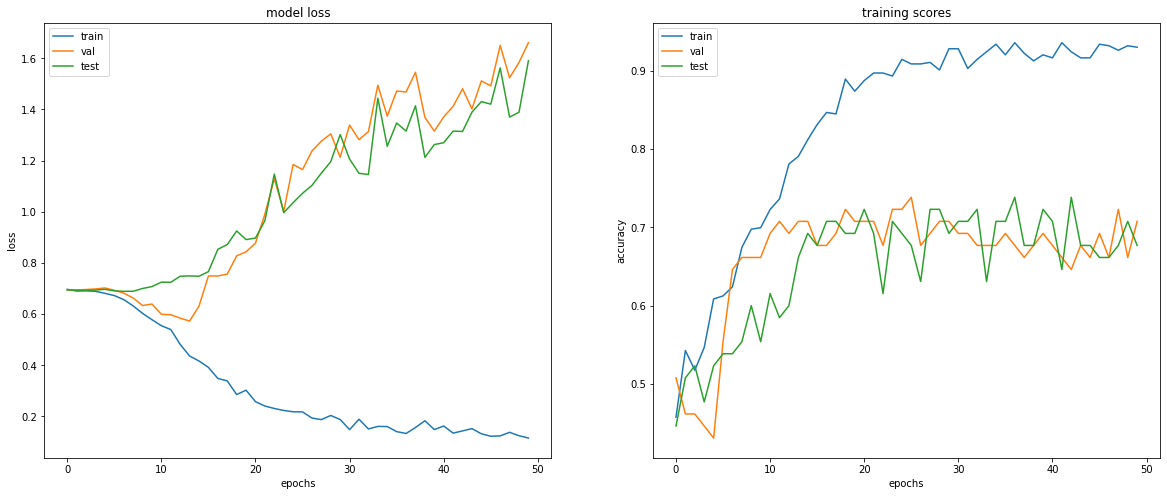

In [641]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(121)

plt.plot(hi_loss)  # train loss (on epoch end)      #  test loss (on epoch end)
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val','test'], loc="upper left")

# 2nd figure
plt.subplot(122)
plt.plot(hi_acc)       #  test accuracy (on epoch end)
plt.title("training scores")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val','test'], loc="upper left")
title = "./fig_UCF101_ResNetCRNN.png"
#plt.close(fig)
plt.show()

In [642]:
#select the best model based on "early stopping"
patience = 10
waited_now = 0
min_ = 1000
for ep_,i in enumerate(np.array(hi_loss)[:,1]):
    if i > min_:
        waited_now += 1
        if waited_now == patience:
            test_epoch = ep_-9
            print(f"best model we choose is at epoch {ep_-9}, baseds on patien {patience} epochs")
            break
    else:
        waited_now = 0
        min_ = i



best model we choose is at epoch 14, baseds on patien 10 epochs


The best performing epoch is epoch 14 with the following validation loss always increasing. The loss is <u>**0.52639**</u> and the corresponding testing accuracy is <u>**73.85%**</u>

In [661]:
#load the best model and get the predicts
save_model_path = "E:/cs8321/lab 1/audio/"
model.load_state_dict(torch.load(os.path.join(save_model_path, 'video_epoch{}.pth'.format(14))))

<All keys matched successfully>

In [700]:
hs = model.init_hidden(batch_size)
y_pred_a = []
with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device=device)
        y = y.to(device=device)

        scores, hs = model(x,hs)
        hs = tuple([h.data for h in hs])
        loss = criterion(scores, y.float())
        scores_01 = [int(x) for x in scores.cpu().numpy().reshape(-1)>0.5]
        y_pred_a.extend(scores_01)

## MultiModal <a name = "MultiModalv1"> </a>

This is our implementation of the MultiModal model per lab requirement. We went with a late merge technique: we concatenated the last linear(dense) layer from the image-only and audio-only model before feeding it to final layer for classification.

One of the unattempted idea is to merge the data before feeding into the RNN layer such that the image and audio data would be processed by the same RNN layer. But due to time constraint, we were only able to investigate the late merging method.


[Back to TOC](#TOC)

In [715]:
import sys  
sys.path.insert(0, 'C:/Users/lu936/py/lab 1/')

import data
from models import *

In [716]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
#import torch.utils.data as data
import torchvision
from torch.autograd import Variable
import json
import time
import cv2
from data import VideoDataset # we define the functions derectly in this notebook
import matplotlib.pyplot as plt
from models import * # we define the functions derectly in this notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import pickle


In [941]:
class InceptV3Encoder(nn.Module):
    def __init__(self, fc_hidden1=512, fc_hidden2=512, drop_p=0.3, CNN_embed_dim=300):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(InceptV3Encoder, self).__init__()

        self.fc_hidden1, self.fc_hidden2 = fc_hidden1, fc_hidden2
        self.drop_p = drop_p

        inceptV3 = models.inception_v3(pretrained=True)
        inceptV3.aux_logits = False
        self.inceptV3= inceptV3
        self.fc1 = nn.Linear(inceptV3.fc.in_features, fc_hidden1)
        self.inceptV3.fc = self.fc1
        self.bn1 = nn.BatchNorm1d(fc_hidden1, momentum=0.01)
        self.fc2 = nn.Linear(fc_hidden1, fc_hidden2)
        self.bn2 = nn.BatchNorm1d(fc_hidden2, momentum=0.01)
        self.fc3 = nn.Linear(fc_hidden2, CNN_embed_dim)


    def forward(self, x_3d):
        cnn_embed_seq = []
        for t in range(x_3d.size(1)):
            # InceptV3
            with torch.no_grad():
                x = x_3d[:, t, :, :, :]
                x = self.inceptV3(x)  # inception v3
                #x = x.view(x.size(0), -1)  # flatten output of conv

            # FC layers
            x = self.bn1(x)
            x = F.relu(x)
            x = self.bn2(self.fc2(x))
            x = F.relu(x)
            x = F.dropout(x, p=self.drop_p, training=self.training)
            x = self.fc3(x)

            cnn_embed_seq.append(x)

        # swap time and sample dim such that (sample dim, time dim, CNN latent dim)
        cnn_embed_seq = torch.stack(cnn_embed_seq, dim=0).transpose_(0, 1)
        # cnn_embed_seq: shape=(batch, time_step, input_size)

        return cnn_embed_seq

class DecoderRNN(nn.Module):
    def __init__(self, CNN_embed_dim=300, h_RNN_layers=3, h_RNN=256, h_FC_dim=128, drop_p=0.3, num_classes=50):
        super(DecoderRNN, self).__init__()

        self.RNN_input_size = CNN_embed_dim
        self.h_RNN_layers = h_RNN_layers  # RNN hidden layers
        self.h_RNN = h_RNN  # RNN hidden nodes
        self.h_FC_dim = h_FC_dim
        self.drop_p = drop_p
        self.num_classes = num_classes

        self.LSTM = nn.LSTM(
            input_size=self.RNN_input_size,
            hidden_size=self.h_RNN,
            num_layers=h_RNN_layers,
            batch_first=True,  # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.fc1 = nn.Linear(self.h_RNN, self.h_FC_dim)
        self.fc2 = nn.Linear(self.h_FC_dim, self.num_classes)

    def forward(self, x_RNN):
        self.LSTM.flatten_parameters()
        RNN_out, (h_n, h_c) = self.LSTM(x_RNN, None)
        """ h_n shape (n_layers, batch, hidden_size), h_c shape (n_layers, batch, hidden_size) """
        """ None represents zero initial hidden state. RNN_out has shape=(batch, time_step, output_size) """

        # FC layers
        x = self.fc1(RNN_out[:, -1, :])  # choose RNN_out at the last time step
        #x = F.relu(x)
        #x = F.dropout(x, p=self.drop_p, training=self.training)
        #x = self.fc2(x)

        return x

# Constructing the model
class rnn(nn.Module):
    def __init__(self, input_size, hidden_dim, num_classes, num_layers, hidden_l1, dropout=0.6):
        super(rnn, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, dropout=dropout, batch_first=True) # bidirectional
       # self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, bidirectional=True,dropout=dropout, batch_first=True)#
        self.linear1 = nn.Linear(hidden_dim, hidden_l1)
        self.linear2 = nn.Linear(hidden_l1, num_classes)
        self.sigmoid = nn.Sigmoid()
        self.drop = nn.Dropout(0.2)
       
    def forward(self, x):
        batch_size = x.size(0)
        #x = x.long()
        out, hidden = self.lstm(x, None)
        out = out[:,-1,:].reshape(-1,self.hidden_dim)
        out = self.linear1(out)
        #out = self.drop(out)
        #out = self.linear2(out)
        #pred = self.sigmoid(out).reshape(batch_size,-1)
        
        return out
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.num_layers, batch_size, self.hidden_dim).zero_().to(device),
                 weight.new(self.num_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

class MultiModal(nn.Module):
    def __init__(self,  num_classes, h_FC_dim, hidden_l1, drop_p=0.3):
        super(MultiModal, self).__init__()
        self.num_classes = num_classes       
       # self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, bidirectional=True,dropout=dropout, batch_first=True)#
        self.drop_p = drop_p
        self.sigmoid = nn.Sigmoid()
        self.hidden_cat = h_FC_dim + hidden_l1
        self.fc2 = nn.Linear(self.hidden_cat, self.num_classes)

    def forward(self, x, out):
        #x = x.long()
        # FC layers
        x = torch.cat((x, out), dim=1)  # choose RNN_out at the last time step
        x = F.relu(x)
        x = F.dropout(x, p=self.drop_p, training = self.training)
        x = self.fc2(x)

        return x


In [942]:
def train(log_interval, model, device, train_loader,optimizer, epoch):
    # set model as training mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.train()
    rnn_decoder.train()
    audio_model.train()
    multi_model.train()

    losses = []
    scores = []
    N_count = 0   # counting total trained sample in one epoch
    start_time = time.time()
    print("Training start at {}".format(start_time))
    for batch_idx, concat_data in enumerate(train_loader):
        X, y = concat_data[0]
        data, target = concat_data[1]
        # distribute data to device
        X, y = X.to(device), y.to(device).view(-1, )
        data = data.to(device=device)
        target = target.to(device=device)
       # target = target.to(device=device)

        N_count += X.size(0)

        optimizer.zero_grad()
        output = multi_model(rnn_decoder(cnn_encoder(X)),audio_model(data))  # output has dim = (batch, number of classes)

        loss = F.cross_entropy(output, y)
        losses.append(loss.item())

        tmp = torch.max(output, 1)
        # to compute accuracy
        y_pred = torch.max(output, 1)[1]  # y_pred != output
        step_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
        scores.append(step_score)         # computed on CPU

        loss.backward()
        optimizer.step()

        # show information
        end_time = time.time()
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accu: {:.2f}%, time elapsed: {}'.format(
            epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader),
            loss.item(), 100 * step_score, end_time-start_time))

    return losses, scores

In [943]:
def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.eval()
    rnn_decoder.eval()
    
    audio_model.eval()
    multi_model.eval()
    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        for concat_data in test_loader:
            X, y = concat_data[0]
            data, target = concat_data[1]            
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )
            data = data.to(device=device)
            target = target.to(device=device)

            output = multi_model(rnn_decoder(cnn_encoder(X)),audio_model(data)) 

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)

    test_loss /= len(test_loader.dataset)

    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())

    # show information
    print('\nvalidation set ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(len(all_y), test_loss, 100* test_score))

    # save Pytorch models of best record
    torch.save(cnn_encoder.state_dict(), os.path.join(save_model_path, 'cnn_encoder_epoch{}.pth'.format(epoch + 1)))  # save spatial_encoder
    torch.save(rnn_decoder.state_dict(), os.path.join(save_model_path, 'rnn_decoder_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(audio_model.state_dict(), os.path.join(save_model_path, 'audio_model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(multi_model.state_dict(), os.path.join(save_model_path, 'multi_model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
    print("Epoch {} model saved!".format(epoch + 1))

    return test_loss, test_score


def test(model, device, optimizer, test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.eval()
    rnn_decoder.eval()
    audio_model.eval()
    multi_model.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        for concat_data in test_loader:
            # distribute data to device
            X, y = concat_data[0]
            data, target = concat_data[1]    
            X, y = X.to(device), y.to(device).view(-1, )
            data = data.to(device=device)
            target = target.to(device=device)

            output = multi_model(rnn_decoder(cnn_encoder(X)),audio_model(data)) 

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)
    test_loss /= len(test_loader.dataset)

    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())

    # show information
    print('\nTest set ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(len(all_y), test_loss, 100* test_score))
    return test_loss, test_score , all_y_pred.to('cpu').numpy().reshape(-1)

In [944]:
def get_X_y(data_folder,foldername):
    max_instance = 2000
    X = []
    y = []
    y_fake = 0
    y_true = 0
    folders = os.listdir(data_folder)
    
    video_folder = os.path.join(data_path, foldername)
    videos = os.listdir(video_folder)
    with open(os.path.join(video_folder, meta_data)) as json_file:
        label_data = pd.read_json(json_file)
    tmp = LabelEncoder()
    label_data['label_01'] = tmp.fit_transform(label_data['label'])

    for index, row in label_data.iterrows():
        v = row.name
        X.append(os.path.join(video_folder, v))      
        y.append(row['label_01'])
    return X, y

In [945]:
# set path
data_path = "E:/cs8321/lab 1/"
save_model_path = "E:/cs8321/lab 1/multimodal/"
meta_data = "metadata_v3.json"
# EncoderCNN architecture
CNN_fc_hidden1, CNN_fc_hidden2 = 1024, 768
CNN_embed_dim = 64   # latent dim extracted by 2D CNN
res_size = 224        # ResNet image size
dropout_p = 0.3       # dropout probability

# DecoderRNN architecture
RNN_hidden_layers = 3
RNN_hidden_nodes = 128
RNN_FC_dim = 126

# training parameters
k = 2             # number of target category
epochs = 50      # training epochs
batch_size = 32
learning_rate = 1e-4
log_interval = 10   # interval for displaying training info

# Select which frame to begin & end in videos
begin_frame, end_frame, skip_frame = 1, 29, 1


In [946]:
# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

# Data loading parameters
params = {'batch_size': batch_size, 'shuffle': False,  'pin_memory': True} if use_cuda else \
    {'batch_size': batch_size, 'shuffle': False, 'num_workers': 6}

all_X, all_y = get_X_y(data_path,'train_sample_videos/')


# train, test split

train_list, valid_list, train_label, valid_label = train_test_split(all_X, all_y,
                                                                  test_size=0.2, random_state = 2022,shuffle=True)
valid_list, test_list, valid_label, test_label = train_test_split(valid_list, valid_label,
                                                                  test_size=0.5, random_state = 2021,shuffle=True)



In [947]:
videopath = "E:/cs8321/lab 1/train_sample_videos/"
audiopath = "E:/cs8321/lab 1/train_sample_videos/audio/"
MFCCpath = "E:/cs8321/lab 1/train_sample_videos/MFCC/"
df = pd.read_json(videopath + "metadata_v3.json")
df['filename'] = df.index

tmp = LabelEncoder()
df['label_01'] = tmp.fit_transform(df['label'])
df.head()

with open(MFCCpath+"train_X.pickle", 'rb') as handle:
    X = pickle.load(handle)
    print("loaded from file")


loaded from file


In [948]:
Y = np.array(df["label_01"])
X = torch.from_numpy(X)
Y = torch.from_numpy(Y).reshape(-1,1)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2022,shuffle=True)
X_val, X_test, y_val, y_test =  train_test_split(X_val, y_val, test_size=0.5, random_state=2021,shuffle=True)

In [949]:
#audio
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

#audio_train_loader = DataLoader(dataset=train_data, batch_size=batch_size, pin_memory=True, drop_last=True)
#audio_val_loader = DataLoader(dataset=val_data, batch_size=batch_size, pin_memory=True)
#audio_test_loader = DataLoader(dataset=test_data, batch_size=batch_size, pin_memory=True)

In [950]:
#concate video and audio data into together
class ConcatDataset(torch.utils.data.Dataset):
    def __init__(self, *datasets):
        self.datasets = datasets

    def __getitem__(self, i):
        return tuple(d[i] for d in self.datasets)

    def __len__(self):
        return min(len(d) for d in self.datasets)

In [951]:
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# selected_frames = np.arange(begin_frame, end_frame, skip_frame).tolist()
num_frames = 20

train_set, valid_set, test_set = VideoDataset(train_list, train_label, num_frames, transform=transform), \
                        VideoDataset(valid_list, valid_label, num_frames, transform=transform),\
                       VideoDataset(test_list, test_label, num_frames, transform=transform)

#train_loader = data.DataLoader(train_set, **params, drop_last = True)
#valid_loader = data.DataLoader(valid_set, **params)
#test_loader = data.DataLoader(test_set, **params)
train_concated = ConcatDataset(train_set, train_data)
val_concated = ConcatDataset(valid_set, val_data)
test_concated = ConcatDataset(test_set, test_data)


train_loader = data.DataLoader(train_concated, batch_size=batch_size, pin_memory=True, drop_last=True, shuffle = True)
valid_loader = data.DataLoader(val_concated, batch_size=batch_size, pin_memory=True, drop_last=True)
test_loader = data.DataLoader(test_concated, batch_size=batch_size, pin_memory=True, drop_last=True)

In [952]:
input_size = X.shape[2]
hidden_dim = 64
num_layers= 2
hidden_l1= 64 

In [953]:
# Create model
cnn_encoder = InceptV3Encoder(fc_hidden1=CNN_fc_hidden1, fc_hidden2=CNN_fc_hidden2, drop_p=dropout_p, CNN_embed_dim=CNN_embed_dim).to(device)
#cnn_encoder = MesoInception4_v().to(device)
rnn_decoder = DecoderRNN(CNN_embed_dim=CNN_embed_dim, h_RNN_layers=RNN_hidden_layers, h_RNN=RNN_hidden_nodes,
                         h_FC_dim=RNN_FC_dim, drop_p=dropout_p, num_classes=k).to(device)

audio_model = rnn(input_size, hidden_dim, k, num_layers, hidden_l1).to(device) 

multi_model =  MultiModal(k, RNN_FC_dim, hidden_l1, drop_p = dropout_p).to(device) 
my_models = [cnn_encoder,rnn_decoder,audio_model,multi_model]

In [757]:
l_params = list(cnn_encoder.parameters()) + list(rnn_decoder.parameters()) +\
            list(audio_model.parameters())+list(multi_model.parameters())

optimizer = torch.optim.Adam(l_params, lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.4)
#optimizer = torch.optim.RMSprop(crnn_params, lr=learning_rate)

# record training process
epoch_train_losses = []
epoch_train_scores = []
epoch_test_losses = []
epoch_test_scores = []
epoch_test2_losses = []
epoch_test2_scores = []

In [758]:
batch_size

32

In [284]:
import torch.nn.functional as F
preds=[]
for epoch in range(epochs):
    # train, test model
    train_losses, train_scores = train(log_interval, my_models, device, train_loader, optimizer, epoch)
    scheduler.step()
    epoch_test_loss, epoch_test_score = validation(my_models, device, optimizer, valid_loader)

    # Test
    epoch_test2_loss, epoch_test2_score, test_pred = test(my_models, device, optimizer, test_loader)
    preds.append(test_pred)

    # save results
    epoch_train_losses.append(train_losses)
    epoch_train_scores.append(train_scores)
    epoch_test_losses.append(epoch_test_loss)
    epoch_test_scores.append(epoch_test_score)
    epoch_test2_losses.append(epoch_test2_loss)
    epoch_test2_scores.append(epoch_test2_score)

    # save all train test results
    A = np.array(epoch_train_losses)
    B = np.array(epoch_train_scores)
    C = np.array(epoch_test_losses)
    D = np.array(epoch_test_scores)
    E1 = np.array(epoch_test2_losses)
    F1 = np.array(epoch_test2_scores) 
    np.save(save_model_path+'CRNN_epoch_training_losses.npy', A)
    np.save(save_model_path+'CRNN_epoch_training_scores.npy', B)
    np.save(save_model_path+'CRNN_epoch_test_loss.npy', C)
    np.save(save_model_path+'CRNN_epoch_test_score.npy', D)
    np.save(save_model_path+'CRNN_epoch_test2_loss.npy', E1)
    np.save(save_model_path+'CRNN_epoch_test2_score.npy', F1)
    np.save(save_model_path+f'y_pred_epoch{epoch+1}.npy', test_pred)

Training start at 1645780532.8943555
Train Epoch: 1 [32/516 (6%)]	Loss: 0.692305, Accu: 53.12%, time elapsed: 9.998365879058838
Train Epoch: 1 [64/516 (12%)]	Loss: 0.691593, Accu: 43.75%, time elapsed: 20.615823984146118
Train Epoch: 1 [96/516 (19%)]	Loss: 0.693641, Accu: 53.12%, time elapsed: 30.78882336616516
Train Epoch: 1 [128/516 (25%)]	Loss: 0.697170, Accu: 43.75%, time elapsed: 42.40192794799805
Train Epoch: 1 [160/516 (31%)]	Loss: 0.699861, Accu: 40.62%, time elapsed: 52.97923469543457
Train Epoch: 1 [192/516 (38%)]	Loss: 0.693025, Accu: 50.00%, time elapsed: 64.5927984714508
Train Epoch: 1 [224/516 (44%)]	Loss: 0.693836, Accu: 53.12%, time elapsed: 76.40438961982727
Train Epoch: 1 [256/516 (50%)]	Loss: 0.691323, Accu: 53.12%, time elapsed: 86.98738646507263
Train Epoch: 1 [288/516 (56%)]	Loss: 0.695292, Accu: 31.25%, time elapsed: 98.76417660713196
Train Epoch: 1 [320/516 (62%)]	Loss: 0.689052, Accu: 65.62%, time elapsed: 109.97704362869263
Train Epoch: 1 [352/516 (69%)]	Loss:


validation set (64 samples): Average loss: 0.5124, Accuracy: 78.12%

Epoch 5 model saved!

Test set (64 samples): Average loss: 0.4863, Accuracy: 81.25%

Training start at 1645781642.1103163
Train Epoch: 6 [32/516 (6%)]	Loss: 0.634106, Accu: 65.62%, time elapsed: 12.413277626037598
Train Epoch: 6 [64/516 (12%)]	Loss: 0.451652, Accu: 81.25%, time elapsed: 24.614654064178467
Train Epoch: 6 [96/516 (19%)]	Loss: 0.378424, Accu: 87.50%, time elapsed: 35.80518937110901
Train Epoch: 6 [128/516 (25%)]	Loss: 0.487148, Accu: 81.25%, time elapsed: 46.400553703308105
Train Epoch: 6 [160/516 (31%)]	Loss: 0.422946, Accu: 84.38%, time elapsed: 57.998021841049194
Train Epoch: 6 [192/516 (38%)]	Loss: 0.446231, Accu: 87.50%, time elapsed: 69.39802575111389
Train Epoch: 6 [224/516 (44%)]	Loss: 0.484444, Accu: 75.00%, time elapsed: 79.39619731903076
Train Epoch: 6 [256/516 (50%)]	Loss: 0.390194, Accu: 81.25%, time elapsed: 89.38782668113708
Train Epoch: 6 [288/516 (56%)]	Loss: 0.437923, Accu: 87.50%, tim

Train Epoch: 10 [480/516 (94%)]	Loss: 0.269275, Accu: 90.62%, time elapsed: 167.02072095870972
Train Epoch: 10 [512/516 (100%)]	Loss: 0.175772, Accu: 96.88%, time elapsed: 178.19623947143555

validation set (64 samples): Average loss: 0.4349, Accuracy: 79.69%

Epoch 10 model saved!

Test set (64 samples): Average loss: 0.3206, Accuracy: 89.06%

Training start at 1645782754.6873817
Train Epoch: 11 [32/516 (6%)]	Loss: 0.334333, Accu: 87.50%, time elapsed: 11.457059621810913
Train Epoch: 11 [64/516 (12%)]	Loss: 0.299696, Accu: 90.62%, time elapsed: 23.249789476394653
Train Epoch: 11 [96/516 (19%)]	Loss: 0.296318, Accu: 87.50%, time elapsed: 32.845202684402466
Train Epoch: 11 [128/516 (25%)]	Loss: 0.180897, Accu: 96.88%, time elapsed: 44.64469647407532
Train Epoch: 11 [160/516 (31%)]	Loss: 0.259245, Accu: 93.75%, time elapsed: 55.82538914680481
Train Epoch: 11 [192/516 (38%)]	Loss: 0.314093, Accu: 87.50%, time elapsed: 68.0444016456604
Train Epoch: 11 [224/516 (44%)]	Loss: 0.485793, Accu: 

Train Epoch: 15 [384/516 (75%)]	Loss: 0.236411, Accu: 93.75%, time elapsed: 133.63183736801147
Train Epoch: 15 [416/516 (81%)]	Loss: 0.282725, Accu: 90.62%, time elapsed: 143.8411521911621
Train Epoch: 15 [448/516 (88%)]	Loss: 0.303908, Accu: 90.62%, time elapsed: 155.42401003837585
Train Epoch: 15 [480/516 (94%)]	Loss: 0.141263, Accu: 96.88%, time elapsed: 166.41823434829712
Train Epoch: 15 [512/516 (100%)]	Loss: 0.281038, Accu: 87.50%, time elapsed: 177.79823970794678

validation set (64 samples): Average loss: 0.4315, Accuracy: 81.25%

Epoch 15 model saved!

Test set (64 samples): Average loss: 0.3395, Accuracy: 85.94%

Training start at 1645783864.1171908
Train Epoch: 16 [32/516 (6%)]	Loss: 0.252082, Accu: 93.75%, time elapsed: 11.047394037246704
Train Epoch: 16 [64/516 (12%)]	Loss: 0.191058, Accu: 90.62%, time elapsed: 24.22341513633728
Train Epoch: 16 [96/516 (19%)]	Loss: 0.264920, Accu: 90.62%, time elapsed: 34.871044635772705
Train Epoch: 16 [128/516 (25%)]	Loss: 0.164584, Accu

Train Epoch: 20 [288/516 (56%)]	Loss: 0.081225, Accu: 100.00%, time elapsed: 100.67191886901855
Train Epoch: 20 [320/516 (62%)]	Loss: 0.228011, Accu: 90.62%, time elapsed: 111.64567351341248
Train Epoch: 20 [352/516 (69%)]	Loss: 0.176824, Accu: 93.75%, time elapsed: 122.63716340065002
Train Epoch: 20 [384/516 (75%)]	Loss: 0.350116, Accu: 87.50%, time elapsed: 133.04199862480164
Train Epoch: 20 [416/516 (81%)]	Loss: 0.257252, Accu: 87.50%, time elapsed: 144.22844624519348
Train Epoch: 20 [448/516 (88%)]	Loss: 0.348718, Accu: 87.50%, time elapsed: 155.24707293510437
Train Epoch: 20 [480/516 (94%)]	Loss: 0.211431, Accu: 90.62%, time elapsed: 166.20082545280457
Train Epoch: 20 [512/516 (100%)]	Loss: 0.296887, Accu: 87.50%, time elapsed: 178.23745465278625

validation set (64 samples): Average loss: 0.4154, Accuracy: 81.25%

Epoch 20 model saved!

Test set (64 samples): Average loss: 0.3746, Accuracy: 87.50%

Training start at 1645784976.5503666
Train Epoch: 21 [32/516 (6%)]	Loss: 0.321778,

Train Epoch: 25 [192/516 (38%)]	Loss: 0.270440, Accu: 87.50%, time elapsed: 67.82842087745667
Train Epoch: 25 [224/516 (44%)]	Loss: 0.209453, Accu: 90.62%, time elapsed: 79.23304843902588
Train Epoch: 25 [256/516 (50%)]	Loss: 0.155559, Accu: 96.88%, time elapsed: 90.02836608886719
Train Epoch: 25 [288/516 (56%)]	Loss: 0.110982, Accu: 96.88%, time elapsed: 100.23362469673157
Train Epoch: 25 [320/516 (62%)]	Loss: 0.237332, Accu: 87.50%, time elapsed: 110.02290463447571
Train Epoch: 25 [352/516 (69%)]	Loss: 0.145639, Accu: 96.88%, time elapsed: 121.19061136245728
Train Epoch: 25 [384/516 (75%)]	Loss: 0.302336, Accu: 87.50%, time elapsed: 133.38814282417297
Train Epoch: 25 [416/516 (81%)]	Loss: 0.283070, Accu: 87.50%, time elapsed: 144.20110487937927
Train Epoch: 25 [448/516 (88%)]	Loss: 0.306343, Accu: 87.50%, time elapsed: 155.4084188938141
Train Epoch: 25 [480/516 (94%)]	Loss: 0.311033, Accu: 87.50%, time elapsed: 166.7765109539032
Train Epoch: 25 [512/516 (100%)]	Loss: 0.280349, Accu: 

Train Epoch: 30 [96/516 (19%)]	Loss: 0.118993, Accu: 96.88%, time elapsed: 33.45023036003113
Train Epoch: 30 [128/516 (25%)]	Loss: 0.224908, Accu: 90.62%, time elapsed: 46.43791222572327
Train Epoch: 30 [160/516 (31%)]	Loss: 0.183850, Accu: 93.75%, time elapsed: 56.44395351409912
Train Epoch: 30 [192/516 (38%)]	Loss: 0.106929, Accu: 100.00%, time elapsed: 66.23977971076965
Train Epoch: 30 [224/516 (44%)]	Loss: 0.073982, Accu: 100.00%, time elapsed: 78.0472469329834
Train Epoch: 30 [256/516 (50%)]	Loss: 0.292764, Accu: 84.38%, time elapsed: 89.02273178100586
Train Epoch: 30 [288/516 (56%)]	Loss: 0.176939, Accu: 96.88%, time elapsed: 100.0145263671875
Train Epoch: 30 [320/516 (62%)]	Loss: 0.370683, Accu: 84.38%, time elapsed: 110.61428833007812
Train Epoch: 30 [352/516 (69%)]	Loss: 0.222089, Accu: 93.75%, time elapsed: 122.2182846069336
Train Epoch: 30 [384/516 (75%)]	Loss: 0.276380, Accu: 90.62%, time elapsed: 133.60592699050903
Train Epoch: 30 [416/516 (81%)]	Loss: 0.098992, Accu: 96.8


Test set (64 samples): Average loss: 0.4808, Accuracy: 79.69%

Training start at 1645788096.4751046
Train Epoch: 35 [32/516 (6%)]	Loss: 0.372855, Accu: 90.62%, time elapsed: 11.450108289718628
Train Epoch: 35 [64/516 (12%)]	Loss: 0.121774, Accu: 93.75%, time elapsed: 22.22473645210266
Train Epoch: 35 [96/516 (19%)]	Loss: 0.328850, Accu: 87.50%, time elapsed: 33.02412176132202
Train Epoch: 35 [128/516 (25%)]	Loss: 0.219216, Accu: 93.75%, time elapsed: 43.4237334728241
Train Epoch: 35 [160/516 (31%)]	Loss: 0.302454, Accu: 87.50%, time elapsed: 55.59591841697693
Train Epoch: 35 [192/516 (38%)]	Loss: 0.259030, Accu: 90.62%, time elapsed: 66.01991772651672
Train Epoch: 35 [224/516 (44%)]	Loss: 0.095766, Accu: 96.88%, time elapsed: 76.80827331542969
Train Epoch: 35 [256/516 (50%)]	Loss: 0.211734, Accu: 90.62%, time elapsed: 87.60388517379761
Train Epoch: 35 [288/516 (56%)]	Loss: 0.190787, Accu: 90.62%, time elapsed: 100.57967376708984
Train Epoch: 35 [320/516 (62%)]	Loss: 0.275417, Accu: 87

Train Epoch: 39 [480/516 (94%)]	Loss: 0.067561, Accu: 96.88%, time elapsed: 167.8008053302765
Train Epoch: 39 [512/516 (100%)]	Loss: 0.292658, Accu: 84.38%, time elapsed: 178.40217638015747

validation set (64 samples): Average loss: 0.3234, Accuracy: 87.50%

Epoch 39 model saved!

Test set (64 samples): Average loss: 0.4116, Accuracy: 84.38%

Training start at 1645789206.8720114
Train Epoch: 40 [32/516 (6%)]	Loss: 0.375234, Accu: 84.38%, time elapsed: 12.470380783081055
Train Epoch: 40 [64/516 (12%)]	Loss: 0.116405, Accu: 96.88%, time elapsed: 24.243956804275513
Train Epoch: 40 [96/516 (19%)]	Loss: 0.208505, Accu: 90.62%, time elapsed: 36.64474844932556
Train Epoch: 40 [128/516 (25%)]	Loss: 0.140422, Accu: 96.88%, time elapsed: 46.62100672721863
Train Epoch: 40 [160/516 (31%)]	Loss: 0.187705, Accu: 93.75%, time elapsed: 57.834081411361694
Train Epoch: 40 [192/516 (38%)]	Loss: 0.329849, Accu: 87.50%, time elapsed: 69.01370668411255
Train Epoch: 40 [224/516 (44%)]	Loss: 0.216206, Accu: 

Train Epoch: 44 [384/516 (75%)]	Loss: 0.267118, Accu: 84.38%, time elapsed: 134.3925654888153
Train Epoch: 44 [416/516 (81%)]	Loss: 0.132459, Accu: 96.88%, time elapsed: 144.99655151367188
Train Epoch: 44 [448/516 (88%)]	Loss: 0.086938, Accu: 100.00%, time elapsed: 155.76725006103516
Train Epoch: 44 [480/516 (94%)]	Loss: 0.116950, Accu: 96.88%, time elapsed: 166.5813112258911
Train Epoch: 44 [512/516 (100%)]	Loss: 0.076443, Accu: 100.00%, time elapsed: 177.57924604415894

validation set (64 samples): Average loss: 0.4039, Accuracy: 81.25%

Epoch 44 model saved!

Test set (64 samples): Average loss: 0.3365, Accuracy: 89.06%

Training start at 1645790319.5097432
Train Epoch: 45 [32/516 (6%)]	Loss: 0.140464, Accu: 96.88%, time elapsed: 11.82785415649414
Train Epoch: 45 [64/516 (12%)]	Loss: 0.129567, Accu: 96.88%, time elapsed: 23.64147686958313
Train Epoch: 45 [96/516 (19%)]	Loss: 0.150586, Accu: 96.88%, time elapsed: 33.83123779296875
Train Epoch: 45 [128/516 (25%)]	Loss: 0.274580, Accu:

Train Epoch: 49 [288/516 (56%)]	Loss: 0.272170, Accu: 87.50%, time elapsed: 97.41101503372192
Train Epoch: 49 [320/516 (62%)]	Loss: 0.084417, Accu: 96.88%, time elapsed: 109.61909365653992
Train Epoch: 49 [352/516 (69%)]	Loss: 0.168428, Accu: 96.88%, time elapsed: 119.7813777923584
Train Epoch: 49 [384/516 (75%)]	Loss: 0.392721, Accu: 81.25%, time elapsed: 131.79793214797974
Train Epoch: 49 [416/516 (81%)]	Loss: 0.164406, Accu: 93.75%, time elapsed: 143.9929163455963
Train Epoch: 49 [448/516 (88%)]	Loss: 0.290862, Accu: 84.38%, time elapsed: 155.78820610046387
Train Epoch: 49 [480/516 (94%)]	Loss: 0.102234, Accu: 96.88%, time elapsed: 167.56924891471863
Train Epoch: 49 [512/516 (100%)]	Loss: 0.352098, Accu: 87.50%, time elapsed: 178.3793625831604

validation set (64 samples): Average loss: 0.3993, Accuracy: 82.81%

Epoch 49 model saved!

Test set (64 samples): Average loss: 0.3833, Accuracy: 85.94%

Training start at 1645791432.5123503
Train Epoch: 50 [32/516 (6%)]	Loss: 0.226966, Accu

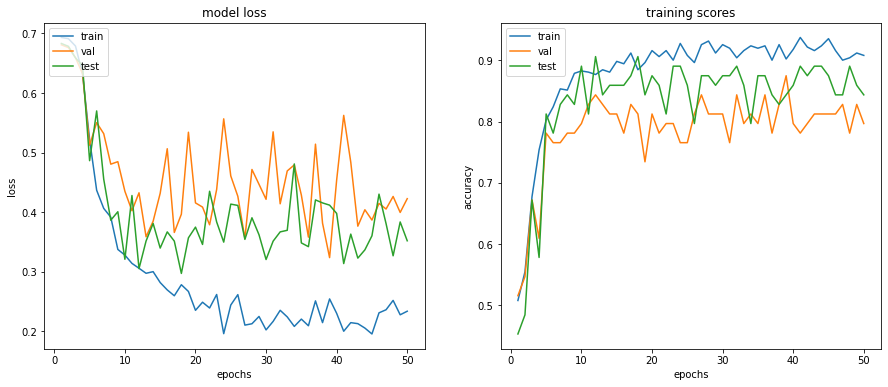

In [759]:
%matplotlib inline
path = "E:/cs8321/lab 1/multimodal/"
A = np.load(path+'CRNN_epoch_training_losses.npy')
B = np.load(path+'CRNN_epoch_training_scores.npy')
C = np.load(path+'CRNN_epoch_test_loss.npy')
D = np.load(path+'CRNN_epoch_test_score.npy')
E1 = np.load(path+'CRNN_epoch_test2_loss.npy')
F1 = np.load(path+'CRNN_epoch_test2_score.npy')
# plot
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(np.arange(1, epochs + 1), np.mean(A,1))  # train loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), C)         #  test loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), E1)         #  test loss (on epoch end)
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val','test'], loc="upper left")

# 2nd figure
plt.subplot(122)
plt.plot(np.arange(1, epochs + 1), np.mean(B,1))  # train accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), D)         #  test accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), F1)         #  test loss (on epoch end)
plt.title("training scores")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val','test'], loc="upper left")
title = "./fig_UCF101_ResNetCRNN.png"
plt.savefig(title, dpi=600)
#plt.close(fig)
plt.show()

In [760]:
#select the best model based on "early stopping"
patience = 10
waited_now = 0
min_ = 1000
for ep_,i in enumerate(C):
    if i > min_:
        waited_now += 1
        if waited_now == patience:
            test_epoch = ep_-9
            print(f"best model we choose is at epoch {ep_-9}, baseds on patien {patience} epochs")
            break
    else:
        waited_now = 0
        min_ = i

best model we choose is at epoch 13, baseds on patien 10 epochs


In [761]:
# The highest accuracy achieved:
print(f"The highest accuracy on the testing set achived is {F1[test_epoch-1]}%")

The highest accuracy on the testing set achived is 0.84375%


In [762]:
save_model_path = "E:/cs8321/lab 1/multimodal/"
cnn_encoder.load_state_dict(torch.load(os.path.join(save_model_path, 'cnn_encoder_epoch{}.pth'.format(test_epoch))))
rnn_decoder.load_state_dict(torch.load(os.path.join(save_model_path, 'rnn_decoder_epoch{}.pth'.format(test_epoch))))
audio_model.load_state_dict(torch.load(os.path.join(save_model_path, 'audio_model_epoch{}.pth'.format(test_epoch))))
multi_model.load_state_dict(torch.load(os.path.join(save_model_path, 'multi_model_epoch{}.pth'.format(test_epoch))))
optimizer.load_state_dict(torch.load(os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(test_epoch))))

In [763]:
loss_mul, acc_mul, y_pred_mul = test(my_models, device, optimizer, test_loader)


Test set (64 samples): Average loss: 0.3513, Accuracy: 84.38%



## MultiModal model control <a name = "MultiModalv2"></a>
Since the image-only model performed better than audio-only model. We want to investigate whether the improvement in performance of the multimodal model compares to image-only model is indeed from the inclusion of additional audio data.

We freeze the weight of the audio arm. This is to investigate whether the improvement we see in in the MultiModal model compared to video-only model is indeed from the additional audio input.


[Back to TOC](#TOC)

In [732]:
# set path
save_model_path = "E:/cs8321/lab 1/multimodal_control/"

In [733]:
# Create model
cnn_encoder = InceptV3Encoder(fc_hidden1=CNN_fc_hidden1, fc_hidden2=CNN_fc_hidden2, drop_p=dropout_p, CNN_embed_dim=CNN_embed_dim).to(device)
#cnn_encoder = MesoInception4_v().to(device)
rnn_decoder = DecoderRNN(CNN_embed_dim=CNN_embed_dim, h_RNN_layers=RNN_hidden_layers, h_RNN=RNN_hidden_nodes,
                         h_FC_dim=RNN_FC_dim, drop_p=dropout_p, num_classes=k).to(device)

audio_model = rnn(input_size, hidden_dim, k, num_layers, hidden_l1).to(device) 

multi_model =  MultiModal(k, RNN_FC_dim, hidden_l1, drop_p = dropout_p).to(device) 
my_models = [cnn_encoder,rnn_decoder,audio_model,multi_model]

In [734]:
l_params = list(cnn_encoder.parameters()) + list(rnn_decoder.parameters()) + list(multi_model.parameters())
for param in audio_model.parameters():
    param.requires_grad = False
    
optimizer = torch.optim.Adam(l_params, lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.4)
#optimizer = torch.optim.RMSprop(crnn_params, lr=learning_rate)

# record training process
epoch_train_losses = []
epoch_train_scores = []
epoch_test_losses = []
epoch_test_scores = []
epoch_test2_losses = []
epoch_test2_scores = []

In [735]:
preds=[]
for epoch in range(epochs):
    # train, test model
    train_losses, train_scores = train(log_interval, my_models, device, train_loader, optimizer, epoch)
    scheduler.step()
    epoch_test_loss, epoch_test_score = validation(my_models, device, optimizer, valid_loader)

    # Test
    epoch_test2_loss, epoch_test2_score, test_pred = test(my_models, device, optimizer, test_loader)
    preds.append(test_pred)

    # save results
    epoch_train_losses.append(train_losses)
    epoch_train_scores.append(train_scores)
    epoch_test_losses.append(epoch_test_loss)
    epoch_test_scores.append(epoch_test_score)
    epoch_test2_losses.append(epoch_test2_loss)
    epoch_test2_scores.append(epoch_test2_score)

    # save all train test results
    A = np.array(epoch_train_losses)
    B = np.array(epoch_train_scores)
    C = np.array(epoch_test_losses)
    D = np.array(epoch_test_scores)
    E1 = np.array(epoch_test2_losses)
    F1 = np.array(epoch_test2_scores) 
    np.save(save_model_path+'CRNN_epoch_training_losses.npy', A)
    np.save(save_model_path+'CRNN_epoch_training_scores.npy', B)
    np.save(save_model_path+'CRNN_epoch_test_loss.npy', C)
    np.save(save_model_path+'CRNN_epoch_test_score.npy', D)
    np.save(save_model_path+'CRNN_epoch_test2_loss.npy', E1)
    np.save(save_model_path+'CRNN_epoch_test2_score.npy', F1)
    np.save(save_model_path+f'y_pred_epoch{epoch+1}.npy', test_pred)

Training start at 1645831359.1251404
Train Epoch: 1 [32/516 (6%)]	Loss: 0.705965, Accu: 28.12%, time elapsed: 12.354707479476929
Train Epoch: 1 [64/516 (12%)]	Loss: 0.684618, Accu: 65.62%, time elapsed: 23.143860340118408
Train Epoch: 1 [96/516 (19%)]	Loss: 0.685870, Accu: 65.62%, time elapsed: 33.529887199401855
Train Epoch: 1 [128/516 (25%)]	Loss: 0.690371, Accu: 53.12%, time elapsed: 45.53413772583008
Train Epoch: 1 [160/516 (31%)]	Loss: 0.697864, Accu: 43.75%, time elapsed: 56.56923723220825
Train Epoch: 1 [192/516 (38%)]	Loss: 0.687588, Accu: 59.38%, time elapsed: 67.52784848213196
Train Epoch: 1 [224/516 (44%)]	Loss: 0.699839, Accu: 43.75%, time elapsed: 78.13113689422607
Train Epoch: 1 [256/516 (50%)]	Loss: 0.703522, Accu: 31.25%, time elapsed: 91.10825181007385
Train Epoch: 1 [288/516 (56%)]	Loss: 0.686989, Accu: 59.38%, time elapsed: 102.11204051971436
Train Epoch: 1 [320/516 (62%)]	Loss: 0.703939, Accu: 34.38%, time elapsed: 112.50258779525757
Train Epoch: 1 [352/516 (69%)]	L


validation set (64 samples): Average loss: 0.5986, Accuracy: 67.19%

Epoch 5 model saved!

Test set (64 samples): Average loss: 0.5821, Accuracy: 67.19%

Training start at 1645832484.432198
Train Epoch: 6 [32/516 (6%)]	Loss: 0.541549, Accu: 71.88%, time elapsed: 10.24568772315979
Train Epoch: 6 [64/516 (12%)]	Loss: 0.461542, Accu: 90.62%, time elapsed: 21.845085859298706
Train Epoch: 6 [96/516 (19%)]	Loss: 0.593314, Accu: 68.75%, time elapsed: 32.83317184448242
Train Epoch: 6 [128/516 (25%)]	Loss: 0.398690, Accu: 93.75%, time elapsed: 44.85949683189392
Train Epoch: 6 [160/516 (31%)]	Loss: 0.462102, Accu: 81.25%, time elapsed: 56.636706590652466
Train Epoch: 6 [192/516 (38%)]	Loss: 0.362360, Accu: 96.88%, time elapsed: 67.83933162689209
Train Epoch: 6 [224/516 (44%)]	Loss: 0.441760, Accu: 84.38%, time elapsed: 80.02601337432861
Train Epoch: 6 [256/516 (50%)]	Loss: 0.590755, Accu: 59.38%, time elapsed: 91.4173743724823
Train Epoch: 6 [288/516 (56%)]	Loss: 0.384504, Accu: 87.50%, time el

Train Epoch: 10 [480/516 (94%)]	Loss: 0.612206, Accu: 68.75%, time elapsed: 167.17583346366882
Train Epoch: 10 [512/516 (100%)]	Loss: 0.530430, Accu: 75.00%, time elapsed: 179.36056232452393

validation set (64 samples): Average loss: 0.4486, Accuracy: 78.12%

Epoch 10 model saved!

Test set (64 samples): Average loss: 0.4350, Accuracy: 81.25%

Training start at 1645833613.240126
Train Epoch: 11 [32/516 (6%)]	Loss: 0.391986, Accu: 84.38%, time elapsed: 11.658064603805542
Train Epoch: 11 [64/516 (12%)]	Loss: 0.270713, Accu: 90.62%, time elapsed: 23.25432538986206
Train Epoch: 11 [96/516 (19%)]	Loss: 0.423996, Accu: 81.25%, time elapsed: 33.86520218849182
Train Epoch: 11 [128/516 (25%)]	Loss: 0.515199, Accu: 78.12%, time elapsed: 44.63662648200989
Train Epoch: 11 [160/516 (31%)]	Loss: 0.213243, Accu: 90.62%, time elapsed: 57.036065340042114
Train Epoch: 11 [192/516 (38%)]	Loss: 0.364827, Accu: 78.12%, time elapsed: 68.83215856552124
Train Epoch: 11 [224/516 (44%)]	Loss: 0.282747, Accu: 9

Train Epoch: 15 [384/516 (75%)]	Loss: 0.253410, Accu: 87.50%, time elapsed: 136.2307116985321
Train Epoch: 15 [416/516 (81%)]	Loss: 0.294289, Accu: 87.50%, time elapsed: 148.01834154129028
Train Epoch: 15 [448/516 (88%)]	Loss: 0.215182, Accu: 93.75%, time elapsed: 157.80609798431396
Train Epoch: 15 [480/516 (94%)]	Loss: 0.206411, Accu: 90.62%, time elapsed: 168.43015217781067
Train Epoch: 15 [512/516 (100%)]	Loss: 0.486220, Accu: 78.12%, time elapsed: 180.19186401367188

validation set (64 samples): Average loss: 0.4415, Accuracy: 79.69%

Epoch 15 model saved!

Test set (64 samples): Average loss: 0.4022, Accuracy: 81.25%

Training start at 1645834740.458051
Train Epoch: 16 [32/516 (6%)]	Loss: 0.139580, Accu: 96.88%, time elapsed: 11.238780736923218
Train Epoch: 16 [64/516 (12%)]	Loss: 0.175302, Accu: 96.88%, time elapsed: 22.041306495666504
Train Epoch: 16 [96/516 (19%)]	Loss: 0.300722, Accu: 87.50%, time elapsed: 32.83937859535217
Train Epoch: 16 [128/516 (25%)]	Loss: 0.305022, Accu:

Train Epoch: 20 [288/516 (56%)]	Loss: 0.206979, Accu: 90.62%, time elapsed: 100.6060996055603
Train Epoch: 20 [320/516 (62%)]	Loss: 0.264043, Accu: 90.62%, time elapsed: 109.63175320625305
Train Epoch: 20 [352/516 (69%)]	Loss: 0.186555, Accu: 96.88%, time elapsed: 120.99661183357239
Train Epoch: 20 [384/516 (75%)]	Loss: 0.113505, Accu: 100.00%, time elapsed: 131.59297800064087
Train Epoch: 20 [416/516 (81%)]	Loss: 0.150568, Accu: 96.88%, time elapsed: 143.82189536094666
Train Epoch: 20 [448/516 (88%)]	Loss: 0.278359, Accu: 84.38%, time elapsed: 155.58281922340393
Train Epoch: 20 [480/516 (94%)]	Loss: 0.333726, Accu: 90.62%, time elapsed: 167.603413105011
Train Epoch: 20 [512/516 (100%)]	Loss: 0.305585, Accu: 90.62%, time elapsed: 180.39313888549805

validation set (64 samples): Average loss: 0.4853, Accuracy: 79.69%

Epoch 20 model saved!

Test set (64 samples): Average loss: 0.5335, Accuracy: 75.00%

Training start at 1645835865.0766408
Train Epoch: 21 [32/516 (6%)]	Loss: 0.140118, Ac

Train Epoch: 25 [192/516 (38%)]	Loss: 0.259264, Accu: 90.62%, time elapsed: 65.81705164909363
Train Epoch: 25 [224/516 (44%)]	Loss: 0.170607, Accu: 93.75%, time elapsed: 77.22366786003113
Train Epoch: 25 [256/516 (50%)]	Loss: 0.411687, Accu: 84.38%, time elapsed: 89.42966866493225
Train Epoch: 25 [288/516 (56%)]	Loss: 0.215033, Accu: 90.62%, time elapsed: 100.81952357292175
Train Epoch: 25 [320/516 (62%)]	Loss: 0.237146, Accu: 87.50%, time elapsed: 113.5997097492218
Train Epoch: 25 [352/516 (69%)]	Loss: 0.266265, Accu: 90.62%, time elapsed: 124.42027544975281
Train Epoch: 25 [384/516 (75%)]	Loss: 0.198742, Accu: 96.88%, time elapsed: 135.62271213531494
Train Epoch: 25 [416/516 (81%)]	Loss: 0.358740, Accu: 81.25%, time elapsed: 145.40533924102783
Train Epoch: 25 [448/516 (88%)]	Loss: 0.226756, Accu: 90.62%, time elapsed: 155.80784487724304
Train Epoch: 25 [480/516 (94%)]	Loss: 0.243628, Accu: 93.75%, time elapsed: 168.20689868927002
Train Epoch: 25 [512/516 (100%)]	Loss: 0.224324, Accu:

Train Epoch: 30 [96/516 (19%)]	Loss: 0.374736, Accu: 87.50%, time elapsed: 33.43410539627075
Train Epoch: 30 [128/516 (25%)]	Loss: 0.290589, Accu: 84.38%, time elapsed: 44.804285764694214
Train Epoch: 30 [160/516 (31%)]	Loss: 0.334351, Accu: 87.50%, time elapsed: 57.195048093795776
Train Epoch: 30 [192/516 (38%)]	Loss: 0.283105, Accu: 87.50%, time elapsed: 67.40214705467224
Train Epoch: 30 [224/516 (44%)]	Loss: 0.156532, Accu: 93.75%, time elapsed: 78.98596334457397
Train Epoch: 30 [256/516 (50%)]	Loss: 0.210402, Accu: 96.88%, time elapsed: 90.79611730575562
Train Epoch: 30 [288/516 (56%)]	Loss: 0.190009, Accu: 93.75%, time elapsed: 102.60402154922485
Train Epoch: 30 [320/516 (62%)]	Loss: 0.171409, Accu: 93.75%, time elapsed: 113.37722444534302
Train Epoch: 30 [352/516 (69%)]	Loss: 0.154701, Accu: 96.88%, time elapsed: 123.57189989089966
Train Epoch: 30 [384/516 (75%)]	Loss: 0.248084, Accu: 90.62%, time elapsed: 134.77188301086426
Train Epoch: 30 [416/516 (81%)]	Loss: 0.151620, Accu: 9


Test set (64 samples): Average loss: 0.4853, Accuracy: 81.25%

Training start at 1645839011.2046819
Train Epoch: 35 [32/516 (6%)]	Loss: 0.255994, Accu: 93.75%, time elapsed: 11.423047542572021
Train Epoch: 35 [64/516 (12%)]	Loss: 0.191081, Accu: 93.75%, time elapsed: 21.82542657852173
Train Epoch: 35 [96/516 (19%)]	Loss: 0.278646, Accu: 84.38%, time elapsed: 32.44725441932678
Train Epoch: 35 [128/516 (25%)]	Loss: 0.309970, Accu: 84.38%, time elapsed: 43.0104022026062
Train Epoch: 35 [160/516 (31%)]	Loss: 0.260594, Accu: 90.62%, time elapsed: 55.24155402183533
Train Epoch: 35 [192/516 (38%)]	Loss: 0.115901, Accu: 93.75%, time elapsed: 67.03690099716187
Train Epoch: 35 [224/516 (44%)]	Loss: 0.111298, Accu: 96.88%, time elapsed: 77.2221622467041
Train Epoch: 35 [256/516 (50%)]	Loss: 0.195306, Accu: 96.88%, time elapsed: 88.40601468086243
Train Epoch: 35 [288/516 (56%)]	Loss: 0.193161, Accu: 90.62%, time elapsed: 101.3931496143341
Train Epoch: 35 [320/516 (62%)]	Loss: 0.261866, Accu: 90.6

Train Epoch: 39 [480/516 (94%)]	Loss: 0.107227, Accu: 96.88%, time elapsed: 167.98865485191345
Train Epoch: 39 [512/516 (100%)]	Loss: 0.222901, Accu: 93.75%, time elapsed: 180.1762809753418

validation set (64 samples): Average loss: 0.4625, Accuracy: 78.12%

Epoch 39 model saved!

Test set (64 samples): Average loss: 0.5012, Accuracy: 76.56%

Training start at 1645840133.4168732
Train Epoch: 40 [32/516 (6%)]	Loss: 0.218493, Accu: 93.75%, time elapsed: 10.627478837966919
Train Epoch: 40 [64/516 (12%)]	Loss: 0.135203, Accu: 96.88%, time elapsed: 20.84719753265381
Train Epoch: 40 [96/516 (19%)]	Loss: 0.277260, Accu: 90.62%, time elapsed: 32.033039808273315
Train Epoch: 40 [128/516 (25%)]	Loss: 0.204218, Accu: 93.75%, time elapsed: 42.02495336532593
Train Epoch: 40 [160/516 (31%)]	Loss: 0.059873, Accu: 100.00%, time elapsed: 53.21731662750244
Train Epoch: 40 [192/516 (38%)]	Loss: 0.230515, Accu: 90.62%, time elapsed: 65.63373327255249
Train Epoch: 40 [224/516 (44%)]	Loss: 0.248862, Accu: 

Train Epoch: 44 [384/516 (75%)]	Loss: 0.164576, Accu: 96.88%, time elapsed: 135.37879848480225
Train Epoch: 44 [416/516 (81%)]	Loss: 0.105831, Accu: 96.88%, time elapsed: 145.78945469856262
Train Epoch: 44 [448/516 (88%)]	Loss: 0.280650, Accu: 87.50%, time elapsed: 159.55699038505554
Train Epoch: 44 [480/516 (94%)]	Loss: 0.277803, Accu: 84.38%, time elapsed: 170.80054831504822
Train Epoch: 44 [512/516 (100%)]	Loss: 0.107932, Accu: 100.00%, time elapsed: 183.78118133544922

validation set (64 samples): Average loss: 0.3816, Accuracy: 81.25%

Epoch 44 model saved!

Test set (64 samples): Average loss: 0.4692, Accuracy: 81.25%

Training start at 1645841266.214542
Train Epoch: 45 [32/516 (6%)]	Loss: 0.185149, Accu: 96.88%, time elapsed: 12.045807361602783
Train Epoch: 45 [64/516 (12%)]	Loss: 0.216698, Accu: 93.75%, time elapsed: 23.634396076202393
Train Epoch: 45 [96/516 (19%)]	Loss: 0.250402, Accu: 90.62%, time elapsed: 37.84231972694397
Train Epoch: 45 [128/516 (25%)]	Loss: 0.147558, Acc

Train Epoch: 49 [288/516 (56%)]	Loss: 0.457836, Accu: 84.38%, time elapsed: 101.21370840072632
Train Epoch: 49 [320/516 (62%)]	Loss: 0.125668, Accu: 96.88%, time elapsed: 111.20268249511719
Train Epoch: 49 [352/516 (69%)]	Loss: 0.181561, Accu: 93.75%, time elapsed: 122.60259056091309
Train Epoch: 49 [384/516 (75%)]	Loss: 0.131167, Accu: 96.88%, time elapsed: 134.0012984275818
Train Epoch: 49 [416/516 (81%)]	Loss: 0.169275, Accu: 96.88%, time elapsed: 145.00165605545044
Train Epoch: 49 [448/516 (88%)]	Loss: 0.219284, Accu: 93.75%, time elapsed: 157.4240424633026
Train Epoch: 49 [480/516 (94%)]	Loss: 0.265924, Accu: 90.62%, time elapsed: 169.18618083000183
Train Epoch: 49 [512/516 (100%)]	Loss: 0.337015, Accu: 84.38%, time elapsed: 180.3921275138855

validation set (64 samples): Average loss: 0.3868, Accuracy: 82.81%

Epoch 49 model saved!

Test set (64 samples): Average loss: 0.3695, Accuracy: 87.50%

Training start at 1645842396.4444797
Train Epoch: 50 [32/516 (6%)]	Loss: 0.249292, Acc

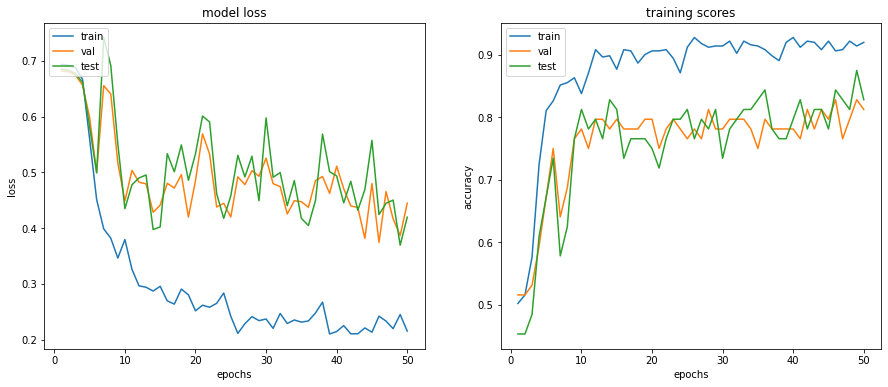

In [736]:
%matplotlib inline
path = "E:/cs8321/lab 1/multimodal_control/"
A = np.load(path+'CRNN_epoch_training_losses.npy')
B = np.load(path+'CRNN_epoch_training_scores.npy')
C = np.load(path+'CRNN_epoch_test_loss.npy')
D = np.load(path+'CRNN_epoch_test_score.npy')
E1 = np.load(path+'CRNN_epoch_test2_loss.npy')
F1 = np.load(path+'CRNN_epoch_test2_score.npy')
# plot
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(np.arange(1, epochs + 1), np.mean(A,1))  # train loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), C)         #  test loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), E1)         #  test loss (on epoch end)
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val','test'], loc="upper left")

# 2nd figure
plt.subplot(122)
plt.plot(np.arange(1, epochs + 1), np.mean(B,1))  # train accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), D)         #  test accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), F1)         #  test loss (on epoch end)
plt.title("training scores")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val','test'], loc="upper left")
title = "./fig_UCF101_ResNetCRNN.png"
plt.savefig(title, dpi=600)
#plt.close(fig)
plt.show()

In [737]:
#select the best model based on "early stopping"
patience = 10
waited_now = 0
min_ = 1000
for ep_,i in enumerate(C):
    if i > min_:
        waited_now += 1
        if waited_now == patience:
            test_epoch = ep_-9
            print(f"best model we choose is at epoch {ep_-9}, baseds on patien {patience} epochs")
            break
    else:
        waited_now = 0
        min_ = i

best model we choose is at epoch 19, baseds on patien 10 epochs


In [738]:
# The highest accuracy achieved:
print(f"The highest accuracy on the testing set achived is {F1[test_epoch-1]}%")

The highest accuracy on the testing set achived is 0.765625%


In [740]:
cnn_encoder.load_state_dict(torch.load(os.path.join(save_model_path, 'cnn_encoder_epoch{}.pth'.format(test_epoch))))
rnn_decoder.load_state_dict(torch.load(os.path.join(save_model_path, 'rnn_decoder_epoch{}.pth'.format(test_epoch))))
audio_model.load_state_dict(torch.load(os.path.join(save_model_path, 'audio_model_epoch{}.pth'.format(test_epoch))))
multi_model.load_state_dict(torch.load(os.path.join(save_model_path, 'multi_model_epoch{}.pth'.format(test_epoch))))
optimizer.load_state_dict(torch.load(os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(test_epoch))))

loss_mul, acc_mul, y_pred_mul_c = test(my_models, device, optimizer, test_loader)


Test set (64 samples): Average loss: 0.4860, Accuracy: 76.56%



## latent space<a name="Exceptional"></a>

[Back to TOC](#TOC)

In [972]:
hidden_l1= 126
batch_size = 8
save_model_path = "E:/cs8321/lab 1/shared/"
train_loader = data.DataLoader(train_concated, batch_size=batch_size, pin_memory=True, drop_last=True, shuffle = True)
valid_loader = data.DataLoader(val_concated, batch_size=batch_size, pin_memory=True, drop_last=True)
test_loader = data.DataLoader(test_concated, batch_size=batch_size, pin_memory=True, drop_last=True)

In [973]:
def train(log_interval, model, device, train_loader,optimizer, epoch):
    # set model as training mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.train()
    rnn_decoder.train()
    audio_model.train()
    multi_model.train()

    losses = []
    scores = []
    N_count = 0   # counting total trained sample in one epoch
    start_time = time.time()
    print("Training start at {}".format(start_time))
    for batch_idx, concat_data in enumerate(train_loader):
        X, y = concat_data[0]
        data, target = concat_data[1]
        # distribute data to device
        X, y = X.to(device), y.to(device).view(-1, )
        data = data.to(device=device)
        target = target.to(device=device)
       # target = target.to(device=device)

        N_count += X.size(0)

        optimizer.zero_grad()
        if (batch_idx %2 == 0):
            output = multi_model(rnn_decoder(cnn_encoder(X)))
        else:
            output = multi_model(audio_model(data))

        loss = F.cross_entropy(output, y)
        losses.append(loss.item())

        tmp = torch.max(output, 1)
        # to compute accuracy
        y_pred = torch.max(output, 1)[1]  # y_pred != output
        step_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
        scores.append(step_score)         # computed on CPU

        loss.backward()
        optimizer.step()

        # show information
        end_time = time.time()
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accu: {:.2f}%, time elapsed: {}'.format(
            epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader),
            loss.item(), 100 * step_score, end_time-start_time))

    return losses, scores

In [974]:
def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.eval()
    rnn_decoder.eval()  
    audio_model.eval()
    multi_model.eval()
    test_loss1 = 0
    test_loss2 = 0
    all_y = []
    all_y_pred1 = []
    all_y_pred2 = []
    with torch.no_grad():
        for concat_data in test_loader:
            X, y = concat_data[0]
            data, target = concat_data[1]            
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )
            data = data.to(device=device)
            target = target.to(device=device)

            output1 = multi_model(rnn_decoder(cnn_encoder(X))) 
            output2 = multi_model(audio_model(data)) 
            
            loss = F.cross_entropy(output1, y, reduction='sum')
            test_loss1 += loss.item()                 # sum up batch loss
            y_pred1 = output1.max(1, keepdim=True)[1]  # (y_pred != output1) get the index of the max log-probability

            loss = F.cross_entropy(output2, y, reduction='sum')
            test_loss2 += loss.item()                 # sum up batch loss
            y_pred2 = output2.max(1, keepdim=True)[1]  # (y_pred != output2) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred1.extend(y_pred1)
            all_y_pred2.extend(y_pred2)

    test_loss1 /= len(test_loader.dataset)
    test_loss2 /= len(test_loader.dataset)
    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred1 = torch.stack(all_y_pred1, dim=0)
    all_y_pred2 = torch.stack(all_y_pred2, dim=0)
    test_score1 = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred1.cpu().data.squeeze().numpy())
    test_score2 = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred2.cpu().data.squeeze().numpy())
    # show information
    print('\nvalidation set ({:d} samples): Average loss1: {:.4f}, Accuracy1: {:.2f}%\n'.format(len(all_y), test_loss1, 100* test_score1))
    print('\nvalidation set ({:d} samples): Average loss2: {:.4f}, Accuracy2: {:.2f}%\n'.format(len(all_y), test_loss2, 100* test_score2))
    # save Pytorch models of best record
    torch.save(cnn_encoder.state_dict(), os.path.join(save_model_path, 'cnn_encoder_epoch{}.pth'.format(epoch + 1)))  # save spatial_encoder
    torch.save(rnn_decoder.state_dict(), os.path.join(save_model_path, 'rnn_decoder_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(audio_model.state_dict(), os.path.join(save_model_path, 'audio_model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(multi_model.state_dict(), os.path.join(save_model_path, 'multi_model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
    print("Epoch {} model saved!".format(epoch + 1))

    return test_loss1, test_score1, test_loss2, test_score2


def test(model, device, optimizer, test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.eval()
    rnn_decoder.eval()  
    audio_model.eval()
    multi_model.eval()
    test_loss1 = 0
    test_loss2 = 0
    all_y = []
    all_y_pred1 = []
    all_y_pred2 = []
    with torch.no_grad():
        for concat_data in test_loader:
            X, y = concat_data[0]
            data, target = concat_data[1]            
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )
            data = data.to(device=device)
            target = target.to(device=device)

            output1 = multi_model(rnn_decoder(cnn_encoder(X))) 
            output2 = multi_model(audio_model(data)) 
            
            loss = F.cross_entropy(output1, y, reduction='sum')
            test_loss1 += loss.item()                 # sum up batch loss
            y_pred1 = output1.max(1, keepdim=True)[1]  # (y_pred != output1) get the index of the max log-probability

            loss = F.cross_entropy(output2, y, reduction='sum')
            test_loss2 += loss.item()                 # sum up batch loss
            y_pred2 = output2.max(1, keepdim=True)[1]  # (y_pred != output2) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred1.extend(y_pred1)
            all_y_pred2.extend(y_pred2)

    test_loss1 /= len(test_loader.dataset)
    test_loss2 /= len(test_loader.dataset)
    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred1 = torch.stack(all_y_pred1, dim=0)
    all_y_pred2 = torch.stack(all_y_pred2, dim=0)
    test_score1 = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred1.cpu().data.squeeze().numpy())
    test_score2 = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred2.cpu().data.squeeze().numpy())

    # show information
    print('\ntest set ({:d} samples): Average loss1: {:.4f}, Accuracy1: {:.2f}%\n'.format(len(all_y), test_loss1, 100* test_score1))
    print('\ntest set ({:d} samples): Average loss2: {:.4f}, Accuracy2: {:.2f}%\n'.format(len(all_y), test_loss2, 100* test_score2))
    return test_loss1, test_score1, all_y_pred1.to('cpu').numpy().reshape(-1),test_loss2, test_score2, all_y_pred2.to('cpu').numpy().reshape(-1)

In [975]:
class SharedLatentSpace(nn.Module):
    def __init__(self, num_classes, h_FC_dim, hidden_l1, drop_p=0.3):
        super(SharedLatentSpace, self).__init__()
        self.num_classes = num_classes
        #self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, bidirectional=True,dropout=dropout, batch_first=True)#
        self.drop_p = drop_p
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_l1, self.num_classes)

    def forward(self, x):
        #x = x.long()
        # FC layers
        x = F.relu(x)
        x = F.dropout(x, p=self.drop_p, training = self.training)
        x = self.fc2(x)

        return x

In [976]:
# Create model
cnn_encoder = InceptV3Encoder(fc_hidden1=CNN_fc_hidden1, fc_hidden2=CNN_fc_hidden2, drop_p=dropout_p, CNN_embed_dim=CNN_embed_dim).to(device)
#cnn_encoder = MesoInception4_v().to(device)
rnn_decoder = DecoderRNN(CNN_embed_dim=CNN_embed_dim, h_RNN_layers=RNN_hidden_layers, h_RNN=RNN_hidden_nodes,
                         h_FC_dim=RNN_FC_dim, drop_p=dropout_p, num_classes=k).to(device)

audio_model = rnn(input_size, hidden_dim, k, num_layers, hidden_l1).to(device) 

shared =  SharedLatentSpace(k, RNN_FC_dim, hidden_l1, drop_p = dropout_p).to(device) 
my_models = [cnn_encoder,rnn_decoder,audio_model,shared]


In [979]:
l_params = list(cnn_encoder.parameters()) + list(rnn_decoder.parameters()) +\
            list(audio_model.parameters())+list(shared.parameters())

optimizer = torch.optim.Adam(l_params, lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.4)
#optimizer = torch.optim.RMSprop(crnn_params, lr=learning_rate)
# record training process
epoch_train_losses = []
epoch_train_scores = []
epoch_test_losses1 = []
epoch_test_scores1 = []
epoch_test2_losses1 = []
epoch_test2_scores1 = []
epoch_test_losses2 = []
epoch_test_scores2 = []
epoch_test2_losses2 = []
epoch_test2_scores2 = []

In [981]:
import torch.nn.functional as F

for epoch in range(epochs):
    # train, test model
    train_losses, train_scores = train(log_interval, my_models, device, train_loader, optimizer, epoch)
    scheduler.step()
    epoch_test_loss1, epoch_test_score1,epoch_test_loss2, epoch_test_score2 = validation(my_models, device, optimizer, valid_loader)

    # Test
    epoch_test2_loss1, epoch_test2_score1, test_pred1,epoch_test2_loss2, epoch_test2_score2, test_pred2 = test(my_models, device, optimizer, test_loader)
    

    # save results
    epoch_train_losses.append(train_losses)
    epoch_train_scores.append(train_scores)
    epoch_test_losses1.append(epoch_test_loss1)
    epoch_test_scores1.append(epoch_test_score1)
    epoch_test_losses2.append(epoch_test_loss2)
    epoch_test_scores2.append(epoch_test_score2)
    epoch_test2_losses1.append(epoch_test2_loss1)
    epoch_test2_scores1.append(epoch_test2_score1)
    epoch_test2_losses2.append(epoch_test2_loss2)
    epoch_test2_scores2.append(epoch_test2_score2)
    # save all train test results
    A = np.array(epoch_train_losses)
    B = np.array(epoch_train_scores)
    C = np.array(epoch_test_losses1)
    D = np.array(epoch_test_scores1)
    E1 = np.array(epoch_test2_losses1)
    F1 = np.array(epoch_test2_scores1) 
    np.save(save_model_path+'CRNN_epoch_training_losses.npy', A)
    np.save(save_model_path+'CRNN_epoch_training_scores.npy', B)
    np.save(save_model_path+'CRNN_epoch_test_loss.npy', C)
    np.save(save_model_path+'CRNN_epoch_test_score.npy', D)
    np.save(save_model_path+'CRNN_epoch_test2_loss.npy', E1)
    np.save(save_model_path+'CRNN_epoch_test2_score.npy', F1)
    np.save(save_model_path+f'y_pred_epoch{epoch+1}.npy', test_pred1)


Training start at 1645852157.8894792
Train Epoch: 1 [8/516 (2%)]	Loss: 0.722755, Accu: 12.50%, time elapsed: 3.3204097747802734
Train Epoch: 1 [16/516 (3%)]	Loss: 0.700390, Accu: 25.00%, time elapsed: 6.789835691452026
Train Epoch: 1 [24/516 (5%)]	Loss: 0.723468, Accu: 12.50%, time elapsed: 9.891541957855225
Train Epoch: 1 [32/516 (6%)]	Loss: 0.698171, Accu: 37.50%, time elapsed: 13.018758296966553
Train Epoch: 1 [40/516 (8%)]	Loss: 0.686889, Accu: 62.50%, time elapsed: 17.090667724609375
Train Epoch: 1 [48/516 (9%)]	Loss: 0.694638, Accu: 50.00%, time elapsed: 20.121063709259033
Train Epoch: 1 [56/516 (11%)]	Loss: 0.680376, Accu: 62.50%, time elapsed: 23.510611057281494
Train Epoch: 1 [64/516 (12%)]	Loss: 0.687180, Accu: 75.00%, time elapsed: 26.62538480758667
Train Epoch: 1 [72/516 (14%)]	Loss: 0.728042, Accu: 12.50%, time elapsed: 30.50672936439514
Train Epoch: 1 [80/516 (16%)]	Loss: 0.700130, Accu: 50.00%, time elapsed: 33.81387424468994
Train Epoch: 1 [88/516 (17%)]	Loss: 0.683258,

Train Epoch: 2 [168/516 (33%)]	Loss: 0.687397, Accu: 62.50%, time elapsed: 66.24667811393738
Train Epoch: 2 [176/516 (34%)]	Loss: 0.683699, Accu: 62.50%, time elapsed: 69.21475982666016
Train Epoch: 2 [184/516 (36%)]	Loss: 0.663673, Accu: 62.50%, time elapsed: 72.45363211631775
Train Epoch: 2 [192/516 (38%)]	Loss: 0.697091, Accu: 37.50%, time elapsed: 75.45668625831604
Train Epoch: 2 [200/516 (39%)]	Loss: 0.628502, Accu: 75.00%, time elapsed: 78.45385265350342
Train Epoch: 2 [208/516 (41%)]	Loss: 0.690218, Accu: 62.50%, time elapsed: 81.19764590263367
Train Epoch: 2 [216/516 (42%)]	Loss: 0.601815, Accu: 87.50%, time elapsed: 85.04689168930054
Train Epoch: 2 [224/516 (44%)]	Loss: 0.691879, Accu: 37.50%, time elapsed: 87.46675753593445
Train Epoch: 2 [232/516 (45%)]	Loss: 0.601073, Accu: 87.50%, time elapsed: 90.83951425552368
Train Epoch: 2 [240/516 (47%)]	Loss: 0.696782, Accu: 37.50%, time elapsed: 95.217276096344
Train Epoch: 2 [248/516 (48%)]	Loss: 0.563075, Accu: 87.50%, time elapse

Train Epoch: 3 [336/516 (66%)]	Loss: 0.682014, Accu: 75.00%, time elapsed: 139.50491976737976
Train Epoch: 3 [344/516 (67%)]	Loss: 0.625528, Accu: 62.50%, time elapsed: 143.5843150615692
Train Epoch: 3 [352/516 (69%)]	Loss: 0.694683, Accu: 37.50%, time elapsed: 146.76637029647827
Train Epoch: 3 [360/516 (70%)]	Loss: 0.668695, Accu: 62.50%, time elapsed: 149.78682398796082
Train Epoch: 3 [368/516 (72%)]	Loss: 0.694061, Accu: 50.00%, time elapsed: 153.0112955570221
Train Epoch: 3 [376/516 (73%)]	Loss: 0.547669, Accu: 75.00%, time elapsed: 157.16094946861267
Train Epoch: 3 [384/516 (75%)]	Loss: 0.692053, Accu: 50.00%, time elapsed: 159.84829592704773
Train Epoch: 3 [392/516 (77%)]	Loss: 0.501916, Accu: 75.00%, time elapsed: 163.78279852867126
Train Epoch: 3 [400/516 (78%)]	Loss: 0.693424, Accu: 50.00%, time elapsed: 166.24517107009888
Train Epoch: 3 [408/516 (80%)]	Loss: 0.442698, Accu: 87.50%, time elapsed: 169.98117399215698
Train Epoch: 3 [416/516 (81%)]	Loss: 0.696933, Accu: 50.00%, t

Train Epoch: 4 [504/516 (98%)]	Loss: 0.572931, Accu: 75.00%, time elapsed: 181.63200521469116
Train Epoch: 4 [512/516 (100%)]	Loss: 0.693797, Accu: 37.50%, time elapsed: 184.35722541809082

validation set (64 samples): Average loss1: 0.7367, Accuracy1: 57.81%


validation set (64 samples): Average loss2: 0.6818, Accuracy2: 53.12%

Epoch 4 model saved!

validation set (64 samples): Average loss1: 0.7833, Accuracy1: 56.25%


validation set (64 samples): Average loss2: 0.6805, Accuracy2: 62.50%

Training start at 1645853198.215625
Train Epoch: 5 [8/516 (2%)]	Loss: 0.665865, Accu: 75.00%, time elapsed: 2.880977153778076
Train Epoch: 5 [16/516 (3%)]	Loss: 0.690940, Accu: 50.00%, time elapsed: 5.49399471282959
Train Epoch: 5 [24/516 (5%)]	Loss: 0.735248, Accu: 50.00%, time elapsed: 9.124289989471436
Train Epoch: 5 [32/516 (6%)]	Loss: 0.692578, Accu: 62.50%, time elapsed: 11.05586862564087
Train Epoch: 5 [40/516 (8%)]	Loss: 0.530625, Accu: 75.00%, time elapsed: 14.28820276260376
Train Epoch: 

Train Epoch: 6 [128/516 (25%)]	Loss: 0.665620, Accu: 87.50%, time elapsed: 46.64722728729248
Train Epoch: 6 [136/516 (27%)]	Loss: 0.464130, Accu: 75.00%, time elapsed: 49.07283139228821
Train Epoch: 6 [144/516 (28%)]	Loss: 0.681055, Accu: 62.50%, time elapsed: 52.260825634002686
Train Epoch: 6 [152/516 (30%)]	Loss: 0.555941, Accu: 62.50%, time elapsed: 55.27955865859985
Train Epoch: 6 [160/516 (31%)]	Loss: 0.689909, Accu: 50.00%, time elapsed: 58.68467354774475
Train Epoch: 6 [168/516 (33%)]	Loss: 0.501751, Accu: 75.00%, time elapsed: 61.917827129364014
Train Epoch: 6 [176/516 (34%)]	Loss: 0.681617, Accu: 62.50%, time elapsed: 63.859501123428345
Train Epoch: 6 [184/516 (36%)]	Loss: 0.453520, Accu: 87.50%, time elapsed: 66.45973920822144
Train Epoch: 6 [192/516 (38%)]	Loss: 0.690710, Accu: 50.00%, time elapsed: 68.88797664642334
Train Epoch: 6 [200/516 (39%)]	Loss: 0.503288, Accu: 75.00%, time elapsed: 72.05730509757996
Train Epoch: 6 [208/516 (41%)]	Loss: 0.685562, Accu: 62.50%, time e

Train Epoch: 7 [296/516 (58%)]	Loss: 0.705173, Accu: 50.00%, time elapsed: 104.45237112045288
Train Epoch: 7 [304/516 (59%)]	Loss: 0.700915, Accu: 25.00%, time elapsed: 106.92875266075134
Train Epoch: 7 [312/516 (61%)]	Loss: 0.227637, Accu: 100.00%, time elapsed: 109.67962169647217
Train Epoch: 7 [320/516 (62%)]	Loss: 0.682130, Accu: 62.50%, time elapsed: 112.21385502815247
Train Epoch: 7 [328/516 (64%)]	Loss: 0.571529, Accu: 75.00%, time elapsed: 115.30167698860168
Train Epoch: 7 [336/516 (66%)]	Loss: 0.681166, Accu: 75.00%, time elapsed: 117.7730860710144
Train Epoch: 7 [344/516 (67%)]	Loss: 0.712600, Accu: 62.50%, time elapsed: 120.24912619590759
Train Epoch: 7 [352/516 (69%)]	Loss: 0.692425, Accu: 37.50%, time elapsed: 123.98319578170776
Train Epoch: 7 [360/516 (70%)]	Loss: 0.721767, Accu: 62.50%, time elapsed: 126.6732566356659
Train Epoch: 7 [368/516 (72%)]	Loss: 0.701745, Accu: 12.50%, time elapsed: 129.53262162208557
Train Epoch: 7 [376/516 (73%)]	Loss: 0.277189, Accu: 87.50%, 

Train Epoch: 8 [464/516 (91%)]	Loss: 0.687130, Accu: 50.00%, time elapsed: 166.54065537452698
Train Epoch: 8 [472/516 (92%)]	Loss: 0.395163, Accu: 87.50%, time elapsed: 169.6229932308197
Train Epoch: 8 [480/516 (94%)]	Loss: 0.696982, Accu: 50.00%, time elapsed: 172.23440551757812
Train Epoch: 8 [488/516 (95%)]	Loss: 0.379916, Accu: 75.00%, time elapsed: 175.2008011341095
Train Epoch: 8 [496/516 (97%)]	Loss: 0.692775, Accu: 37.50%, time elapsed: 177.53056859970093
Train Epoch: 8 [504/516 (98%)]	Loss: 0.492422, Accu: 75.00%, time elapsed: 180.81739473342896
Train Epoch: 8 [512/516 (100%)]	Loss: 0.681724, Accu: 75.00%, time elapsed: 182.95863509178162

validation set (64 samples): Average loss1: 0.7868, Accuracy1: 60.94%


validation set (64 samples): Average loss2: 0.6809, Accuracy2: 50.00%

Epoch 8 model saved!

validation set (64 samples): Average loss1: 0.9357, Accuracy1: 53.12%


validation set (64 samples): Average loss2: 0.6772, Accuracy2: 64.06%

Training start at 1645854122.24516

Train Epoch: 10 [88/516 (17%)]	Loss: 0.347662, Accu: 87.50%, time elapsed: 32.30460572242737
Train Epoch: 10 [96/516 (19%)]	Loss: 0.671371, Accu: 50.00%, time elapsed: 34.33020377159119
Train Epoch: 10 [104/516 (20%)]	Loss: 0.414316, Accu: 87.50%, time elapsed: 36.9094078540802
Train Epoch: 10 [112/516 (22%)]	Loss: 0.663639, Accu: 75.00%, time elapsed: 40.281020164489746
Train Epoch: 10 [120/516 (23%)]	Loss: 0.419164, Accu: 75.00%, time elapsed: 43.12166976928711
Train Epoch: 10 [128/516 (25%)]	Loss: 0.689005, Accu: 62.50%, time elapsed: 45.90381908416748
Train Epoch: 10 [136/516 (27%)]	Loss: 0.563165, Accu: 75.00%, time elapsed: 49.5185444355011
Train Epoch: 10 [144/516 (28%)]	Loss: 0.697931, Accu: 50.00%, time elapsed: 52.720011949539185
Train Epoch: 10 [152/516 (30%)]	Loss: 0.275453, Accu: 87.50%, time elapsed: 55.5159273147583
Train Epoch: 10 [160/516 (31%)]	Loss: 0.682238, Accu: 37.50%, time elapsed: 57.78783416748047
Train Epoch: 10 [168/516 (33%)]	Loss: 0.224177, Accu: 87.50%, t

Train Epoch: 11 [248/516 (48%)]	Loss: 0.508128, Accu: 87.50%, time elapsed: 89.54871106147766
Train Epoch: 11 [256/516 (50%)]	Loss: 0.683730, Accu: 37.50%, time elapsed: 92.12371921539307
Train Epoch: 11 [264/516 (52%)]	Loss: 0.323848, Accu: 87.50%, time elapsed: 95.48429799079895
Train Epoch: 11 [272/516 (53%)]	Loss: 0.711919, Accu: 25.00%, time elapsed: 97.68641996383667
Train Epoch: 11 [280/516 (55%)]	Loss: 0.510344, Accu: 75.00%, time elapsed: 100.26504158973694
Train Epoch: 11 [288/516 (56%)]	Loss: 0.681098, Accu: 75.00%, time elapsed: 102.15798735618591
Train Epoch: 11 [296/516 (58%)]	Loss: 0.351621, Accu: 87.50%, time elapsed: 105.28697371482849
Train Epoch: 11 [304/516 (59%)]	Loss: 0.688718, Accu: 50.00%, time elapsed: 108.56257224082947
Train Epoch: 11 [312/516 (61%)]	Loss: 0.216956, Accu: 100.00%, time elapsed: 112.30299496650696
Train Epoch: 11 [320/516 (62%)]	Loss: 0.666629, Accu: 62.50%, time elapsed: 114.60936617851257
Train Epoch: 11 [328/516 (64%)]	Loss: 0.238826, Accu:

Train Epoch: 12 [408/516 (80%)]	Loss: 0.402799, Accu: 87.50%, time elapsed: 145.84960317611694
Train Epoch: 12 [416/516 (81%)]	Loss: 0.690989, Accu: 87.50%, time elapsed: 148.93066215515137
Train Epoch: 12 [424/516 (83%)]	Loss: 0.283076, Accu: 87.50%, time elapsed: 152.26659870147705
Train Epoch: 12 [432/516 (84%)]	Loss: 0.689756, Accu: 50.00%, time elapsed: 155.1778962612152
Train Epoch: 12 [440/516 (86%)]	Loss: 0.198165, Accu: 100.00%, time elapsed: 158.24981904029846
Train Epoch: 12 [448/516 (88%)]	Loss: 0.661803, Accu: 87.50%, time elapsed: 161.3385283946991
Train Epoch: 12 [456/516 (89%)]	Loss: 0.216443, Accu: 87.50%, time elapsed: 164.85417771339417
Train Epoch: 12 [464/516 (91%)]	Loss: 0.655249, Accu: 75.00%, time elapsed: 167.40436267852783
Train Epoch: 12 [472/516 (92%)]	Loss: 0.955449, Accu: 62.50%, time elapsed: 170.46375179290771
Train Epoch: 12 [480/516 (94%)]	Loss: 0.666923, Accu: 87.50%, time elapsed: 173.42882466316223
Train Epoch: 12 [488/516 (95%)]	Loss: 0.202670, Acc

Train Epoch: 14 [24/516 (5%)]	Loss: 0.109107, Accu: 100.00%, time elapsed: 9.076732158660889
Train Epoch: 14 [32/516 (6%)]	Loss: 0.702278, Accu: 37.50%, time elapsed: 11.450381994247437
Train Epoch: 14 [40/516 (8%)]	Loss: 0.144610, Accu: 100.00%, time elapsed: 14.864994525909424
Train Epoch: 14 [48/516 (9%)]	Loss: 0.683801, Accu: 62.50%, time elapsed: 17.914087295532227
Train Epoch: 14 [56/516 (11%)]	Loss: 0.355093, Accu: 87.50%, time elapsed: 21.478245735168457
Train Epoch: 14 [64/516 (12%)]	Loss: 0.669835, Accu: 50.00%, time elapsed: 24.531015634536743
Train Epoch: 14 [72/516 (14%)]	Loss: 0.553106, Accu: 75.00%, time elapsed: 27.87153697013855
Train Epoch: 14 [80/516 (16%)]	Loss: 0.674365, Accu: 75.00%, time elapsed: 31.100889921188354
Train Epoch: 14 [88/516 (17%)]	Loss: 0.652825, Accu: 62.50%, time elapsed: 34.47271394729614
Train Epoch: 14 [96/516 (19%)]	Loss: 0.679266, Accu: 62.50%, time elapsed: 37.72003936767578
Train Epoch: 14 [104/516 (20%)]	Loss: 0.416132, Accu: 87.50%, time

Train Epoch: 15 [184/516 (36%)]	Loss: 0.407270, Accu: 87.50%, time elapsed: 66.07899117469788
Train Epoch: 15 [192/516 (38%)]	Loss: 0.678336, Accu: 62.50%, time elapsed: 68.00421833992004
Train Epoch: 15 [200/516 (39%)]	Loss: 0.378986, Accu: 87.50%, time elapsed: 71.46208310127258
Train Epoch: 15 [208/516 (41%)]	Loss: 0.658843, Accu: 62.50%, time elapsed: 74.5125024318695
Train Epoch: 15 [216/516 (42%)]	Loss: 0.374113, Accu: 87.50%, time elapsed: 78.4743824005127
Train Epoch: 15 [224/516 (44%)]	Loss: 0.694557, Accu: 25.00%, time elapsed: 81.51679515838623
Train Epoch: 15 [232/516 (45%)]	Loss: 0.432526, Accu: 75.00%, time elapsed: 84.66896986961365
Train Epoch: 15 [240/516 (47%)]	Loss: 0.690048, Accu: 75.00%, time elapsed: 87.3564031124115
Train Epoch: 15 [248/516 (48%)]	Loss: 0.262406, Accu: 87.50%, time elapsed: 90.22346663475037
Train Epoch: 15 [256/516 (50%)]	Loss: 0.674045, Accu: 75.00%, time elapsed: 93.2504301071167
Train Epoch: 15 [264/516 (52%)]	Loss: 0.281988, Accu: 75.00%, ti

Train Epoch: 16 [344/516 (67%)]	Loss: 0.504935, Accu: 75.00%, time elapsed: 127.441241979599
Train Epoch: 16 [352/516 (69%)]	Loss: 0.686928, Accu: 50.00%, time elapsed: 129.70627856254578
Train Epoch: 16 [360/516 (70%)]	Loss: 0.425357, Accu: 75.00%, time elapsed: 132.43854355812073
Train Epoch: 16 [368/516 (72%)]	Loss: 0.632768, Accu: 75.00%, time elapsed: 134.9388165473938
Train Epoch: 16 [376/516 (73%)]	Loss: 0.514437, Accu: 87.50%, time elapsed: 138.2104561328888
Train Epoch: 16 [384/516 (75%)]	Loss: 0.697072, Accu: 62.50%, time elapsed: 140.1093509197235
Train Epoch: 16 [392/516 (77%)]	Loss: 0.424555, Accu: 62.50%, time elapsed: 143.41853713989258
Train Epoch: 16 [400/516 (78%)]	Loss: 0.685068, Accu: 25.00%, time elapsed: 145.438134431839
Train Epoch: 16 [408/516 (80%)]	Loss: 0.468400, Accu: 75.00%, time elapsed: 148.6460998058319
Train Epoch: 16 [416/516 (81%)]	Loss: 0.674599, Accu: 75.00%, time elapsed: 151.47678518295288
Train Epoch: 16 [424/516 (83%)]	Loss: 0.419407, Accu: 87.5

Train Epoch: 17 [504/516 (98%)]	Loss: 0.210927, Accu: 100.00%, time elapsed: 184.44412541389465
Train Epoch: 17 [512/516 (100%)]	Loss: 0.646514, Accu: 75.00%, time elapsed: 186.38692808151245

validation set (64 samples): Average loss1: 0.4281, Accuracy1: 81.25%


validation set (64 samples): Average loss2: 0.6730, Accuracy2: 54.69%

Epoch 17 model saved!

validation set (64 samples): Average loss1: 0.5257, Accuracy1: 76.56%


validation set (64 samples): Average loss2: 0.6675, Accuracy2: 57.81%

Training start at 1645856226.578391
Train Epoch: 18 [8/516 (2%)]	Loss: 0.643514, Accu: 75.00%, time elapsed: 3.296008348464966
Train Epoch: 18 [16/516 (3%)]	Loss: 0.636699, Accu: 87.50%, time elapsed: 5.713185548782349
Train Epoch: 18 [24/516 (5%)]	Loss: 0.685210, Accu: 75.00%, time elapsed: 9.117767572402954
Train Epoch: 18 [32/516 (6%)]	Loss: 0.668328, Accu: 75.00%, time elapsed: 12.260377883911133
Train Epoch: 18 [40/516 (8%)]	Loss: 0.493757, Accu: 75.00%, time elapsed: 15.710623741149902
T

Train Epoch: 19 [120/516 (23%)]	Loss: 0.369911, Accu: 87.50%, time elapsed: 46.44686460494995
Train Epoch: 19 [128/516 (25%)]	Loss: 0.701749, Accu: 37.50%, time elapsed: 49.17339038848877
Train Epoch: 19 [136/516 (27%)]	Loss: 0.365957, Accu: 87.50%, time elapsed: 51.86616253852844
Train Epoch: 19 [144/516 (28%)]	Loss: 0.705012, Accu: 50.00%, time elapsed: 53.896737575531006
Train Epoch: 19 [152/516 (30%)]	Loss: 0.520461, Accu: 62.50%, time elapsed: 57.675567626953125
Train Epoch: 19 [160/516 (31%)]	Loss: 0.686989, Accu: 50.00%, time elapsed: 60.58609080314636
Train Epoch: 19 [168/516 (33%)]	Loss: 0.291199, Accu: 87.50%, time elapsed: 63.86839413642883
Train Epoch: 19 [176/516 (34%)]	Loss: 0.722404, Accu: 25.00%, time elapsed: 65.82667112350464
Train Epoch: 19 [184/516 (36%)]	Loss: 0.194964, Accu: 100.00%, time elapsed: 68.83298587799072
Train Epoch: 19 [192/516 (38%)]	Loss: 0.686411, Accu: 50.00%, time elapsed: 72.38596487045288
Train Epoch: 19 [200/516 (39%)]	Loss: 0.651126, Accu: 75.

Train Epoch: 20 [280/516 (55%)]	Loss: 0.446229, Accu: 75.00%, time elapsed: 99.68930339813232
Train Epoch: 20 [288/516 (56%)]	Loss: 0.658120, Accu: 75.00%, time elapsed: 101.82488489151001
Train Epoch: 20 [296/516 (58%)]	Loss: 0.164556, Accu: 100.00%, time elapsed: 104.65404438972473
Train Epoch: 20 [304/516 (59%)]	Loss: 0.649642, Accu: 75.00%, time elapsed: 107.27803659439087
Train Epoch: 20 [312/516 (61%)]	Loss: 0.499525, Accu: 75.00%, time elapsed: 110.0692846775055
Train Epoch: 20 [320/516 (62%)]	Loss: 0.680698, Accu: 50.00%, time elapsed: 113.02817702293396
Train Epoch: 20 [328/516 (64%)]	Loss: 0.692038, Accu: 75.00%, time elapsed: 115.61595416069031
Train Epoch: 20 [336/516 (66%)]	Loss: 0.604096, Accu: 100.00%, time elapsed: 118.7562186717987
Train Epoch: 20 [344/516 (67%)]	Loss: 0.684699, Accu: 75.00%, time elapsed: 122.26504731178284
Train Epoch: 20 [352/516 (69%)]	Loss: 0.654358, Accu: 75.00%, time elapsed: 124.85841727256775
Train Epoch: 20 [360/516 (70%)]	Loss: 0.585649, Acc

Train Epoch: 21 [440/516 (86%)]	Loss: 0.594496, Accu: 75.00%, time elapsed: 161.44778752326965
Train Epoch: 21 [448/516 (88%)]	Loss: 0.674312, Accu: 50.00%, time elapsed: 164.97748351097107
Train Epoch: 21 [456/516 (89%)]	Loss: 0.337749, Accu: 87.50%, time elapsed: 167.84855365753174
Train Epoch: 21 [464/516 (91%)]	Loss: 0.706434, Accu: 25.00%, time elapsed: 171.15819478034973
Train Epoch: 21 [472/516 (92%)]	Loss: 0.204492, Accu: 100.00%, time elapsed: 174.2489607334137
Train Epoch: 21 [480/516 (94%)]	Loss: 0.695991, Accu: 62.50%, time elapsed: 176.10536527633667
Train Epoch: 21 [488/516 (95%)]	Loss: 0.717433, Accu: 62.50%, time elapsed: 178.43029713630676
Train Epoch: 21 [496/516 (97%)]	Loss: 0.649808, Accu: 62.50%, time elapsed: 181.11713528633118
Train Epoch: 21 [504/516 (98%)]	Loss: 0.534362, Accu: 75.00%, time elapsed: 184.62592911720276
Train Epoch: 21 [512/516 (100%)]	Loss: 0.701790, Accu: 50.00%, time elapsed: 186.56770753860474

validation set (64 samples): Average loss1: 0.51

Train Epoch: 23 [56/516 (11%)]	Loss: 0.175812, Accu: 100.00%, time elapsed: 20.319478750228882
Train Epoch: 23 [64/516 (12%)]	Loss: 0.655621, Accu: 87.50%, time elapsed: 22.968851804733276
Train Epoch: 23 [72/516 (14%)]	Loss: 0.290688, Accu: 87.50%, time elapsed: 26.295846939086914
Train Epoch: 23 [80/516 (16%)]	Loss: 0.612560, Accu: 87.50%, time elapsed: 28.752280950546265
Train Epoch: 23 [88/516 (17%)]	Loss: 0.390510, Accu: 75.00%, time elapsed: 31.88719367980957
Train Epoch: 23 [96/516 (19%)]	Loss: 0.632951, Accu: 87.50%, time elapsed: 34.771050214767456
Train Epoch: 23 [104/516 (20%)]	Loss: 0.116371, Accu: 100.00%, time elapsed: 38.25281381607056
Train Epoch: 23 [112/516 (22%)]	Loss: 0.722224, Accu: 37.50%, time elapsed: 40.6460907459259
Train Epoch: 23 [120/516 (23%)]	Loss: 0.657832, Accu: 62.50%, time elapsed: 43.457579374313354
Train Epoch: 23 [128/516 (25%)]	Loss: 0.600386, Accu: 87.50%, time elapsed: 46.08954381942749
Train Epoch: 23 [136/516 (27%)]	Loss: 0.547984, Accu: 75.00

Train Epoch: 24 [216/516 (42%)]	Loss: 0.315523, Accu: 87.50%, time elapsed: 79.05000281333923
Train Epoch: 24 [224/516 (44%)]	Loss: 0.684591, Accu: 62.50%, time elapsed: 82.30061268806458
Train Epoch: 24 [232/516 (45%)]	Loss: 0.624991, Accu: 87.50%, time elapsed: 85.22590732574463
Train Epoch: 24 [240/516 (47%)]	Loss: 0.640170, Accu: 62.50%, time elapsed: 88.00606322288513
Train Epoch: 24 [248/516 (48%)]	Loss: 0.135425, Accu: 100.00%, time elapsed: 90.8571252822876
Train Epoch: 24 [256/516 (50%)]	Loss: 0.688702, Accu: 50.00%, time elapsed: 94.36112689971924
Train Epoch: 24 [264/516 (52%)]	Loss: 0.096105, Accu: 100.00%, time elapsed: 97.66800594329834
Train Epoch: 24 [272/516 (53%)]	Loss: 0.666435, Accu: 62.50%, time elapsed: 99.88807106018066
Train Epoch: 24 [280/516 (55%)]	Loss: 0.528628, Accu: 87.50%, time elapsed: 103.02835750579834
Train Epoch: 24 [288/516 (56%)]	Loss: 0.651846, Accu: 75.00%, time elapsed: 105.73820233345032
Train Epoch: 24 [296/516 (58%)]	Loss: 0.177961, Accu: 100

Train Epoch: 25 [376/516 (73%)]	Loss: 0.724829, Accu: 75.00%, time elapsed: 135.63750219345093
Train Epoch: 25 [384/516 (75%)]	Loss: 0.643703, Accu: 62.50%, time elapsed: 138.84980177879333
Train Epoch: 25 [392/516 (77%)]	Loss: 0.402211, Accu: 75.00%, time elapsed: 142.03223395347595
Train Epoch: 25 [400/516 (78%)]	Loss: 0.583768, Accu: 75.00%, time elapsed: 144.2104229927063
Train Epoch: 25 [408/516 (80%)]	Loss: 0.132590, Accu: 100.00%, time elapsed: 147.82025909423828
Train Epoch: 25 [416/516 (81%)]	Loss: 0.633277, Accu: 62.50%, time elapsed: 150.99074935913086
Train Epoch: 25 [424/516 (83%)]	Loss: 0.247726, Accu: 100.00%, time elapsed: 154.86967253684998
Train Epoch: 25 [432/516 (84%)]	Loss: 0.725588, Accu: 50.00%, time elapsed: 157.65020298957825
Train Epoch: 25 [440/516 (86%)]	Loss: 0.228569, Accu: 100.00%, time elapsed: 160.05109786987305
Train Epoch: 25 [448/516 (88%)]	Loss: 0.549672, Accu: 87.50%, time elapsed: 162.4147458076477
Train Epoch: 25 [456/516 (89%)]	Loss: 0.263291, A


validation set (64 samples): Average loss1: 0.6746, Accuracy1: 65.62%


validation set (64 samples): Average loss2: 0.6622, Accuracy2: 57.81%

Training start at 1645858339.6502101
Train Epoch: 27 [8/516 (2%)]	Loss: 0.263899, Accu: 87.50%, time elapsed: 2.393758773803711
Train Epoch: 27 [16/516 (3%)]	Loss: 0.673757, Accu: 62.50%, time elapsed: 5.047659158706665
Train Epoch: 27 [24/516 (5%)]	Loss: 0.496291, Accu: 62.50%, time elapsed: 8.094994068145752
Train Epoch: 27 [32/516 (6%)]	Loss: 0.683977, Accu: 50.00%, time elapsed: 10.54746389389038
Train Epoch: 27 [40/516 (8%)]	Loss: 0.391479, Accu: 75.00%, time elapsed: 13.28399395942688
Train Epoch: 27 [48/516 (9%)]	Loss: 0.578749, Accu: 100.00%, time elapsed: 15.76485824584961
Train Epoch: 27 [56/516 (11%)]	Loss: 0.929162, Accu: 62.50%, time elapsed: 19.081804275512695
Train Epoch: 27 [64/516 (12%)]	Loss: 0.703019, Accu: 50.00%, time elapsed: 21.788557529449463
Train Epoch: 27 [72/516 (14%)]	Loss: 0.886264, Accu: 50.00%, time elapsed: 24.8

Train Epoch: 28 [152/516 (30%)]	Loss: 0.200674, Accu: 100.00%, time elapsed: 58.24729084968567
Train Epoch: 28 [160/516 (31%)]	Loss: 0.609435, Accu: 62.50%, time elapsed: 60.55435848236084
Train Epoch: 28 [168/516 (33%)]	Loss: 0.337218, Accu: 87.50%, time elapsed: 63.28449726104736
Train Epoch: 28 [176/516 (34%)]	Loss: 0.597556, Accu: 75.00%, time elapsed: 66.08905410766602
Train Epoch: 28 [184/516 (36%)]	Loss: 0.419717, Accu: 62.50%, time elapsed: 70.07394027709961
Train Epoch: 28 [192/516 (38%)]	Loss: 0.677925, Accu: 37.50%, time elapsed: 72.22662305831909
Train Epoch: 28 [200/516 (39%)]	Loss: 0.254662, Accu: 100.00%, time elapsed: 75.04895186424255
Train Epoch: 28 [208/516 (41%)]	Loss: 0.704952, Accu: 37.50%, time elapsed: 77.35570359230042
Train Epoch: 28 [216/516 (42%)]	Loss: 0.871532, Accu: 62.50%, time elapsed: 80.07032942771912
Train Epoch: 28 [224/516 (44%)]	Loss: 0.622766, Accu: 87.50%, time elapsed: 82.60006308555603
Train Epoch: 28 [232/516 (45%)]	Loss: 0.851736, Accu: 62.5

Train Epoch: 29 [312/516 (61%)]	Loss: 0.367188, Accu: 75.00%, time elapsed: 111.26775431632996
Train Epoch: 29 [320/516 (62%)]	Loss: 0.620869, Accu: 87.50%, time elapsed: 114.29709506034851
Train Epoch: 29 [328/516 (64%)]	Loss: 0.244660, Accu: 100.00%, time elapsed: 117.0739963054657
Train Epoch: 29 [336/516 (66%)]	Loss: 0.650888, Accu: 75.00%, time elapsed: 119.94730973243713
Train Epoch: 29 [344/516 (67%)]	Loss: 0.294130, Accu: 87.50%, time elapsed: 124.07634282112122
Train Epoch: 29 [352/516 (69%)]	Loss: 0.749636, Accu: 25.00%, time elapsed: 127.04951357841492
Train Epoch: 29 [360/516 (70%)]	Loss: 0.707562, Accu: 50.00%, time elapsed: 131.47784423828125
Train Epoch: 29 [368/516 (72%)]	Loss: 0.653235, Accu: 62.50%, time elapsed: 134.32397985458374
Train Epoch: 29 [376/516 (73%)]	Loss: 0.675145, Accu: 87.50%, time elapsed: 137.2581307888031
Train Epoch: 29 [384/516 (75%)]	Loss: 0.650493, Accu: 87.50%, time elapsed: 139.94096636772156
Train Epoch: 29 [392/516 (77%)]	Loss: 0.925801, Acc

Train Epoch: 30 [472/516 (92%)]	Loss: 0.169774, Accu: 87.50%, time elapsed: 171.25783348083496
Train Epoch: 30 [480/516 (94%)]	Loss: 0.708850, Accu: 37.50%, time elapsed: 174.72907066345215
Train Epoch: 30 [488/516 (95%)]	Loss: 0.653531, Accu: 62.50%, time elapsed: 177.85667896270752
Train Epoch: 30 [496/516 (97%)]	Loss: 0.589615, Accu: 62.50%, time elapsed: 181.05136013031006
Train Epoch: 30 [504/516 (98%)]	Loss: 0.230889, Accu: 87.50%, time elapsed: 183.63889169692993
Train Epoch: 30 [512/516 (100%)]	Loss: 0.623875, Accu: 62.50%, time elapsed: 185.9397475719452

validation set (64 samples): Average loss1: 0.4031, Accuracy1: 82.81%


validation set (64 samples): Average loss2: 0.6578, Accuracy2: 64.06%

Epoch 30 model saved!

validation set (64 samples): Average loss1: 0.4520, Accuracy1: 79.69%


validation set (64 samples): Average loss2: 0.6611, Accuracy2: 59.38%

Training start at 1645859278.3319502
Train Epoch: 31 [8/516 (2%)]	Loss: 1.099888, Accu: 50.00%, time elapsed: 3.62611865

Train Epoch: 32 [88/516 (17%)]	Loss: 0.209542, Accu: 100.00%, time elapsed: 32.240389347076416
Train Epoch: 32 [96/516 (19%)]	Loss: 0.609999, Accu: 87.50%, time elapsed: 34.92219567298889
Train Epoch: 32 [104/516 (20%)]	Loss: 0.262426, Accu: 87.50%, time elapsed: 38.46281838417053
Train Epoch: 32 [112/516 (22%)]	Loss: 0.595321, Accu: 75.00%, time elapsed: 40.72296905517578
Train Epoch: 32 [120/516 (23%)]	Loss: 0.326313, Accu: 87.50%, time elapsed: 44.02099084854126
Train Epoch: 32 [128/516 (25%)]	Loss: 0.742246, Accu: 37.50%, time elapsed: 46.780367374420166
Train Epoch: 32 [136/516 (27%)]	Loss: 0.552783, Accu: 75.00%, time elapsed: 50.06679368019104
Train Epoch: 32 [144/516 (28%)]	Loss: 0.643701, Accu: 62.50%, time elapsed: 52.62293887138367
Train Epoch: 32 [152/516 (30%)]	Loss: 0.645813, Accu: 62.50%, time elapsed: 55.65685701370239
Train Epoch: 32 [160/516 (31%)]	Loss: 0.598515, Accu: 75.00%, time elapsed: 59.379318952560425
Train Epoch: 32 [168/516 (33%)]	Loss: 0.253633, Accu: 87.5

Train Epoch: 33 [248/516 (48%)]	Loss: 0.179156, Accu: 100.00%, time elapsed: 88.0609700679779
Train Epoch: 33 [256/516 (50%)]	Loss: 0.640959, Accu: 62.50%, time elapsed: 91.08408164978027
Train Epoch: 33 [264/516 (52%)]	Loss: 0.257050, Accu: 87.50%, time elapsed: 94.08676671981812
Train Epoch: 33 [272/516 (53%)]	Loss: 0.625179, Accu: 75.00%, time elapsed: 97.26979088783264
Train Epoch: 33 [280/516 (55%)]	Loss: 0.416178, Accu: 75.00%, time elapsed: 100.67695379257202
Train Epoch: 33 [288/516 (56%)]	Loss: 0.629919, Accu: 87.50%, time elapsed: 103.95717811584473
Train Epoch: 33 [296/516 (58%)]	Loss: 0.143576, Accu: 100.00%, time elapsed: 107.063645362854
Train Epoch: 33 [304/516 (59%)]	Loss: 0.674983, Accu: 62.50%, time elapsed: 109.54153776168823
Train Epoch: 33 [312/516 (61%)]	Loss: 0.274550, Accu: 87.50%, time elapsed: 112.05899262428284
Train Epoch: 33 [320/516 (62%)]	Loss: 0.573862, Accu: 75.00%, time elapsed: 114.85999989509583
Train Epoch: 33 [328/516 (64%)]	Loss: 0.806488, Accu: 7

Train Epoch: 34 [408/516 (80%)]	Loss: 0.197771, Accu: 100.00%, time elapsed: 146.22739100456238
Train Epoch: 34 [416/516 (81%)]	Loss: 0.677871, Accu: 50.00%, time elapsed: 149.80183815956116
Train Epoch: 34 [424/516 (83%)]	Loss: 0.224388, Accu: 100.00%, time elapsed: 154.02772569656372
Train Epoch: 34 [432/516 (84%)]	Loss: 0.658724, Accu: 62.50%, time elapsed: 156.72955656051636
Train Epoch: 34 [440/516 (86%)]	Loss: 0.419057, Accu: 75.00%, time elapsed: 160.6700439453125
Train Epoch: 34 [448/516 (88%)]	Loss: 0.669315, Accu: 50.00%, time elapsed: 162.94643807411194
Train Epoch: 34 [456/516 (89%)]	Loss: 0.244189, Accu: 87.50%, time elapsed: 166.66952753067017
Train Epoch: 34 [464/516 (91%)]	Loss: 0.605763, Accu: 75.00%, time elapsed: 169.53284096717834
Train Epoch: 34 [472/516 (92%)]	Loss: 0.547975, Accu: 87.50%, time elapsed: 172.0128047466278
Train Epoch: 34 [480/516 (94%)]	Loss: 0.612818, Accu: 62.50%, time elapsed: 174.12017011642456
Train Epoch: 34 [488/516 (95%)]	Loss: 0.322772, Ac

Train Epoch: 36 [24/516 (5%)]	Loss: 0.254033, Accu: 87.50%, time elapsed: 9.6946542263031
Train Epoch: 36 [32/516 (6%)]	Loss: 0.606016, Accu: 75.00%, time elapsed: 12.178585529327393
Train Epoch: 36 [40/516 (8%)]	Loss: 0.287206, Accu: 87.50%, time elapsed: 15.428548336029053
Train Epoch: 36 [48/516 (9%)]	Loss: 0.533996, Accu: 100.00%, time elapsed: 18.18317747116089
Train Epoch: 36 [56/516 (11%)]	Loss: 0.136017, Accu: 100.00%, time elapsed: 21.49193811416626
Train Epoch: 36 [64/516 (12%)]	Loss: 0.565732, Accu: 87.50%, time elapsed: 24.10991358757019
Train Epoch: 36 [72/516 (14%)]	Loss: 0.773242, Accu: 62.50%, time elapsed: 26.483216285705566
Train Epoch: 36 [80/516 (16%)]	Loss: 0.671463, Accu: 50.00%, time elapsed: 28.990991592407227
Train Epoch: 36 [88/516 (17%)]	Loss: 0.352059, Accu: 87.50%, time elapsed: 32.27818179130554
Train Epoch: 36 [96/516 (19%)]	Loss: 0.714559, Accu: 37.50%, time elapsed: 35.249248027801514
Train Epoch: 36 [104/516 (20%)]	Loss: 0.512657, Accu: 62.50%, time el

Train Epoch: 37 [184/516 (36%)]	Loss: 0.490621, Accu: 75.00%, time elapsed: 67.30481028556824
Train Epoch: 37 [192/516 (38%)]	Loss: 0.666269, Accu: 62.50%, time elapsed: 69.91780519485474
Train Epoch: 37 [200/516 (39%)]	Loss: 0.140778, Accu: 100.00%, time elapsed: 73.27250862121582
Train Epoch: 37 [208/516 (41%)]	Loss: 0.665786, Accu: 75.00%, time elapsed: 75.78549551963806
Train Epoch: 37 [216/516 (42%)]	Loss: 0.273519, Accu: 75.00%, time elapsed: 79.43617987632751
Train Epoch: 37 [224/516 (44%)]	Loss: 0.804345, Accu: 25.00%, time elapsed: 82.33346915245056
Train Epoch: 37 [232/516 (45%)]	Loss: 0.205231, Accu: 87.50%, time elapsed: 85.08875274658203
Train Epoch: 37 [240/516 (47%)]	Loss: 0.624523, Accu: 62.50%, time elapsed: 87.79464268684387
Train Epoch: 37 [248/516 (48%)]	Loss: 0.203164, Accu: 100.00%, time elapsed: 91.65225267410278
Train Epoch: 37 [256/516 (50%)]	Loss: 0.680597, Accu: 50.00%, time elapsed: 94.49464988708496
Train Epoch: 37 [264/516 (52%)]	Loss: 0.332118, Accu: 75.0

Train Epoch: 38 [344/516 (67%)]	Loss: 0.293697, Accu: 87.50%, time elapsed: 125.24698305130005
Train Epoch: 38 [352/516 (69%)]	Loss: 0.568979, Accu: 87.50%, time elapsed: 128.02057099342346
Train Epoch: 38 [360/516 (70%)]	Loss: 0.086409, Accu: 100.00%, time elapsed: 131.6472725868225
Train Epoch: 38 [368/516 (72%)]	Loss: 0.566760, Accu: 87.50%, time elapsed: 134.35060572624207
Train Epoch: 38 [376/516 (73%)]	Loss: 0.253774, Accu: 87.50%, time elapsed: 137.66165733337402
Train Epoch: 38 [384/516 (75%)]	Loss: 0.552809, Accu: 87.50%, time elapsed: 139.89468479156494
Train Epoch: 38 [392/516 (77%)]	Loss: 0.432880, Accu: 62.50%, time elapsed: 142.99452829360962
Train Epoch: 38 [400/516 (78%)]	Loss: 0.617442, Accu: 62.50%, time elapsed: 145.45455718040466
Train Epoch: 38 [408/516 (80%)]	Loss: 0.135365, Accu: 100.00%, time elapsed: 148.45639777183533
Train Epoch: 38 [416/516 (81%)]	Loss: 0.522339, Accu: 87.50%, time elapsed: 151.01147031784058
Train Epoch: 38 [424/516 (83%)]	Loss: 0.410838, A

Train Epoch: 39 [504/516 (98%)]	Loss: 0.119631, Accu: 100.00%, time elapsed: 183.0129053592682
Train Epoch: 39 [512/516 (100%)]	Loss: 0.703051, Accu: 62.50%, time elapsed: 185.45833611488342

validation set (64 samples): Average loss1: 0.5056, Accuracy1: 76.56%


validation set (64 samples): Average loss2: 0.6549, Accuracy2: 64.06%

Epoch 39 model saved!

validation set (64 samples): Average loss1: 0.6870, Accuracy1: 68.75%


validation set (64 samples): Average loss2: 0.6598, Accuracy2: 59.38%

Training start at 1645861389.203891
Train Epoch: 40 [8/516 (2%)]	Loss: 0.629557, Accu: 75.00%, time elapsed: 2.675640821456909
Train Epoch: 40 [16/516 (3%)]	Loss: 0.613248, Accu: 75.00%, time elapsed: 4.879251718521118
Train Epoch: 40 [24/516 (5%)]	Loss: 0.494938, Accu: 75.00%, time elapsed: 7.689767599105835
Train Epoch: 40 [32/516 (6%)]	Loss: 0.505891, Accu: 100.00%, time elapsed: 10.613925695419312
Train Epoch: 40 [40/516 (8%)]	Loss: 0.315450, Accu: 87.50%, time elapsed: 13.8878915309906
Tra

Train Epoch: 41 [120/516 (23%)]	Loss: 0.074934, Accu: 100.00%, time elapsed: 44.275107860565186
Train Epoch: 41 [128/516 (25%)]	Loss: 0.591199, Accu: 87.50%, time elapsed: 46.661694049835205
Train Epoch: 41 [136/516 (27%)]	Loss: 0.421575, Accu: 75.00%, time elapsed: 49.458781719207764
Train Epoch: 41 [144/516 (28%)]	Loss: 0.745705, Accu: 37.50%, time elapsed: 51.9682834148407
Train Epoch: 41 [152/516 (30%)]	Loss: 0.196769, Accu: 87.50%, time elapsed: 54.88299059867859
Train Epoch: 41 [160/516 (31%)]	Loss: 0.568040, Accu: 100.00%, time elapsed: 57.85207271575928
Train Epoch: 41 [168/516 (33%)]	Loss: 0.696905, Accu: 75.00%, time elapsed: 61.042959690093994
Train Epoch: 41 [176/516 (34%)]	Loss: 0.614883, Accu: 75.00%, time elapsed: 63.32882022857666
Train Epoch: 41 [184/516 (36%)]	Loss: 0.222072, Accu: 100.00%, time elapsed: 66.45442295074463
Train Epoch: 41 [192/516 (38%)]	Loss: 0.691363, Accu: 50.00%, time elapsed: 68.38838744163513
Train Epoch: 41 [200/516 (39%)]	Loss: 0.310727, Accu: 

Train Epoch: 42 [280/516 (55%)]	Loss: 0.113250, Accu: 100.00%, time elapsed: 101.0252935886383
Train Epoch: 42 [288/516 (56%)]	Loss: 0.744524, Accu: 50.00%, time elapsed: 104.25899767875671
Train Epoch: 42 [296/516 (58%)]	Loss: 0.260809, Accu: 100.00%, time elapsed: 106.86760711669922
Train Epoch: 42 [304/516 (59%)]	Loss: 0.570833, Accu: 87.50%, time elapsed: 109.67267441749573
Train Epoch: 42 [312/516 (61%)]	Loss: 0.100730, Accu: 100.00%, time elapsed: 112.64234447479248
Train Epoch: 42 [320/516 (62%)]	Loss: 0.719436, Accu: 37.50%, time elapsed: 114.87235760688782
Train Epoch: 42 [328/516 (64%)]	Loss: 0.485264, Accu: 87.50%, time elapsed: 118.04086017608643
Train Epoch: 42 [336/516 (66%)]	Loss: 0.663300, Accu: 62.50%, time elapsed: 120.50926303863525
Train Epoch: 42 [344/516 (67%)]	Loss: 0.432601, Accu: 87.50%, time elapsed: 123.01592183113098
Train Epoch: 42 [352/516 (69%)]	Loss: 0.687305, Accu: 50.00%, time elapsed: 125.42248344421387
Train Epoch: 42 [360/516 (70%)]	Loss: 0.398101, 

Train Epoch: 43 [440/516 (86%)]	Loss: 0.219577, Accu: 87.50%, time elapsed: 160.62241387367249
Train Epoch: 43 [448/516 (88%)]	Loss: 0.665332, Accu: 62.50%, time elapsed: 163.342627286911
Train Epoch: 43 [456/516 (89%)]	Loss: 0.445367, Accu: 75.00%, time elapsed: 166.6532335281372
Train Epoch: 43 [464/516 (91%)]	Loss: 0.623729, Accu: 75.00%, time elapsed: 168.67983055114746
Train Epoch: 43 [472/516 (92%)]	Loss: 0.490788, Accu: 75.00%, time elapsed: 172.23738074302673
Train Epoch: 43 [480/516 (94%)]	Loss: 0.741919, Accu: 50.00%, time elapsed: 174.64348006248474
Train Epoch: 43 [488/516 (95%)]	Loss: 0.647764, Accu: 75.00%, time elapsed: 177.4307041168213
Train Epoch: 43 [496/516 (97%)]	Loss: 0.626776, Accu: 62.50%, time elapsed: 180.59422540664673
Train Epoch: 43 [504/516 (98%)]	Loss: 0.368056, Accu: 75.00%, time elapsed: 183.65313029289246
Train Epoch: 43 [512/516 (100%)]	Loss: 0.534059, Accu: 75.00%, time elapsed: 186.78145289421082

validation set (64 samples): Average loss1: 0.5636, 

Train Epoch: 45 [56/516 (11%)]	Loss: 0.484465, Accu: 87.50%, time elapsed: 19.048425674438477
Train Epoch: 45 [64/516 (12%)]	Loss: 0.694994, Accu: 62.50%, time elapsed: 21.53450036048889
Train Epoch: 45 [72/516 (14%)]	Loss: 0.585237, Accu: 62.50%, time elapsed: 24.286166429519653
Train Epoch: 45 [80/516 (16%)]	Loss: 0.682885, Accu: 62.50%, time elapsed: 27.0225830078125
Train Epoch: 45 [88/516 (17%)]	Loss: 0.405998, Accu: 87.50%, time elapsed: 30.290016174316406
Train Epoch: 45 [96/516 (19%)]	Loss: 0.650436, Accu: 75.00%, time elapsed: 32.26473355293274
Train Epoch: 45 [104/516 (20%)]	Loss: 0.238093, Accu: 100.00%, time elapsed: 36.31006193161011
Train Epoch: 45 [112/516 (22%)]	Loss: 0.553567, Accu: 100.00%, time elapsed: 39.189425230026245
Train Epoch: 45 [120/516 (23%)]	Loss: 0.365290, Accu: 87.50%, time elapsed: 41.70771598815918
Train Epoch: 45 [128/516 (25%)]	Loss: 0.643584, Accu: 62.50%, time elapsed: 44.58526659011841
Train Epoch: 45 [136/516 (27%)]	Loss: 0.411893, Accu: 75.00%,

Train Epoch: 46 [216/516 (42%)]	Loss: 0.159003, Accu: 100.00%, time elapsed: 81.46720767021179
Train Epoch: 46 [224/516 (44%)]	Loss: 0.596998, Accu: 75.00%, time elapsed: 84.75642013549805
Train Epoch: 46 [232/516 (45%)]	Loss: 0.125656, Accu: 100.00%, time elapsed: 87.2794451713562
Train Epoch: 46 [240/516 (47%)]	Loss: 0.616055, Accu: 75.00%, time elapsed: 89.95164370536804
Train Epoch: 46 [248/516 (48%)]	Loss: 0.514402, Accu: 87.50%, time elapsed: 93.42114782333374
Train Epoch: 46 [256/516 (50%)]	Loss: 0.624027, Accu: 75.00%, time elapsed: 95.75390720367432
Train Epoch: 46 [264/516 (52%)]	Loss: 0.474772, Accu: 87.50%, time elapsed: 98.45621681213379
Train Epoch: 46 [272/516 (53%)]	Loss: 0.672242, Accu: 62.50%, time elapsed: 100.62412333488464
Train Epoch: 46 [280/516 (55%)]	Loss: 0.532713, Accu: 75.00%, time elapsed: 103.05904698371887
Train Epoch: 46 [288/516 (56%)]	Loss: 0.591053, Accu: 87.50%, time elapsed: 105.32498598098755
Train Epoch: 46 [296/516 (58%)]	Loss: 0.285995, Accu: 87

Train Epoch: 47 [376/516 (73%)]	Loss: 0.164583, Accu: 100.00%, time elapsed: 135.20895791053772
Train Epoch: 47 [384/516 (75%)]	Loss: 0.615391, Accu: 75.00%, time elapsed: 137.841938495636
Train Epoch: 47 [392/516 (77%)]	Loss: 0.356439, Accu: 87.50%, time elapsed: 140.62514758110046
Train Epoch: 47 [400/516 (78%)]	Loss: 0.561780, Accu: 62.50%, time elapsed: 143.80960941314697
Train Epoch: 47 [408/516 (80%)]	Loss: 0.589944, Accu: 75.00%, time elapsed: 146.27349281311035
Train Epoch: 47 [416/516 (81%)]	Loss: 0.711889, Accu: 50.00%, time elapsed: 148.81808757781982
Train Epoch: 47 [424/516 (83%)]	Loss: 0.064738, Accu: 100.00%, time elapsed: 151.61829042434692
Train Epoch: 47 [432/516 (84%)]	Loss: 0.688660, Accu: 50.00%, time elapsed: 153.91933846473694
Train Epoch: 47 [440/516 (86%)]	Loss: 0.371186, Accu: 75.00%, time elapsed: 157.60247683525085
Train Epoch: 47 [448/516 (88%)]	Loss: 0.773680, Accu: 50.00%, time elapsed: 160.6169352531433
Train Epoch: 47 [456/516 (89%)]	Loss: 0.122963, Acc


validation set (64 samples): Average loss1: 0.5098, Accuracy1: 78.12%


validation set (64 samples): Average loss2: 0.6594, Accuracy2: 57.81%

Training start at 1645863499.8678246
Train Epoch: 49 [8/516 (2%)]	Loss: 0.496888, Accu: 87.50%, time elapsed: 3.8520424365997314
Train Epoch: 49 [16/516 (3%)]	Loss: 0.783406, Accu: 25.00%, time elapsed: 6.719810724258423
Train Epoch: 49 [24/516 (5%)]	Loss: 0.090422, Accu: 100.00%, time elapsed: 10.109066247940063
Train Epoch: 49 [32/516 (6%)]	Loss: 0.732013, Accu: 62.50%, time elapsed: 12.548030376434326
Train Epoch: 49 [40/516 (8%)]	Loss: 0.122393, Accu: 100.00%, time elapsed: 15.697635173797607
Train Epoch: 49 [48/516 (9%)]	Loss: 0.602703, Accu: 62.50%, time elapsed: 17.908763647079468
Train Epoch: 49 [56/516 (11%)]	Loss: 0.360200, Accu: 75.00%, time elapsed: 21.106842279434204
Train Epoch: 49 [64/516 (12%)]	Loss: 0.650116, Accu: 75.00%, time elapsed: 23.307955980300903
Train Epoch: 49 [72/516 (14%)]	Loss: 0.253885, Accu: 100.00%, time elapse

Train Epoch: 50 [152/516 (30%)]	Loss: 0.586192, Accu: 87.50%, time elapsed: 56.4494206905365
Train Epoch: 50 [160/516 (31%)]	Loss: 0.652761, Accu: 50.00%, time elapsed: 58.90684676170349
Train Epoch: 50 [168/516 (33%)]	Loss: 0.312692, Accu: 87.50%, time elapsed: 61.656214475631714
Train Epoch: 50 [176/516 (34%)]	Loss: 0.800052, Accu: 37.50%, time elapsed: 64.19446206092834
Train Epoch: 50 [184/516 (36%)]	Loss: 0.545163, Accu: 75.00%, time elapsed: 67.02007341384888
Train Epoch: 50 [192/516 (38%)]	Loss: 0.665228, Accu: 62.50%, time elapsed: 69.24554252624512
Train Epoch: 50 [200/516 (39%)]	Loss: 0.310688, Accu: 75.00%, time elapsed: 72.06249213218689
Train Epoch: 50 [208/516 (41%)]	Loss: 0.584867, Accu: 75.00%, time elapsed: 74.82310581207275
Train Epoch: 50 [216/516 (42%)]	Loss: 0.196160, Accu: 87.50%, time elapsed: 78.06417679786682
Train Epoch: 50 [224/516 (44%)]	Loss: 0.599948, Accu: 75.00%, time elapsed: 81.0526819229126
Train Epoch: 50 [232/516 (45%)]	Loss: 0.377449, Accu: 87.50%,

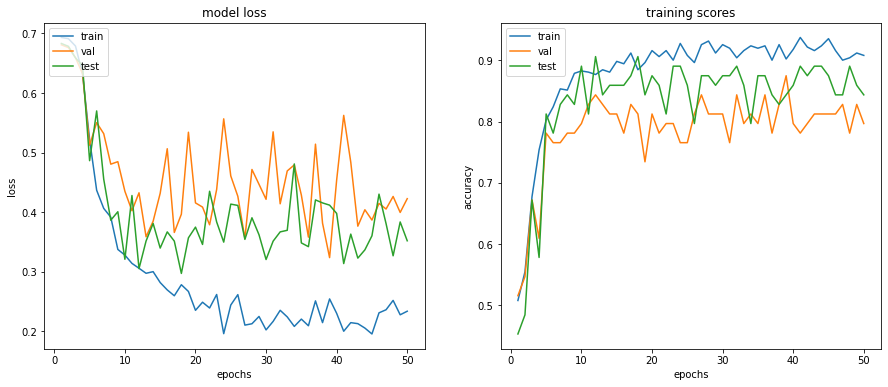

In [982]:
%matplotlib inline
path = "E:/cs8321/lab 1/multimodal/"
A = np.load(path+'CRNN_epoch_training_losses.npy')
B = np.load(path+'CRNN_epoch_training_scores.npy')
C = np.load(path+'CRNN_epoch_test_loss.npy')
D = np.load(path+'CRNN_epoch_test_score.npy')
E1 = np.load(path+'CRNN_epoch_test2_loss.npy')
F1 = np.load(path+'CRNN_epoch_test2_score.npy')
# plot
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(np.arange(1, epochs + 1), np.mean(A,1))  # train loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), C)         #  test loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), E1)         #  test loss (on epoch end)
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val','test'], loc="upper left")

# 2nd figure
plt.subplot(122)
plt.plot(np.arange(1, epochs + 1), np.mean(B,1))  # train accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), D)         #  test accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), F1)         #  test loss (on epoch end)
plt.title("training scores")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val','test'], loc="upper left")
title = "./fig_UCF101_ResNetCRNN.png"
plt.savefig(title, dpi=600)
#plt.close(fig)
plt.show()


## Kaggle submission format <a name = "Kaggle"></a>

Kaggle competion requires We apply our best fitted model(Epoch 33 of the multimodal model) to these videos and record the predictions.

The deliverable is the submission.csv file which has two columns: one of mp4 filenames as index, the other is the predicted probabilities.

[Back to TOC](#TOC)

In [ ]:
videopath = "/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/data_folder/test_videos/"
audiopath = "/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/data_folder/test_audio/"
MFCCpath = "/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/data_folder/test_MFCC/"
modelpath = "/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/data_folder/model/"


In [ ]:
from moviepy.editor import VideoFileClip
import tqdm
from tqdm import tqdm

def convert_video_to_audio(video_file, output_ext = ".wav"):
    filename, ext = os.path.splitext(video_file)
    filename = filename.split("/")[-1]
    clip = VideoFileClip(video_file)
    clip.audio.write_audiofile(audiopath + filename + output_ext)

def convert_all(df):
    for index in tqdm(df.index, total=df.shape[0]):
        convert_video_to_audio(videopath + index)

In [ ]:
videos = os.listdir(videopath)
df=pd.DataFrame()
df.index=videos


In [ ]:
df['label']=0

In [ ]:
# for v in videos:
#   convert_all(df)

In [ ]:
batch_size=40

In [ ]:
#transform audio files into MFCC features
def trans_to_MFCC(df):
    audio_feature = []
    for index,dfrow in tqdm(df.iterrows(), total=df.shape[0]):
        wave, sr = librosa.load(audiopath + os.path.splitext(index)[0] + ".wav", mono=True)
        mfcc = librosa.feature.mfcc(y = wave, sr=sr)
        mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
        audio_feature.append(mfcc.T)
        
    return np.array(audio_feature)

In [ ]:
import librosa
import IPython.display
import librosa.display

In [ ]:
%%time
X = trans_to_MFCC(df)
with open(MFCCpath+"test_X.pickle", 'wb') as handle:
    pickle.dump(X, handle) 
print("saved to file")

100%|██████████| 400/400 [02:52<00:00,  2.32it/s]

saved to file
CPU times: user 3min 8s, sys: 2min 2s, total: 5min 10s
Wall time: 2min 52s


In [ ]:
def get_X_y(data_folder,foldername):
    max_instance = 2000
    X = []
    y = []
    y_fake = 0
    y_true = 0
    folders = os.listdir(data_folder)
    
    video_folder = os.path.join(data_path, foldername)
    videos = os.listdir(video_folder)
    
    label_data = df
    tmp = LabelEncoder()
    label_data['label_01'] = tmp.fit_transform(label_data['label'])

    for index, row in label_data.iterrows():
        v = row.name
        X.append(os.path.join(video_folder, v))      
        y.append(row['label_01'])
    return X, y

In [ ]:
# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

# Data loading parameters
params = {'batch_size': batch_size, 'shuffle': True,  'pin_memory': True} if use_cuda else \
    {'batch_size': batch_size, 'shuffle': True, 'num_workers': 6}

test_list,test_label = get_X_y(data_path,'test_videos/')



In [ ]:
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# selected_frames = np.arange(begin_frame, end_frame, skip_frame).tolist()
num_frames = 20

test_set = VideoDataset(test_list, test_label, num_frames, transform=transform)

test_loader = data.DataLoader(test_set, **params)

In [ ]:
input_size = X.shape[2]
hidden_dim = 64
num_layers=2
hidden_l1=64 

In [ ]:
# Create model
cnn_encoder = InceptV3Encoder(fc_hidden1=CNN_fc_hidden1, fc_hidden2=CNN_fc_hidden2, drop_p=dropout_p, CNN_embed_dim=CNN_embed_dim).to(device)
#cnn_encoder = MesoInception4_v().to(device)
rnn_decoder = DecoderRNN(CNN_embed_dim=CNN_embed_dim, h_RNN_layers=RNN_hidden_layers, h_RNN=RNN_hidden_nodes,
                         h_FC_dim=RNN_FC_dim, drop_p=dropout_p, num_classes=k).to(device)

audio_model = rnn(input_size, hidden_dim, k, num_layers, hidden_l1).to(device) 

multi_model =  MultiModal(k, RNN_FC_dim, hidden_l1, drop_p = dropout_p).to(device) 
my_models = [cnn_encoder,rnn_decoder,audio_model,multi_model]

In [ ]:
params = list(cnn_encoder.parameters()) + list(rnn_decoder.parameters()) +\
            list(audio_model.parameters())+list(multi_model.parameters())

optimizer = torch.optim.Adam(params, lr=learning_rate)

In [ ]:
# with open(MFCCpath+"train_X.pickle", 'rb') as handle:
#   X = pickle.load(handle)
#   print("loaded from file")

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
Y = np.array(df["label"])
#X = torch.from_numpy(X)
Y = torch.from_numpy(Y).reshape(-1,1)

In [ ]:
test_data = TensorDataset(X,Y)

In [ ]:
audio_test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True,drop_last=True)

In [ ]:
def test(model, device, optimizer, test_loader,audio_test_loader):
    # set model as testing mode
    cnn_encoder, rnn_decoder, audio_model, multi_model = model
    cnn_encoder.eval()
    rnn_decoder.eval()
    audio_model.eval()
    multi_model.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        counter=0
        for ((X, y),(data, target)) in zip(test_loader,audio_test_loader):
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )
            data = data.to(device=device)
            target = target.to(device=device)

            output = multi_model(rnn_decoder(cnn_encoder(X)),audio_model(data)) 

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)
            print(f"finished{counter}")
            counter+=1
    test_loss /= len(test_loader.dataset)

    # compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())
    # show information
    
    return all_y_pred

In [ ]:
save_model_path

'/content/gdrive/MyDrive/kaggle/deepfake-detection-challenge/multimodal/'

In [ ]:
encoder_model_path = os.path.join(save_model_path, 'cnn_encoder_epoch23.pth')
decoder_model_path = os.path.join(save_model_path, 'rnn_decoder_epoch23.pth')
audio_model_path = os.path.join(save_model_path, 'audio_model_epoch23.pth')
multi_model_path = os.path.join(save_model_path, 'multi_model_epoch23.pth')
cnn_encoder.load_state_dict(torch.load(encoder_model_path))
rnn_decoder.load_state_dict(torch.load(decoder_model_path))
audio_model.load_state_dict(torch.load(audio_model_path))
multi_model.load_state_dict(torch.load(multi_model_path))
my_models = [cnn_encoder,rnn_decoder,audio_model,multi_model]

In [ ]:
y_pred = test(my_models, device, optimizer, test_loader, audio_test_loader)
#all label are set to 0 ,the loss and accuracy are not informative

finished0
finished1
finished2
finished3
finished4
finished5
finished6
finished7
finished8
finished9


In [ ]:
y_pred.to('cpu').numpy().reshape(-1)

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
submission=pd.DataFrame()
submission['filename'] = list(df.index)
submission['#label'] = y_pred.to('cpu').numpy().reshape(-1)

In [ ]:
submission.head(10)

,filename,#label
0,aassnaulhq.mp4,0
1,aayfryxljh.mp4,1
2,acazlolrpz.mp4,0
3,adohdulfwb.mp4,1
4,ahjnxtiamx.mp4,0
5,ajiyrjfyzp.mp4,0
6,aktnlyqpah.mp4,1
7,alrtntfxtd.mp4,1
8,aomqqjipcp.mp4,0
9,apedduehoy.mp4,0


In [ ]:
submission.to_csv("sample_submission.csv")

## Summary <a name="Summary"></a>
Best result using images of videos only:  <u>69.23%</u>

Best result using audios of videos only:  <u>73.85%</u>

Best result using both images and audios of videos (multimodal): <u>**84.38%**</u>

Best result using both images and scarabled audios of videos (multimodal control arm): <u>76.56%</u>




[Back to TOC](#TOC)

### Compare the performance of different models using  McNemar's testing


We will utilize McNemar's testing to compare the performance of three models. If we compare model (a) and model (b), then

McNemar's test statistic:  $$M=\frac{(|B-C|-1)^2}{B+C} \thicksim \chi^2_{1},$$

where $B$ is the number of cases when model (a) is correct and model (b) is wrong, and $C$ is the number of cases when model(a) is wrong while model (b) is right. The larger value of McNemar's test statistic means that we have more evidence to claim the difference between two models.

In [844]:
import itertools
from scipy.stats import chi2    
def mn_test(yhat1, yhat2, ytrue):
    a = sum((yhat1 == ytrue) & (yhat2 == ytrue))
    b = sum((yhat1 == ytrue) & (yhat2 != ytrue))
    c = sum((yhat1 != ytrue) & (yhat2 == ytrue))
    d = sum((yhat1 != ytrue) & (yhat2 != ytrue))
    if (b + c) == 0:
        M = 0
    else:
        M = (abs(b-c)-1)**2/(b+c + 0.01) # follows a Chi-squared test with df 1 under H0
    pvalue = 1 - chi2.cdf(M, 1)
    return M, pvalue,b,c;

In [863]:
yhat1_,yhat2_,yhat3_,yhat4_,y_test = y_pred_v[:-1], np.array(y_pred_a), y_pred_mul, y_pred_mul_c, np.array(test_label)[:-1]

In [866]:

#Comapre video and audio
r12 = mn_test(yhat1_, yhat2_, y_test)
print(' Test statistics:',r12[0],'\n',
     'p value:',r12[1],'\n',
     'B:',r12[2],'C:',r12[3])
#Comapre video and multi-modal
r13 = mn_test(yhat1_, yhat3_, y_test)
print(' Test statistics:',r13[0],'\n',
     'p value:',r13[1],'\n',
     'B:',r13[2],'C:',r13[3])
#Comapre video and MultiModal model control
r14 = mn_test(yhat1_, yhat4_, y_test)
print(' Test statistics:',r14[0],'\n',
     'p value:',r14[1],'\n',
     'B:',r14[2],'C:',r14[3])
#Comapre audio and multi-modal
r23 = mn_test(yhat2_, yhat3_, y_test)
print(' Test statistics:',r23[0],'\n',
     'p value:',r23[1],'\n',
     'B:',r23[2],'C:',r23[3])
#Comapre audio and MultiModal model control
r24 = mn_test(yhat2_, yhat4_, y_test)
print(' Test statistics:',r24[0],'\n',
     'p value:',r24[1],'\n',
     'B:',r24[2],'C:',r24[3])
#Comapre multi-modal and MultiModal model control
r34 = mn_test(yhat3_, yhat4_, y_test)
print(' Test statistics:',r34[0],'\n',
     'p value:',r34[1],'\n',
     'B:',r34[2],'C:',r34[3])

 Test statistics: 0.04164931278633902 
 p value: 0.8382897073011835 
 B: 13 C: 11
 Test statistics: 3.7624926513815398 
 p value: 0.052414386689798476 
 B: 4 C: 13
 Test statistics: 1.497504159733777 
 p value: 0.22105578741098442 
 B: 1 C: 5
 Test statistics: 4.34593654932638 
 p value: 0.03709735848582496 
 B: 6 C: 17
 Test statistics: 1.1358473421172193 
 p value: 0.2865315181731376 
 B: 8 C: 14
 Test statistics: 1.2298232129131437 
 p value: 0.2674414217026412 
 B: 9 C: 4


### Results

- model video only vs model audio only :The $p.value$ of the McNemar's test is $>0.05$. Thus, there is not enough evidence showing that these two models performed differently in terms. 

- model video only vs model multimodal :The $p.value$ of the McNemar's test is $0.052$. Thus, there is strong evidence that these two models performed differently in terms. Compared the confusion matrix results of two models, we choose model multimodal. 

- model video only vs model multimodal control :The $p.value$ of the McNemar's test is $>0.05$. Thus, there is not enough evidence showing that these two models performed differently in terms. 

- model audio only  vs model multimodal :The $p.value$ of the McNemar's test is $0.037$. Thus, there is strong evidence that these two models performed differently in terms. Compared the confusion matrix results of two models, we choose model multimodal. 

- model audio only vs model multimodal control :The $p.value$ of the McNemar's test is $>0.05$. Thus, there is not enough evidence showing that these two models performed differently in terms. 

- model multimodal vs model multimodal control:The $p.value$ of the McNemar's test is $>0.05$. Thus, there is not enough evidence showing that these two models performed differently in terms. 

Therefore, we choose **model multimodal** as our final model.

In [867]:
yhat3_

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [868]:
yhat4_

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)